# URDaVa: Unlearning-Robust Data Valuation for Machine Learning

This notebook is the main record for experiments in this research. All the datasets used for experiments are cited in the paper. All the cells in this notebook is runnable, given that the required dependencies are installed.

## Data Source Ranking

Theoretically, URDV is able to differentiate data sources based on their contributions to model performance and model robustness. In this set of experiments, we investigate URDV's ability to rank data sources based on **data quality** and **staying probability** respectively while keeping the other constant.

### Varying Data Quality

In [59]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from urdava.coalition_probability import IndependentCoalitionProbability
from urdava.data_source import generate_random_data_sources, add_classification_noise
from urdava.data_valuation import ValuableModel
from urdava.dataset import load_dataset
from urdava.model_utility import IClassificationModel, model_logistic_regression

X, y = load_dataset('phoneme')

NUM_OF_DATA_SOURCES = 10
support_set = tuple(range(NUM_OF_DATA_SOURCES))
staying_probabilities = {i:0.8 for i in range(NUM_OF_DATA_SOURCES)}
coalition_probability = IndependentCoalitionProbability(staying_probabilities)

average_values = {}
average_noisy_values = {}
average_reverse_noisy_values = {}

model = model_logistic_regression

N = 100
for n_iter in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    y_train_copy = y_train.copy()
    y_train_copy = add_classification_noise(y_train_copy, noise_level = 0.225)
    data_sources = generate_random_data_sources(X_train, y_train_copy, 
                                                num_of_data_sources=NUM_OF_DATA_SOURCES)
    noisy_data_sources = generate_random_data_sources(X_train, y_train, 
                                                      num_of_data_sources=NUM_OF_DATA_SOURCES)
    reverse_noisy_data_sources = generate_random_data_sources(X_train, y_train, 
                                                              num_of_data_sources=NUM_OF_DATA_SOURCES)
    for i in range(NUM_OF_DATA_SOURCES):
        noisy_data_sources[i] = (noisy_data_sources[i][0], 
                                 add_classification_noise(noisy_data_sources[i][1], noise_level = 0.05*i))
        reverse_noisy_data_sources[i] = (reverse_noisy_data_sources[i][0],
                                         add_classification_noise(reverse_noisy_data_sources[i][1], 
                                                                  noise_level = 0.45-0.05*i))

    print(f"=====> Iteration #{n_iter}")

    # no noise
    model_utility_function = IClassificationModel(model, data_sources, X_test, y_test)
    valuable_model = ValuableModel(support_set, model_utility_function)
    values = valuable_model.valuate(data_valuation_function="robust banzhaf", 
                                    coalition_probability=coalition_probability)
    
    for i in values:
        if average_values.get(i, 0) == 0:
            average_values[i] = []
        average_values[i].append(values[i])


    # increasing noise
    model_utility_function = IClassificationModel(model, noisy_data_sources, X_test, y_test)
    noisy_valuable_model = ValuableModel(support_set, model_utility_function)
    noisy_values = noisy_valuable_model.valuate(data_valuation_function="robust banzhaf", 
                                    coalition_probability=coalition_probability)
    
    for i in noisy_values:
        if average_noisy_values.get(i, 0) == 0:
            average_noisy_values[i] = []
        average_noisy_values[i].append(noisy_values[i])
        
    # decreasing noise
    model_utility_function = IClassificationModel(model, reverse_noisy_data_sources, X_test, y_test)
    reverse_noisy_valuable_model = ValuableModel(support_set, model_utility_function)
    reverse_noisy_values = reverse_noisy_valuable_model.valuate(data_valuation_function="robust banzhaf", 
                                    coalition_probability=coalition_probability)
    
    for i in reverse_noisy_values:
        if average_reverse_noisy_values.get(i, 0) == 0:
            average_reverse_noisy_values[i] = []
        average_reverse_noisy_values[i].append(reverse_noisy_values[i])

# get average
for i in average_values:
    average_values[i] = sum(list(sorted(average_values[i]))[25:75]) / 50
    average_noisy_values[i] = sum(list(sorted(average_noisy_values[i]))[25:75]) / 50
    average_reverse_noisy_values[i] = sum(list(sorted(average_reverse_noisy_values[i]))[25:75]) / 50
    
print(average_values)
print(average_noisy_values)
print(average_reverse_noisy_values)

=====> Iteration #0
=====> Iteration #1
=====> Iteration #2
=====> Iteration #3
=====> Iteration #4
=====> Iteration #5
=====> Iteration #6
=====> Iteration #7
=====> Iteration #8
=====> Iteration #9
=====> Iteration #10
=====> Iteration #11
=====> Iteration #12
=====> Iteration #13
=====> Iteration #14
=====> Iteration #15
=====> Iteration #16
=====> Iteration #17
=====> Iteration #18
=====> Iteration #19
=====> Iteration #20
=====> Iteration #21
=====> Iteration #22
=====> Iteration #23
=====> Iteration #24
=====> Iteration #25
=====> Iteration #26
=====> Iteration #27
=====> Iteration #28
=====> Iteration #29
=====> Iteration #30
=====> Iteration #31
=====> Iteration #32
=====> Iteration #33
=====> Iteration #34
=====> Iteration #35
=====> Iteration #36
=====> Iteration #37
=====> Iteration #38
=====> Iteration #39
=====> Iteration #40
=====> Iteration #41
=====> Iteration #42
=====> Iteration #43
=====> Iteration #44
=====> Iteration #45
=====> Iteration #46
=====> Iteration #47
==

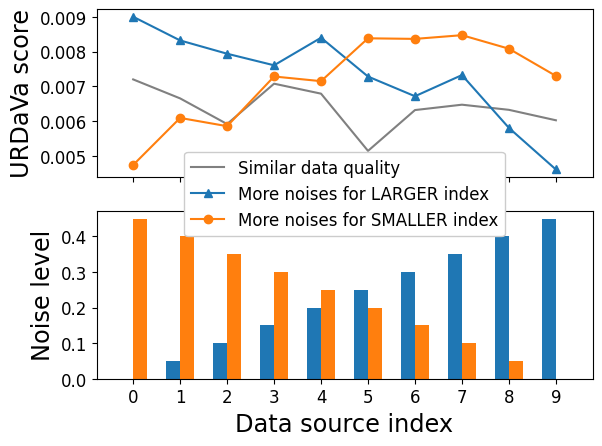

In [23]:
import numpy as np
import os

average_values = {0: 0.00719929077330702, 1: 0.006654337877543765, 2: 0.005918315627324281, 3: 0.007076863409085072, 4: 0.006790208672355109, 5: 0.005147943220083837, 6: 0.006319666732823668, 7: 0.0064736960602909885, 8: 0.006326334546071507, 9: 0.006026236550471016}
average_noisy_values = {0: 0.008997390823378535, 1: 0.008317506606717625, 2: 0.007936582515847095, 3: 0.0076042676165918545, 4: 0.008395561361519099, 5: 0.007281367860715156, 6: 0.006716357246895182, 7: 0.007323772445672001, 8: 0.005807498796823668, 9: 0.0046141767477977744}
average_reverse_noisy_values = {0: 0.004743681555570892, 1: 0.006093793706771878, 2: 0.005857136129893949, 3: 0.0072829492652034455, 4: 0.007148999393381004, 5: 0.00837902847116152, 6: 0.008362192471753382, 7: 0.008468698037504304, 8: 0.008080376828212074, 9: 0.007299457251274962}

fig, ax = plt.subplots(2, sharex=True)
line, = ax[0].plot(average_values.values(), color="grey")
line.set_label("Similar data quality")
noisy_line, = ax[0].plot(average_noisy_values.values(), marker="^", color="C0")
noisy_line.set_label("More noises for LARGER index")
reverse_noisy_line, = ax[0].plot(average_reverse_noisy_values.values(), marker="o", color="C1")
reverse_noisy_line.set_label("More noises for SMALLER index")
ax[0].legend(loc="lower center", fontsize="large", bbox_to_anchor=(0.5,-0.4), facecolor='white', framealpha=1)
ax[0].set_ylabel("URDaVa score", fontsize='xx-large')
ax[1].set_xlabel("Data source index", fontsize='xx-large')
ax[1].set_xticks(ticks=list(range(NUM_OF_DATA_SOURCES)))
ax[1].set_ylabel("Noise level", fontsize='xx-large')
width = 0.3
multiplier = 0
x = np.arange(NUM_OF_DATA_SOURCES)
noises = [0.05*i for i in range(NUM_OF_DATA_SOURCES)]
reverse_noises = [(0.45 - 0.05*i) for i in range(NUM_OF_DATA_SOURCES)]
all_noises = [noises, reverse_noises]
for i in range(len(all_noises)):
    offset = width * multiplier
    ax[1].bar(x + offset - width/2, all_noises[i], width, color=f"C{i}")
    multiplier += 1
    
ax[0].tick_params(axis='both', labelsize='large')
ax[1].tick_params(axis='both', labelsize='large')
ax[0].set_zorder(ax[1].get_zorder()+1)
    
plt.show()
PATH_TO_IMAGES = "./images/data_source_ranking/"
if not os.path.isdir(PATH_TO_IMAGES):
    os.makedirs(PATH_TO_IMAGES)
fig.savefig(os.path.join(PATH_TO_IMAGES, "data_quality_10_banzhaf_phoneme.png"), dpi=300, bbox_inches='tight')

In [62]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from urdava.coalition_probability import IndependentCoalitionProbability
from urdava.data_source import generate_random_data_sources, add_classification_noise
from urdava.data_valuation import ValuableModel
from urdava.dataset import load_dataset
from urdava.model_utility import IClassificationModel, model_linear_svm

# Add logs
import logging
import sys
logger = logging.getLogger()
formatter = logging.Formatter('%(asctime)s - %(lineno)s - %(levelname)s - %(message)s')
logger.setLevel(logging.DEBUG)

fhandler = logging.FileHandler(filename='main.log', mode='w')
fhandler.setFormatter(formatter)
fhandler.setLevel(logging.INFO)
logger.addHandler(fhandler)

consoleHandler = logging.StreamHandler(sys.stdout)
consoleHandler.setFormatter(formatter)
consoleHandler.setLevel(logging.DEBUG)
logger.addHandler(consoleHandler)

logger.info("Program has started.")


X, y = load_dataset('diabetes')

NUM_OF_DATA_SOURCES = 10
support_set = tuple(range(NUM_OF_DATA_SOURCES))
staying_probabilities = {i:0.8 for i in range(NUM_OF_DATA_SOURCES)}
coalition_probability = IndependentCoalitionProbability(staying_probabilities)

average_values = {}
average_noisy_values = {}
average_reverse_noisy_values = {}

model = model_linear_svm

N = 100
for n_iter in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    y_train_copy = y_train.copy()
    y_train_copy = add_classification_noise(y_train_copy, noise_level = 0.225)
    data_sources = generate_random_data_sources(X_train, y_train_copy, 
                                                num_of_data_sources=NUM_OF_DATA_SOURCES)
    noisy_data_sources = generate_random_data_sources(X_train, y_train, 
                                                      num_of_data_sources=NUM_OF_DATA_SOURCES)
    reverse_noisy_data_sources = generate_random_data_sources(X_train, y_train, 
                                                              num_of_data_sources=NUM_OF_DATA_SOURCES)
    for i in range(NUM_OF_DATA_SOURCES):
        noisy_data_sources[i] = (noisy_data_sources[i][0], 
                                 add_classification_noise(noisy_data_sources[i][1], noise_level = 0.05*i))
        reverse_noisy_data_sources[i] = (reverse_noisy_data_sources[i][0],
                                         add_classification_noise(reverse_noisy_data_sources[i][1], 
                                                                  noise_level = 0.45-0.05*i))

    print(f"=====> Iteration #{n_iter}")

    # no noise
    model_utility_function = IClassificationModel(model, data_sources, X_test, y_test)
    valuable_model = ValuableModel(support_set, model_utility_function)
    values = valuable_model.valuate(data_valuation_function="robust beta", 
                                    coalition_probability=coalition_probability, alpha=16, beta=4)
    
    for i in values:
        if average_values.get(i, 0) == 0:
            average_values[i] = []
        average_values[i].append(values[i])


    # increasing noise
    model_utility_function = IClassificationModel(model, noisy_data_sources, X_test, y_test)
    noisy_valuable_model = ValuableModel(support_set, model_utility_function)
    noisy_values = noisy_valuable_model.valuate(data_valuation_function="robust beta", 
                                    coalition_probability=coalition_probability, alpha=16, beta=4)
    
    for i in noisy_values:
        if average_noisy_values.get(i, 0) == 0:
            average_noisy_values[i] = []
        average_noisy_values[i].append(noisy_values[i])
        
    # decreasing noise
    model_utility_function = IClassificationModel(model, reverse_noisy_data_sources, X_test, y_test)
    reverse_noisy_valuable_model = ValuableModel(support_set, model_utility_function)
    reverse_noisy_values = reverse_noisy_valuable_model.valuate(data_valuation_function="robust beta", 
                                    coalition_probability=coalition_probability, alpha=16, beta=4)
    
    for i in reverse_noisy_values:
        if average_reverse_noisy_values.get(i, 0) == 0:
            average_reverse_noisy_values[i] = []
        average_reverse_noisy_values[i].append(reverse_noisy_values[i])
        
    logger.info(f"Iteration {n_iter} has completed.")

# get average
for i in average_values:
    average_values[i] = sum(list(sorted(average_values[i]))[25:75]) / 50
    average_noisy_values[i] = sum(list(sorted(average_noisy_values[i]))[25:75]) / 50
    average_reverse_noisy_values[i] = sum(list(sorted(average_reverse_noisy_values[i]))[25:75]) / 50
    
logger.info(f"=====> Average values: {str(average_values)}")
logger.info(f"=====> Average noisy values: {str(average_noisy_values)}")
logger.info(f"=====> Average reverse noisy values: {str(average_reverse_noisy_values)}")

2023-05-04 23:47:50,892 - 26 - INFO - Program has started.
2023-05-04 23:47:50,892 - 26 - INFO - Program has started.
2023-05-04 23:47:50,892 - 26 - INFO - Program has started.
2023-05-04 23:47:50,892 - 26 - INFO - Program has started.
2023-05-04 23:47:50,892 - 26 - INFO - Program has started.
2023-05-04 23:47:50,892 - 26 - INFO - Program has started.
2023-05-04 23:47:50,892 - 26 - INFO - Program has started.
2023-05-04 23:47:50,892 - 26 - INFO - Program has started.
2023-05-04 23:47:50,892 - 26 - INFO - Program has started.
2023-05-04 23:47:50,892 - 26 - INFO - Program has started.
2023-05-04 23:47:50,892 - 26 - INFO - Program has started.
2023-05-04 23:47:50,892 - 26 - INFO - Program has started.
2023-05-04 23:47:50,892 - 26 - INFO - Program has started.
2023-05-04 23:47:50,892 - 26 - INFO - Program has started.
2023-05-04 23:47:50,892 - 26 - INFO - Program has started.
2023-05-04 23:47:50,892 - 26 - INFO - Program has started.
=====> Iteration #0
2023-05-04 23:48:41,786 - 96 - INFO 

2023-05-04 23:53:40,756 - 96 - INFO - Iteration 6 has completed.
2023-05-04 23:53:40,756 - 96 - INFO - Iteration 6 has completed.
=====> Iteration #7
2023-05-04 23:54:20,458 - 96 - INFO - Iteration 7 has completed.
2023-05-04 23:54:20,458 - 96 - INFO - Iteration 7 has completed.
2023-05-04 23:54:20,458 - 96 - INFO - Iteration 7 has completed.
2023-05-04 23:54:20,458 - 96 - INFO - Iteration 7 has completed.
2023-05-04 23:54:20,458 - 96 - INFO - Iteration 7 has completed.
2023-05-04 23:54:20,458 - 96 - INFO - Iteration 7 has completed.
2023-05-04 23:54:20,458 - 96 - INFO - Iteration 7 has completed.
2023-05-04 23:54:20,458 - 96 - INFO - Iteration 7 has completed.
2023-05-04 23:54:20,458 - 96 - INFO - Iteration 7 has completed.
2023-05-04 23:54:20,458 - 96 - INFO - Iteration 7 has completed.
2023-05-04 23:54:20,458 - 96 - INFO - Iteration 7 has completed.
2023-05-04 23:54:20,458 - 96 - INFO - Iteration 7 has completed.
2023-05-04 23:54:20,458 - 96 - INFO - Iteration 7 has completed.
2023-

2023-05-04 23:59:47,721 - 96 - INFO - Iteration 14 has completed.
2023-05-04 23:59:47,721 - 96 - INFO - Iteration 14 has completed.
2023-05-04 23:59:47,721 - 96 - INFO - Iteration 14 has completed.
2023-05-04 23:59:47,721 - 96 - INFO - Iteration 14 has completed.
2023-05-04 23:59:47,721 - 96 - INFO - Iteration 14 has completed.
2023-05-04 23:59:47,721 - 96 - INFO - Iteration 14 has completed.
2023-05-04 23:59:47,721 - 96 - INFO - Iteration 14 has completed.
=====> Iteration #15
2023-05-05 00:00:36,872 - 96 - INFO - Iteration 15 has completed.
2023-05-05 00:00:36,872 - 96 - INFO - Iteration 15 has completed.
2023-05-05 00:00:36,872 - 96 - INFO - Iteration 15 has completed.
2023-05-05 00:00:36,872 - 96 - INFO - Iteration 15 has completed.
2023-05-05 00:00:36,872 - 96 - INFO - Iteration 15 has completed.
2023-05-05 00:00:36,872 - 96 - INFO - Iteration 15 has completed.
2023-05-05 00:00:36,872 - 96 - INFO - Iteration 15 has completed.
2023-05-05 00:00:36,872 - 96 - INFO - Iteration 15 has 

2023-05-05 00:06:18,256 - 96 - INFO - Iteration 22 has completed.
2023-05-05 00:06:18,256 - 96 - INFO - Iteration 22 has completed.
2023-05-05 00:06:18,256 - 96 - INFO - Iteration 22 has completed.
2023-05-05 00:06:18,256 - 96 - INFO - Iteration 22 has completed.
2023-05-05 00:06:18,256 - 96 - INFO - Iteration 22 has completed.
2023-05-05 00:06:18,256 - 96 - INFO - Iteration 22 has completed.
2023-05-05 00:06:18,256 - 96 - INFO - Iteration 22 has completed.
2023-05-05 00:06:18,256 - 96 - INFO - Iteration 22 has completed.
2023-05-05 00:06:18,256 - 96 - INFO - Iteration 22 has completed.
2023-05-05 00:06:18,256 - 96 - INFO - Iteration 22 has completed.
2023-05-05 00:06:18,256 - 96 - INFO - Iteration 22 has completed.
2023-05-05 00:06:18,256 - 96 - INFO - Iteration 22 has completed.
2023-05-05 00:06:18,256 - 96 - INFO - Iteration 22 has completed.
=====> Iteration #23
2023-05-05 00:06:58,031 - 96 - INFO - Iteration 23 has completed.
2023-05-05 00:06:58,031 - 96 - INFO - Iteration 23 has 

2023-05-05 00:11:47,345 - 96 - INFO - Iteration 29 has completed.
2023-05-05 00:11:47,345 - 96 - INFO - Iteration 29 has completed.
2023-05-05 00:11:47,345 - 96 - INFO - Iteration 29 has completed.
=====> Iteration #30
2023-05-05 00:12:36,628 - 96 - INFO - Iteration 30 has completed.
2023-05-05 00:12:36,628 - 96 - INFO - Iteration 30 has completed.
2023-05-05 00:12:36,628 - 96 - INFO - Iteration 30 has completed.
2023-05-05 00:12:36,628 - 96 - INFO - Iteration 30 has completed.
2023-05-05 00:12:36,628 - 96 - INFO - Iteration 30 has completed.
2023-05-05 00:12:36,628 - 96 - INFO - Iteration 30 has completed.
2023-05-05 00:12:36,628 - 96 - INFO - Iteration 30 has completed.
2023-05-05 00:12:36,628 - 96 - INFO - Iteration 30 has completed.
2023-05-05 00:12:36,628 - 96 - INFO - Iteration 30 has completed.
2023-05-05 00:12:36,628 - 96 - INFO - Iteration 30 has completed.
2023-05-05 00:12:36,628 - 96 - INFO - Iteration 30 has completed.
2023-05-05 00:12:36,628 - 96 - INFO - Iteration 30 has 

2023-05-05 00:18:12,536 - 96 - INFO - Iteration 37 has completed.
2023-05-05 00:18:12,536 - 96 - INFO - Iteration 37 has completed.
2023-05-05 00:18:12,536 - 96 - INFO - Iteration 37 has completed.
2023-05-05 00:18:12,536 - 96 - INFO - Iteration 37 has completed.
2023-05-05 00:18:12,536 - 96 - INFO - Iteration 37 has completed.
2023-05-05 00:18:12,536 - 96 - INFO - Iteration 37 has completed.
2023-05-05 00:18:12,536 - 96 - INFO - Iteration 37 has completed.
2023-05-05 00:18:12,536 - 96 - INFO - Iteration 37 has completed.
2023-05-05 00:18:12,536 - 96 - INFO - Iteration 37 has completed.
=====> Iteration #38
2023-05-05 00:19:00,346 - 96 - INFO - Iteration 38 has completed.
2023-05-05 00:19:00,346 - 96 - INFO - Iteration 38 has completed.
2023-05-05 00:19:00,346 - 96 - INFO - Iteration 38 has completed.
2023-05-05 00:19:00,346 - 96 - INFO - Iteration 38 has completed.
2023-05-05 00:19:00,346 - 96 - INFO - Iteration 38 has completed.
2023-05-05 00:19:00,346 - 96 - INFO - Iteration 38 has 

2023-05-05 00:24:24,499 - 96 - INFO - Iteration 45 has completed.
2023-05-05 00:24:24,499 - 96 - INFO - Iteration 45 has completed.
2023-05-05 00:24:24,499 - 96 - INFO - Iteration 45 has completed.
2023-05-05 00:24:24,499 - 96 - INFO - Iteration 45 has completed.
2023-05-05 00:24:24,499 - 96 - INFO - Iteration 45 has completed.
2023-05-05 00:24:24,499 - 96 - INFO - Iteration 45 has completed.
2023-05-05 00:24:24,499 - 96 - INFO - Iteration 45 has completed.
2023-05-05 00:24:24,499 - 96 - INFO - Iteration 45 has completed.
2023-05-05 00:24:24,499 - 96 - INFO - Iteration 45 has completed.
2023-05-05 00:24:24,499 - 96 - INFO - Iteration 45 has completed.
2023-05-05 00:24:24,499 - 96 - INFO - Iteration 45 has completed.
2023-05-05 00:24:24,499 - 96 - INFO - Iteration 45 has completed.
2023-05-05 00:24:24,499 - 96 - INFO - Iteration 45 has completed.
2023-05-05 00:24:24,499 - 96 - INFO - Iteration 45 has completed.
2023-05-05 00:24:24,499 - 96 - INFO - Iteration 45 has completed.
=====> Ite

2023-05-05 00:30:01,895 - 96 - INFO - Iteration 52 has completed.
2023-05-05 00:30:01,895 - 96 - INFO - Iteration 52 has completed.
2023-05-05 00:30:01,895 - 96 - INFO - Iteration 52 has completed.
2023-05-05 00:30:01,895 - 96 - INFO - Iteration 52 has completed.
2023-05-05 00:30:01,895 - 96 - INFO - Iteration 52 has completed.
=====> Iteration #53
2023-05-05 00:30:54,320 - 96 - INFO - Iteration 53 has completed.
2023-05-05 00:30:54,320 - 96 - INFO - Iteration 53 has completed.
2023-05-05 00:30:54,320 - 96 - INFO - Iteration 53 has completed.
2023-05-05 00:30:54,320 - 96 - INFO - Iteration 53 has completed.
2023-05-05 00:30:54,320 - 96 - INFO - Iteration 53 has completed.
2023-05-05 00:30:54,320 - 96 - INFO - Iteration 53 has completed.
2023-05-05 00:30:54,320 - 96 - INFO - Iteration 53 has completed.
2023-05-05 00:30:54,320 - 96 - INFO - Iteration 53 has completed.
2023-05-05 00:30:54,320 - 96 - INFO - Iteration 53 has completed.
2023-05-05 00:30:54,320 - 96 - INFO - Iteration 53 has 

2023-05-05 00:36:39,185 - 96 - INFO - Iteration 60 has completed.
2023-05-05 00:36:39,185 - 96 - INFO - Iteration 60 has completed.
2023-05-05 00:36:39,185 - 96 - INFO - Iteration 60 has completed.
2023-05-05 00:36:39,185 - 96 - INFO - Iteration 60 has completed.
2023-05-05 00:36:39,185 - 96 - INFO - Iteration 60 has completed.
2023-05-05 00:36:39,185 - 96 - INFO - Iteration 60 has completed.
2023-05-05 00:36:39,185 - 96 - INFO - Iteration 60 has completed.
2023-05-05 00:36:39,185 - 96 - INFO - Iteration 60 has completed.
2023-05-05 00:36:39,185 - 96 - INFO - Iteration 60 has completed.
2023-05-05 00:36:39,185 - 96 - INFO - Iteration 60 has completed.
2023-05-05 00:36:39,185 - 96 - INFO - Iteration 60 has completed.
=====> Iteration #61
2023-05-05 00:37:28,487 - 96 - INFO - Iteration 61 has completed.
2023-05-05 00:37:28,487 - 96 - INFO - Iteration 61 has completed.
2023-05-05 00:37:28,487 - 96 - INFO - Iteration 61 has completed.
2023-05-05 00:37:28,487 - 96 - INFO - Iteration 61 has 

2023-05-05 00:42:15,894 - 96 - INFO - Iteration 67 has completed.
=====> Iteration #68
2023-05-05 00:43:05,260 - 96 - INFO - Iteration 68 has completed.
2023-05-05 00:43:05,260 - 96 - INFO - Iteration 68 has completed.
2023-05-05 00:43:05,260 - 96 - INFO - Iteration 68 has completed.
2023-05-05 00:43:05,260 - 96 - INFO - Iteration 68 has completed.
2023-05-05 00:43:05,260 - 96 - INFO - Iteration 68 has completed.
2023-05-05 00:43:05,260 - 96 - INFO - Iteration 68 has completed.
2023-05-05 00:43:05,260 - 96 - INFO - Iteration 68 has completed.
2023-05-05 00:43:05,260 - 96 - INFO - Iteration 68 has completed.
2023-05-05 00:43:05,260 - 96 - INFO - Iteration 68 has completed.
2023-05-05 00:43:05,260 - 96 - INFO - Iteration 68 has completed.
2023-05-05 00:43:05,260 - 96 - INFO - Iteration 68 has completed.
2023-05-05 00:43:05,260 - 96 - INFO - Iteration 68 has completed.
2023-05-05 00:43:05,260 - 96 - INFO - Iteration 68 has completed.
2023-05-05 00:43:05,260 - 96 - INFO - Iteration 68 has 

2023-05-05 00:48:33,099 - 96 - INFO - Iteration 75 has completed.
2023-05-05 00:48:33,099 - 96 - INFO - Iteration 75 has completed.
2023-05-05 00:48:33,099 - 96 - INFO - Iteration 75 has completed.
2023-05-05 00:48:33,099 - 96 - INFO - Iteration 75 has completed.
2023-05-05 00:48:33,099 - 96 - INFO - Iteration 75 has completed.
2023-05-05 00:48:33,099 - 96 - INFO - Iteration 75 has completed.
2023-05-05 00:48:33,099 - 96 - INFO - Iteration 75 has completed.
=====> Iteration #76
2023-05-05 00:49:25,426 - 96 - INFO - Iteration 76 has completed.
2023-05-05 00:49:25,426 - 96 - INFO - Iteration 76 has completed.
2023-05-05 00:49:25,426 - 96 - INFO - Iteration 76 has completed.
2023-05-05 00:49:25,426 - 96 - INFO - Iteration 76 has completed.
2023-05-05 00:49:25,426 - 96 - INFO - Iteration 76 has completed.
2023-05-05 00:49:25,426 - 96 - INFO - Iteration 76 has completed.
2023-05-05 00:49:25,426 - 96 - INFO - Iteration 76 has completed.
2023-05-05 00:49:25,426 - 96 - INFO - Iteration 76 has 

2023-05-05 00:55:05,347 - 96 - INFO - Iteration 83 has completed.
2023-05-05 00:55:05,347 - 96 - INFO - Iteration 83 has completed.
2023-05-05 00:55:05,347 - 96 - INFO - Iteration 83 has completed.
2023-05-05 00:55:05,347 - 96 - INFO - Iteration 83 has completed.
2023-05-05 00:55:05,347 - 96 - INFO - Iteration 83 has completed.
2023-05-05 00:55:05,347 - 96 - INFO - Iteration 83 has completed.
2023-05-05 00:55:05,347 - 96 - INFO - Iteration 83 has completed.
2023-05-05 00:55:05,347 - 96 - INFO - Iteration 83 has completed.
2023-05-05 00:55:05,347 - 96 - INFO - Iteration 83 has completed.
2023-05-05 00:55:05,347 - 96 - INFO - Iteration 83 has completed.
2023-05-05 00:55:05,347 - 96 - INFO - Iteration 83 has completed.
2023-05-05 00:55:05,347 - 96 - INFO - Iteration 83 has completed.
2023-05-05 00:55:05,347 - 96 - INFO - Iteration 83 has completed.
=====> Iteration #84
2023-05-05 00:55:56,881 - 96 - INFO - Iteration 84 has completed.
2023-05-05 00:55:56,881 - 96 - INFO - Iteration 84 has 

2023-05-05 01:00:33,188 - 96 - INFO - Iteration 90 has completed.
2023-05-05 01:00:33,188 - 96 - INFO - Iteration 90 has completed.
2023-05-05 01:00:33,188 - 96 - INFO - Iteration 90 has completed.
=====> Iteration #91
2023-05-05 01:01:25,326 - 96 - INFO - Iteration 91 has completed.
2023-05-05 01:01:25,326 - 96 - INFO - Iteration 91 has completed.
2023-05-05 01:01:25,326 - 96 - INFO - Iteration 91 has completed.
2023-05-05 01:01:25,326 - 96 - INFO - Iteration 91 has completed.
2023-05-05 01:01:25,326 - 96 - INFO - Iteration 91 has completed.
2023-05-05 01:01:25,326 - 96 - INFO - Iteration 91 has completed.
2023-05-05 01:01:25,326 - 96 - INFO - Iteration 91 has completed.
2023-05-05 01:01:25,326 - 96 - INFO - Iteration 91 has completed.
2023-05-05 01:01:25,326 - 96 - INFO - Iteration 91 has completed.
2023-05-05 01:01:25,326 - 96 - INFO - Iteration 91 has completed.
2023-05-05 01:01:25,326 - 96 - INFO - Iteration 91 has completed.
2023-05-05 01:01:25,326 - 96 - INFO - Iteration 91 has 

2023-05-05 01:07:18,148 - 96 - INFO - Iteration 98 has completed.
2023-05-05 01:07:18,148 - 96 - INFO - Iteration 98 has completed.
2023-05-05 01:07:18,148 - 96 - INFO - Iteration 98 has completed.
2023-05-05 01:07:18,148 - 96 - INFO - Iteration 98 has completed.
2023-05-05 01:07:18,148 - 96 - INFO - Iteration 98 has completed.
2023-05-05 01:07:18,148 - 96 - INFO - Iteration 98 has completed.
2023-05-05 01:07:18,148 - 96 - INFO - Iteration 98 has completed.
2023-05-05 01:07:18,148 - 96 - INFO - Iteration 98 has completed.
2023-05-05 01:07:18,148 - 96 - INFO - Iteration 98 has completed.
=====> Iteration #99
2023-05-05 01:08:03,086 - 96 - INFO - Iteration 99 has completed.
2023-05-05 01:08:03,086 - 96 - INFO - Iteration 99 has completed.
2023-05-05 01:08:03,086 - 96 - INFO - Iteration 99 has completed.
2023-05-05 01:08:03,086 - 96 - INFO - Iteration 99 has completed.
2023-05-05 01:08:03,086 - 96 - INFO - Iteration 99 has completed.
2023-05-05 01:08:03,086 - 96 - INFO - Iteration 99 has 

2023-05-05 01:08:03,110 - 105 - INFO - =====> Average noisy values: {0: 0.18554677912663575, 1: 0.18006997100207275, 2: 0.17538631236959387, 3: 0.1689382655647281, 4: 0.16048767448002593, 5: 0.1565291514341094, 6: 0.14409837427639116, 7: 0.13439416162185294, 8: 0.12516949712686073, 9: 0.10906972432647982}
2023-05-05 01:08:03,110 - 105 - INFO - =====> Average noisy values: {0: 0.18554677912663575, 1: 0.18006997100207275, 2: 0.17538631236959387, 3: 0.1689382655647281, 4: 0.16048767448002593, 5: 0.1565291514341094, 6: 0.14409837427639116, 7: 0.13439416162185294, 8: 0.12516949712686073, 9: 0.10906972432647982}
2023-05-05 01:08:03,110 - 105 - INFO - =====> Average noisy values: {0: 0.18554677912663575, 1: 0.18006997100207275, 2: 0.17538631236959387, 3: 0.1689382655647281, 4: 0.16048767448002593, 5: 0.1565291514341094, 6: 0.14409837427639116, 7: 0.13439416162185294, 8: 0.12516949712686073, 9: 0.10906972432647982}
2023-05-05 01:08:03,110 - 105 - INFO - =====> Average noisy values: {0: 0.18554

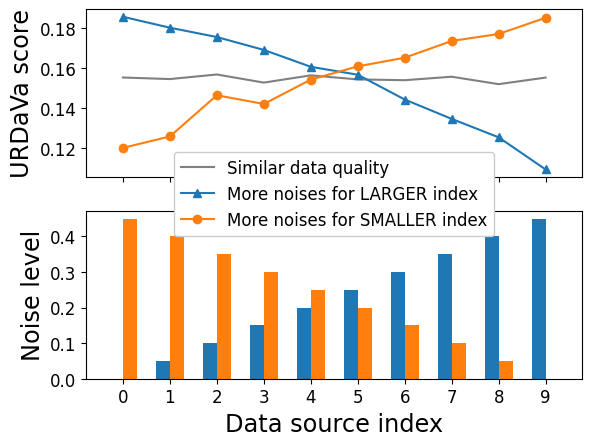

In [21]:
import numpy as np
import os

average_values = {0: 0.15512692432497327, 1: 0.1543477473350852, 2: 0.15664053667962483, 3: 0.1525765943341781, 4: 0.1562011386809955, 5: 0.15417399693725028, 6: 0.15378311942344713, 7: 0.15551906263508425, 8: 0.15180171978543996, 9: 0.1550897677820985}
average_noisy_values = {0: 0.18554677912663575, 1: 0.18006997100207275, 2: 0.17538631236959387, 3: 0.1689382655647281, 4: 0.16048767448002593, 5: 0.1565291514341094, 6: 0.14409837427639116, 7: 0.13439416162185294, 8: 0.12516949712686073, 9: 0.10906972432647982}
average_reverse_noisy_values = {0: 0.11988322622868014, 1: 0.1256083455868866, 2: 0.14624139484327428, 3: 0.1418714286473511, 4: 0.15407112915406437, 5: 0.1607097266948841, 6: 0.16504726656574079, 7: 0.17342299875810344, 8: 0.17693406269679915, 9: 0.18504846208089276}

fig, ax = plt.subplots(2, sharex=True)
line, = ax[0].plot(average_values.values(), color="grey")
line.set_label("Similar data quality")
noisy_line, = ax[0].plot(average_noisy_values.values(), marker="^", color="C0")
noisy_line.set_label("More noises for LARGER index")
reverse_noisy_line, = ax[0].plot(average_reverse_noisy_values.values(), marker="o", color="C1")
reverse_noisy_line.set_label("More noises for SMALLER index")
ax[0].legend(loc="lower center", fontsize="large", bbox_to_anchor=(0.5,-0.4), facecolor='white', framealpha=1)
ax[0].set_ylabel("URDaVa score", fontsize='xx-large')
ax[1].set_xlabel("Data source index", fontsize='xx-large')
ax[1].set_xticks(ticks=list(range(NUM_OF_DATA_SOURCES)))
ax[1].set_ylabel("Noise level", fontsize='xx-large')
width = 0.3
multiplier = 0
x = np.arange(NUM_OF_DATA_SOURCES)
noises = [0.05*i for i in range(NUM_OF_DATA_SOURCES)]
reverse_noises = [(0.45 - 0.05*i) for i in range(NUM_OF_DATA_SOURCES)]
all_noises = [noises, reverse_noises]
for i in range(len(all_noises)):
    offset = width * multiplier
    ax[1].bar(x + offset - width/2, all_noises[i], width, color=f"C{i}")
    multiplier += 1
    
ax[0].tick_params(axis='both', labelsize='large')
ax[1].tick_params(axis='both', labelsize='large')
ax[0].set_zorder(ax[1].get_zorder()+1)
    
plt.show()
PATH_TO_IMAGES = "./images/data_source_ranking/"
if not os.path.isdir(PATH_TO_IMAGES):
    os.makedirs(PATH_TO_IMAGES)
fig.savefig(os.path.join(PATH_TO_IMAGES, "data_quality_10_svm_diabetes.png"), dpi=300, bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from urdava.coalition_probability import IndependentCoalitionProbability
from urdava.data_source import generate_random_data_sources, add_classification_noise
from urdava.data_valuation import ValuableModel
from urdava.dataset import load_dataset
from urdava.model_utility import IClassificationModel, model_gaussian_nb

# Add logs
import logging
import sys
logger = logging.getLogger()
formatter = logging.Formatter('%(asctime)s - %(lineno)s - %(levelname)s - %(message)s')
logger.setLevel(logging.DEBUG)

fhandler = logging.FileHandler(filename='main.log', mode='w')
fhandler.setFormatter(formatter)
fhandler.setLevel(logging.INFO)
logger.addHandler(fhandler)

consoleHandler = logging.StreamHandler(sys.stdout)
consoleHandler.setFormatter(formatter)
consoleHandler.setLevel(logging.DEBUG)
logger.addHandler(consoleHandler)

logger.info("Program has started.")

X, y = load_dataset('wind')

NUM_OF_DATA_SOURCES = 20
support_set = tuple(range(NUM_OF_DATA_SOURCES))
staying_probabilities = {i:0.9 for i in range(NUM_OF_DATA_SOURCES)}
coalition_probability = IndependentCoalitionProbability(staying_probabilities)

average_values = {}
average_noisy_values = {}
average_reverse_noisy_values = {}

model = model_gaussian_nb

N = 100
for n_iter in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    y_train_copy = y_train.copy()
    y_train_copy = add_classification_noise(y_train_copy, noise_level = 0.2375)
    data_sources = generate_random_data_sources(X_train, y_train_copy, 
                                                num_of_data_sources=NUM_OF_DATA_SOURCES)
    noisy_data_sources = generate_random_data_sources(X_train, y_train, 
                                                      num_of_data_sources=NUM_OF_DATA_SOURCES)
    reverse_noisy_data_sources = generate_random_data_sources(X_train, y_train, 
                                                              num_of_data_sources=NUM_OF_DATA_SOURCES)
    for i in range(NUM_OF_DATA_SOURCES):
        noisy_data_sources[i] = (noisy_data_sources[i][0], 
                                 add_classification_noise(noisy_data_sources[i][1], noise_level = 0.025*i))
        reverse_noisy_data_sources[i] = (reverse_noisy_data_sources[i][0],
                                         add_classification_noise(reverse_noisy_data_sources[i][1], 
                                                                  noise_level = 0.48-0.025*i))

    print(f"=====> Iteration #{n_iter}")

    # no noise
    model_utility_function = IClassificationModel(model, data_sources, X_test, y_test)
    valuable_model = ValuableModel(support_set, model_utility_function)
    values = valuable_model.valuate(data_valuation_function="012-mcmc robust shapley", 
                                    coalition_probability=coalition_probability, tol=1.00005)
    
    for i in values:
        if average_values.get(i, 0) == 0:
            average_values[i] = []
        average_values[i].append(values[i])


    # increasing noise
    model_utility_function = IClassificationModel(model, noisy_data_sources, X_test, y_test)
    noisy_valuable_model = ValuableModel(support_set, model_utility_function)
    noisy_values = noisy_valuable_model.valuate(data_valuation_function="012-mcmc robust shapley", 
                                    coalition_probability=coalition_probability, tol=1.00005)
    
    for i in noisy_values:
        if average_noisy_values.get(i, 0) == 0:
            average_noisy_values[i] = []
        average_noisy_values[i].append(noisy_values[i])
        
    # decreasing noise
    model_utility_function = IClassificationModel(model, reverse_noisy_data_sources, X_test, y_test)
    reverse_noisy_valuable_model = ValuableModel(support_set, model_utility_function)
    reverse_noisy_values = reverse_noisy_valuable_model.valuate(data_valuation_function="012-mcmc robust shapley", 
                                    coalition_probability=coalition_probability, tol=1.00005)
    
    for i in reverse_noisy_values:
        if average_reverse_noisy_values.get(i, 0) == 0:
            average_reverse_noisy_values[i] = []
        average_reverse_noisy_values[i].append(reverse_noisy_values[i])
        
    logger.info(f"Iteration {n_iter} has completed.")

# get average
for i in average_values:
    average_values[i] = sum(list(sorted(average_values[i]))[25:75]) / 50
    average_noisy_values[i] = sum(list(sorted(average_noisy_values[i]))[25:75]) / 50
    average_reverse_noisy_values[i] = sum(list(sorted(average_reverse_noisy_values[i]))[25:75]) / 50
    
logger.info(f"=====> Average values: {str(average_values)}")
logger.info(f"=====> Average noisy values: {str(average_noisy_values)}")
logger.info(f"=====> Average reverse noisy values: {str(average_reverse_noisy_values)}")
    


2023-05-03 15:19:36,959 - 26 - INFO - Program has started.
2023-05-03 15:19:36,959 - 26 - INFO - Program has started.
2023-05-03 15:19:36,959 - 26 - INFO - Program has started.
2023-05-03 15:19:36,959 - 26 - INFO - Program has started.
2023-05-03 15:19:36,959 - 26 - INFO - Program has started.
2023-05-03 15:19:36,959 - 26 - INFO - Program has started.
2023-05-03 15:19:36,959 - 26 - INFO - Program has started.
2023-05-03 15:19:36,959 - 26 - INFO - Program has started.
2023-05-03 15:19:36,959 - 26 - INFO - Program has started.
2023-05-03 15:19:36,959 - 26 - INFO - Program has started.
2023-05-03 15:19:36,959 - 26 - INFO - Program has started.
2023-05-03 15:19:36,959 - 26 - INFO - Program has started.
2023-05-03 15:19:36,959 - 26 - INFO - Program has started.
=====> Iteration #0
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 50 - Average convergence rate = 0.0
---------> Number of values that have 

====> Monte-Carlo Round 550 - Average convergence rate = 1.0007509684632985
---------> Number of values that have not converged: 7
====> Monte-Carlo Round 600 - Average convergence rate = 0.9996364004903132
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 650 - Average convergence rate = 1.0012372295840506
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 700 - Average convergence rate = 0.9997530960140597
---------> Number of values that have not converged: 7
====> Monte-Carlo Round 750 - Average convergence rate = 1.0016439704665425
---------> Number of values that have not converged: 6
====> Monte-Carlo Round 800 - Average convergence rate = 1.0013484256530023
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 850 - Average convergence rate = 0.9996105952551382
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 900 - Average convergence rate = 1.0019297555856232
-------

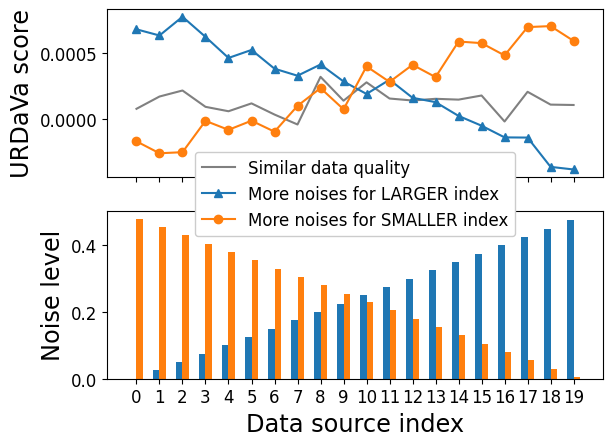

In [26]:
import numpy as np
import os

average_values = {0: 7.909839724370475e-05, 1: 0.00017242690719672342, 2: 0.00021826898126816485, 3: 9.411635873537515e-05, 4: 6.0534640538958795e-05, 5: 0.00012030979093446983, 6: 3.540917843841908e-05, 7: -4.014007717328882e-05, 8: 0.00032214318123652383, 9: 0.0001408083667512751, 10: 0.00028041480201925287, 11: 0.00015728454895221015, 12: 0.00014213066980267946, 13: 0.000155142462382731, 14: 0.0001489077856128118, 15: 0.0001802044332381128, 16: -1.73830373765762e-05, 17: 0.00020838806543570186, 18: 0.00011096964376876524, 19: 0.0001081243277416392}
average_noisy_values = {0: 0.0006834917519588605, 1: 0.0006365700517394624, 2: 0.0007790615401548035, 3: 0.0006261278134591457, 4: 0.00046585378157508765, 5: 0.0005267368359444518, 6: 0.0003840776893605475, 7: 0.00033070758404911367, 8: 0.0004160563263514025, 9: 0.0002869916449768769, 10: 0.0001920504554248024, 11: 0.00030033082538762215, 12: 0.00016275229523599936, 13: 0.00012979339248448557, 14: 2.5003417693778244e-05, 15: -4.942601995900217e-05, 16: -0.00013827248284175247, 17: -0.00013971821149947317, 18: -0.0003624353706945851, 19: -0.0003823574639155709}
average_reverse_noisy_values = {0: -0.00016840434536241253, 1: -0.00025900831704661907, 2: -0.00025079799269078404, 3: -1.2560394285031423e-05, 4: -8.081827856970952e-05, 5: -1.1448456205266448e-05, 6: -9.497164543413485e-05, 7: 0.00010154397634117311, 8: 0.00023654085984162884, 9: 7.535828526656014e-05, 10: 0.0004015178529520443, 11: 0.0002835992830404216, 12: 0.00041367358941678495, 13: 0.00032023269811971687, 14: 0.0005906835592910623, 15: 0.0005784988530619398, 16: 0.0004851584318365386, 17: 0.0007004230940664105, 18: 0.0007080419895060344, 19: 0.0005954138961626275}

fig, ax = plt.subplots(2, sharex=True)
line, = ax[0].plot(average_values.values(), color="grey")
line.set_label("Similar data quality")
noisy_line, = ax[0].plot(average_noisy_values.values(), marker="^", color="C0")
noisy_line.set_label("More noises for LARGER index")
reverse_noisy_line, = ax[0].plot(average_reverse_noisy_values.values(), marker="o", color="C1")
reverse_noisy_line.set_label("More noises for SMALLER index")
ax[0].legend(loc="lower center", fontsize="large", bbox_to_anchor=(0.5,-0.4), facecolor='white', framealpha=1)
ax[0].set_ylabel("URDaVa score", fontsize='xx-large')
ax[1].set_xlabel("Data source index", fontsize='xx-large')
ax[1].set_xticks(ticks=list(range(NUM_OF_DATA_SOURCES)))
ax[1].set_ylabel("Noise level", fontsize='xx-large')
width = 0.3
multiplier = 0
x = np.arange(NUM_OF_DATA_SOURCES)
noises = [0.025*i for i in range(NUM_OF_DATA_SOURCES)]
reverse_noises = [(0.48 - 0.025*i) for i in range(NUM_OF_DATA_SOURCES)]
all_noises = [noises, reverse_noises]
for i in range(len(all_noises)):
    offset = width * multiplier
    ax[1].bar(x + offset - width/2, all_noises[i], width, color=f"C{i}")
    multiplier += 1
    
ax[0].tick_params(axis='both', labelsize='large')
ax[1].tick_params(axis='both', labelsize='large')
ax[0].set_zorder(ax[1].get_zorder()+1)
    
plt.show()
PATH_TO_IMAGES = "./images/data_source_ranking/"
if not os.path.isdir(PATH_TO_IMAGES):
    os.makedirs(PATH_TO_IMAGES)
fig.savefig(os.path.join(PATH_TO_IMAGES, "data_quality_20_shapley_wind.png"), dpi=300, bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from urdava.coalition_probability import IndependentCoalitionProbability
from urdava.data_source import generate_random_data_sources, add_classification_noise
from urdava.data_valuation import ValuableModel
from urdava.dataset import load_dataset
from urdava.model_utility import IClassificationModel, model_gaussian_nb

# Add logs
import logging
import sys
logger = logging.getLogger()
formatter = logging.Formatter('%(asctime)s - %(lineno)s - %(levelname)s - %(message)s')
logger.setLevel(logging.DEBUG)

fhandler = logging.FileHandler(filename='main2.log', mode='w')
fhandler.setFormatter(formatter)
fhandler.setLevel(logging.INFO)
logger.addHandler(fhandler)

consoleHandler = logging.StreamHandler(sys.stdout)
consoleHandler.setFormatter(formatter)
consoleHandler.setLevel(logging.DEBUG)
logger.addHandler(consoleHandler)

logger.info("Program has started.")

X, y = load_dataset('credit card')

NUM_OF_DATA_SOURCES = 20
support_set = tuple(range(NUM_OF_DATA_SOURCES))
staying_probabilities = {i:0.9 for i in range(NUM_OF_DATA_SOURCES)}
coalition_probability = IndependentCoalitionProbability(staying_probabilities)

average_values = {}
average_noisy_values = {}
average_reverse_noisy_values = {}

model = model_gaussian_nb

N = 100
for n_iter in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    y_train_copy = y_train.copy()
    y_train_copy = add_classification_noise(y_train_copy, noise_level = 0.225)
    data_sources = generate_random_data_sources(X_train, y_train_copy, 
                                                num_of_data_sources=NUM_OF_DATA_SOURCES)
    noisy_data_sources = generate_random_data_sources(X_train, y_train, 
                                                      num_of_data_sources=NUM_OF_DATA_SOURCES)
    reverse_noisy_data_sources = generate_random_data_sources(X_train, y_train, 
                                                              num_of_data_sources=NUM_OF_DATA_SOURCES)
    for i in range(NUM_OF_DATA_SOURCES):
        noisy_data_sources[i] = (noisy_data_sources[i][0], 
                                 add_classification_noise(noisy_data_sources[i][1], noise_level = 0.025*i))
        reverse_noisy_data_sources[i] = (reverse_noisy_data_sources[i][0],
                                         add_classification_noise(reverse_noisy_data_sources[i][1], 
                                                                  noise_level = 0.48-0.025*i))

    print(f"=====> Iteration #{n_iter}")

    # no noise
    model_utility_function = IClassificationModel(model, data_sources, X_test, y_test)
    valuable_model = ValuableModel(support_set, model_utility_function)
    values = valuable_model.valuate(data_valuation_function="012-mcmc robust beta", 
                                    coalition_probability=coalition_probability, tol=1.00005, alpha=4, beta=16)
    
    for i in values:
        if average_values.get(i, 0) == 0:
            average_values[i] = []
        average_values[i].append(values[i])


    # increasing noise
    model_utility_function = IClassificationModel(model, noisy_data_sources, X_test, y_test)
    noisy_valuable_model = ValuableModel(support_set, model_utility_function)
    noisy_values = noisy_valuable_model.valuate(data_valuation_function="012-mcmc robust beta", 
                                    coalition_probability=coalition_probability, tol=1.00005, alpha=4, beta=16)
    
    for i in noisy_values:
        if average_noisy_values.get(i, 0) == 0:
            average_noisy_values[i] = []
        average_noisy_values[i].append(noisy_values[i])
        
    # decreasing noise
    model_utility_function = IClassificationModel(model, reverse_noisy_data_sources, X_test, y_test)
    reverse_noisy_valuable_model = ValuableModel(support_set, model_utility_function)
    reverse_noisy_values = reverse_noisy_valuable_model.valuate(data_valuation_function="012-mcmc robust beta", 
                                    coalition_probability=coalition_probability, tol=1.00005, alpha=4, beta=16)
    
    for i in reverse_noisy_values:
        if average_reverse_noisy_values.get(i, 0) == 0:
            average_reverse_noisy_values[i] = []
        average_reverse_noisy_values[i].append(reverse_noisy_values[i])
        
    logger.info(f"Iteration {n_iter} has completed.")

for i in average_values:
    average_values[i] = sum(list(sorted(average_values[i]))[25:75]) / 50
    average_noisy_values[i] = sum(list(sorted(average_noisy_values[i]))[25:75]) / 50
    average_reverse_noisy_values[i] = sum(list(sorted(average_reverse_noisy_values[i]))[25:75]) / 50
    
logger.info(f"=====> Average values: {str(average_values)}")
logger.info(f"=====> Average noisy values: {str(average_noisy_values)}")
logger.info(f"=====> Average reverse noisy values: {str(average_reverse_noisy_values)}")
    


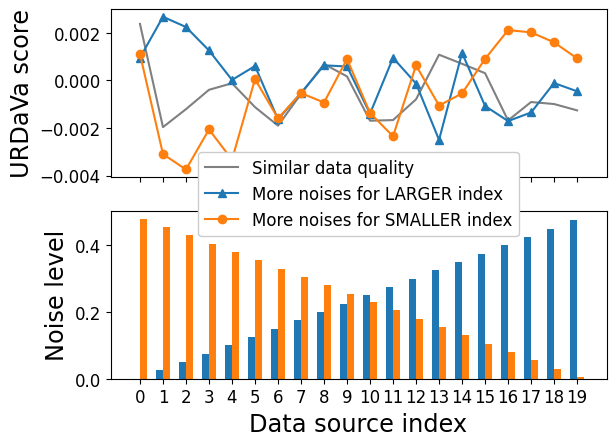

In [25]:
import numpy as np
import os

average_values = {0: 0.0023750390042511305, 1: -0.001964864323338697, 2: -0.0012083345624521482, 3: -0.0003955943459287223, 4: -0.00011888767016736591, 5: -0.0011228344537419516, 6: -0.0019026239499754171, 7: -0.0005676057327452969, 8: 0.0006869220886534863, 9: 0.00016833646341478283, 10: -0.0016954573306050796, 11: -0.001668309919331585, 12: -0.0007957470424234803, 13: 0.0010808260175122991, 14: 0.0006993609557460753, 15: 0.0003036511328332546, 16: -0.0016839823979022275, 17: -0.000909085419111279, 18: -0.0009931633658481934, 19: -0.0012599341256313628}
average_noisy_values = {0: 0.0009523388436211007, 1: 0.0026770708656736887, 2: 0.0022452470782122185, 3: 0.0012597893043241426, 4: 1.9849530267930534e-05, 5: 0.0006054115785646005, 6: -0.0016358863611275762, 7: -0.0005252579589278139, 8: 0.0006337524548350125, 9: 0.000585765358429549, 10: -0.001399425461673677, 11: 0.0009481592310838426, 12: -0.00012996660880416064, 13: -0.0025003026040244115, 14: 0.0011593951878935403, 15: -0.0010744941540126627, 16: -0.0017101176676599511, 17: -0.0013488487619138668, 18: -0.00011078091328974238, 19: -0.0004576665368639422}
average_reverse_noisy_values = {0: 0.0011069121946889727, 1: -0.003100195195455632, 2: -0.0037461023144037555, 3: -0.002061940707748168, 4: -0.0033348663506752975, 5: 5.4837762357808247e-05, 6: -0.001597608295413179, 7: -0.0005330120338125205, 8: -0.00092908383848873, 9: 0.0008997197479948174, 10: -0.001369583765617549, 11: -0.0023497262313767566, 12: 0.0006331860832150532, 13: -0.001057289817834593, 14: -0.0005469319287155223, 15: 0.000905352578907536, 16: 0.0021145053581495955, 17: 0.0020214989211303214, 18: 0.001599710531455022, 19: 0.0009264749118778045}
NUM_OF_DATA_SOURCES = 20

fig, ax = plt.subplots(2, sharex=True)
line, = ax[0].plot(average_values.values(), color="grey")
line.set_label("Similar data quality")
noisy_line, = ax[0].plot(average_noisy_values.values(), marker="^", color="C0")
noisy_line.set_label("More noises for LARGER index")
reverse_noisy_line, = ax[0].plot(average_reverse_noisy_values.values(), marker="o", color="C1")
reverse_noisy_line.set_label("More noises for SMALLER index")
ax[0].legend(loc="lower center", fontsize="large", bbox_to_anchor=(0.5,-0.4), facecolor='white', framealpha=1)
ax[0].set_ylabel("URDaVa score", fontsize='xx-large')
ax[1].set_xlabel("Data source index", fontsize='xx-large')
ax[1].set_xticks(ticks=list(range(NUM_OF_DATA_SOURCES)))
ax[1].set_ylabel("Noise level", fontsize='xx-large')
width = 0.3
multiplier = 0
x = np.arange(NUM_OF_DATA_SOURCES)
noises = [0.025*i for i in range(NUM_OF_DATA_SOURCES)]
reverse_noises = [(0.48 - 0.025*i) for i in range(NUM_OF_DATA_SOURCES)]
all_noises = [noises, reverse_noises]
for i in range(len(all_noises)):
    offset = width * multiplier
    ax[1].bar(x + offset - width/2, all_noises[i], width, color=f"C{i}")
    multiplier += 1
    
ax[0].tick_params(axis='both', labelsize='large')
ax[1].tick_params(axis='both', labelsize='large')
ax[0].set_zorder(ax[1].get_zorder()+1)
    
plt.show()
PATH_TO_IMAGES = "./images/data_source_ranking/"
if not os.path.isdir(PATH_TO_IMAGES):
    os.makedirs(PATH_TO_IMAGES)
fig.savefig(os.path.join(PATH_TO_IMAGES, "data_quality_20_beta_credit_card.png"), dpi=300, bbox_inches='tight')

### Varying Staying Probability

In [67]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from urdava.coalition_probability import IndependentCoalitionProbability
from urdava.data_source import generate_random_data_sources, add_classification_noise
from urdava.data_valuation import ValuableModel
from urdava.dataset import load_dataset
from urdava.model_utility import IClassificationModel, model_logistic_regression

# Add logs
import logging
import sys
logger = logging.getLogger()
formatter = logging.Formatter('%(asctime)s - %(lineno)s - %(levelname)s - %(message)s')
logger.setLevel(logging.DEBUG)

fhandler = logging.FileHandler(filename='main2.log', mode='w')
fhandler.setFormatter(formatter)
fhandler.setLevel(logging.INFO)
logger.addHandler(fhandler)

consoleHandler = logging.StreamHandler(sys.stdout)
consoleHandler.setFormatter(formatter)
consoleHandler.setLevel(logging.DEBUG)
logger.addHandler(consoleHandler)

logger.info("Program has started.")


X, y = load_dataset('phoneme')

NUM_OF_DATA_SOURCES = 10
support_set = tuple(range(NUM_OF_DATA_SOURCES))

average_staying_probabilities = sum((1 - 0.05 * i) for i in range(10)) / 10
uniform_staying_probabilities = [average_staying_probabilities for i in range(10)]
decreasing_staying_probabilities = [(1 - 0.05 * i) for i in range(10)]
increasing_staying_probabilities = decreasing_staying_probabilities.copy()
increasing_staying_probabilities.reverse()

uniform_staying_probabilities = {i:uniform_staying_probabilities[i] for i in range(NUM_OF_DATA_SOURCES)}
decreasing_staying_probabilities = {i:decreasing_staying_probabilities[i] for i in range(NUM_OF_DATA_SOURCES)}
increasing_staying_probabilities = {i:increasing_staying_probabilities[i] for i in range(NUM_OF_DATA_SOURCES)}

coalition_probability = IndependentCoalitionProbability(uniform_staying_probabilities)
decreasing_coalition_probability = IndependentCoalitionProbability(decreasing_staying_probabilities)
increasing_coalition_probability = IndependentCoalitionProbability(increasing_staying_probabilities)

average_uniform_values = {}
average_increasing_values = {}
average_decreasing_values = {}

model = model_logistic_regression

# repeat for N times to ensure even split of data
N = 100
for n_iter in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    data_sources = generate_random_data_sources(X_train, y_train, 
                                                num_of_data_sources=NUM_OF_DATA_SOURCES)

    model_utility_function = IClassificationModel(model, data_sources, X_test, y_test)
    valuable_model = ValuableModel(support_set, model_utility_function)
    values = valuable_model.valuate(data_valuation_function="robust banzhaf", 
                                    coalition_probability=coalition_probability)

    for i in values:
        if average_uniform_values.get(i, 0) == 0:
            average_uniform_values[i] = []
        average_uniform_values[i].append(values[i])

    increasing_values = valuable_model.valuate(data_valuation_function="robust banzhaf", 
                                               coalition_probability=increasing_coalition_probability)
    for i in increasing_values:
        if average_increasing_values.get(i, 0) == 0:
            average_increasing_values[i] = []
        average_increasing_values[i].append(increasing_values[i])
        
    decreasing_values = valuable_model.valuate(data_valuation_function="robust banzhaf", 
                                               coalition_probability=decreasing_coalition_probability)
    for i in decreasing_values:
        if average_decreasing_values.get(i, 0) == 0:
            average_decreasing_values[i] = []
        average_decreasing_values[i].append(decreasing_values[i])
        
    logger.info(f"Iteration {n_iter} has completed.")

# get average
for i in average_values:
    average_uniform_values[i] = sum(list(sorted(average_uniform_values[i]))[25:75]) / 50
    average_increasing_values[i] = sum(list(sorted(average_increasing_values[i]))[25:75]) / 50
    average_decreasing_values[i] = sum(list(sorted(average_decreasing_values[i]))[25:75]) / 50
    
logger.info(f"=====> Average uniform values: {str(average_uniform_values)}")
logger.info(f"=====> Average increasing values: {str(average_increasing_values)}")
logger.info(f"=====> Average decreasing values: {str(average_decreasing_values)}")

2023-05-05 01:55:27,528 - 26 - INFO - Program has started.
2023-05-05 01:55:27,528 - 26 - INFO - Program has started.
2023-05-05 01:55:27,528 - 26 - INFO - Program has started.
2023-05-05 01:55:27,528 - 26 - INFO - Program has started.
2023-05-05 01:55:27,528 - 26 - INFO - Program has started.
2023-05-05 01:55:27,528 - 26 - INFO - Program has started.
2023-05-05 01:55:27,528 - 26 - INFO - Program has started.
2023-05-05 01:55:27,528 - 26 - INFO - Program has started.
2023-05-05 01:55:27,528 - 26 - INFO - Program has started.
2023-05-05 01:55:27,528 - 26 - INFO - Program has started.
2023-05-05 01:55:27,528 - 26 - INFO - Program has started.
2023-05-05 01:55:27,528 - 26 - INFO - Program has started.
2023-05-05 01:55:27,528 - 26 - INFO - Program has started.
2023-05-05 01:55:27,528 - 26 - INFO - Program has started.
2023-05-05 01:55:27,528 - 26 - INFO - Program has started.
2023-05-05 01:55:27,528 - 26 - INFO - Program has started.
2023-05-05 01:55:27,528 - 26 - INFO - Program has starte

2023-05-05 01:56:11,214 - 86 - INFO - Iteration 5 has completed.
2023-05-05 01:56:11,214 - 86 - INFO - Iteration 5 has completed.
2023-05-05 01:56:11,214 - 86 - INFO - Iteration 5 has completed.
2023-05-05 01:56:11,214 - 86 - INFO - Iteration 5 has completed.
2023-05-05 01:56:11,214 - 86 - INFO - Iteration 5 has completed.
2023-05-05 01:56:18,251 - 86 - INFO - Iteration 6 has completed.
2023-05-05 01:56:18,251 - 86 - INFO - Iteration 6 has completed.
2023-05-05 01:56:18,251 - 86 - INFO - Iteration 6 has completed.
2023-05-05 01:56:18,251 - 86 - INFO - Iteration 6 has completed.
2023-05-05 01:56:18,251 - 86 - INFO - Iteration 6 has completed.
2023-05-05 01:56:18,251 - 86 - INFO - Iteration 6 has completed.
2023-05-05 01:56:18,251 - 86 - INFO - Iteration 6 has completed.
2023-05-05 01:56:18,251 - 86 - INFO - Iteration 6 has completed.
2023-05-05 01:56:18,251 - 86 - INFO - Iteration 6 has completed.
2023-05-05 01:56:18,251 - 86 - INFO - Iteration 6 has completed.
2023-05-05 01:56:18,251 -

2023-05-05 01:57:00,634 - 86 - INFO - Iteration 12 has completed.
2023-05-05 01:57:00,634 - 86 - INFO - Iteration 12 has completed.
2023-05-05 01:57:00,634 - 86 - INFO - Iteration 12 has completed.
2023-05-05 01:57:00,634 - 86 - INFO - Iteration 12 has completed.
2023-05-05 01:57:00,634 - 86 - INFO - Iteration 12 has completed.
2023-05-05 01:57:00,634 - 86 - INFO - Iteration 12 has completed.
2023-05-05 01:57:00,634 - 86 - INFO - Iteration 12 has completed.
2023-05-05 01:57:00,634 - 86 - INFO - Iteration 12 has completed.
2023-05-05 01:57:00,634 - 86 - INFO - Iteration 12 has completed.
2023-05-05 01:57:00,634 - 86 - INFO - Iteration 12 has completed.
2023-05-05 01:57:00,634 - 86 - INFO - Iteration 12 has completed.
2023-05-05 01:57:00,634 - 86 - INFO - Iteration 12 has completed.
2023-05-05 01:57:07,760 - 86 - INFO - Iteration 13 has completed.
2023-05-05 01:57:07,760 - 86 - INFO - Iteration 13 has completed.
2023-05-05 01:57:07,760 - 86 - INFO - Iteration 13 has completed.
2023-05-05

2023-05-05 01:57:42,890 - 86 - INFO - Iteration 18 has completed.
2023-05-05 01:57:49,826 - 86 - INFO - Iteration 19 has completed.
2023-05-05 01:57:49,826 - 86 - INFO - Iteration 19 has completed.
2023-05-05 01:57:49,826 - 86 - INFO - Iteration 19 has completed.
2023-05-05 01:57:49,826 - 86 - INFO - Iteration 19 has completed.
2023-05-05 01:57:49,826 - 86 - INFO - Iteration 19 has completed.
2023-05-05 01:57:49,826 - 86 - INFO - Iteration 19 has completed.
2023-05-05 01:57:49,826 - 86 - INFO - Iteration 19 has completed.
2023-05-05 01:57:49,826 - 86 - INFO - Iteration 19 has completed.
2023-05-05 01:57:49,826 - 86 - INFO - Iteration 19 has completed.
2023-05-05 01:57:49,826 - 86 - INFO - Iteration 19 has completed.
2023-05-05 01:57:49,826 - 86 - INFO - Iteration 19 has completed.
2023-05-05 01:57:49,826 - 86 - INFO - Iteration 19 has completed.
2023-05-05 01:57:49,826 - 86 - INFO - Iteration 19 has completed.
2023-05-05 01:57:49,826 - 86 - INFO - Iteration 19 has completed.
2023-05-05

2023-05-05 01:58:30,707 - 86 - INFO - Iteration 25 has completed.
2023-05-05 01:58:30,707 - 86 - INFO - Iteration 25 has completed.
2023-05-05 01:58:30,707 - 86 - INFO - Iteration 25 has completed.
2023-05-05 01:58:30,707 - 86 - INFO - Iteration 25 has completed.
2023-05-05 01:58:30,707 - 86 - INFO - Iteration 25 has completed.
2023-05-05 01:58:30,707 - 86 - INFO - Iteration 25 has completed.
2023-05-05 01:58:30,707 - 86 - INFO - Iteration 25 has completed.
2023-05-05 01:58:30,707 - 86 - INFO - Iteration 25 has completed.
2023-05-05 01:58:30,707 - 86 - INFO - Iteration 25 has completed.
2023-05-05 01:58:37,794 - 86 - INFO - Iteration 26 has completed.
2023-05-05 01:58:37,794 - 86 - INFO - Iteration 26 has completed.
2023-05-05 01:58:37,794 - 86 - INFO - Iteration 26 has completed.
2023-05-05 01:58:37,794 - 86 - INFO - Iteration 26 has completed.
2023-05-05 01:58:37,794 - 86 - INFO - Iteration 26 has completed.
2023-05-05 01:58:37,794 - 86 - INFO - Iteration 26 has completed.
2023-05-05

2023-05-05 01:59:19,888 - 86 - INFO - Iteration 32 has completed.
2023-05-05 01:59:19,888 - 86 - INFO - Iteration 32 has completed.
2023-05-05 01:59:19,888 - 86 - INFO - Iteration 32 has completed.
2023-05-05 01:59:19,888 - 86 - INFO - Iteration 32 has completed.
2023-05-05 01:59:19,888 - 86 - INFO - Iteration 32 has completed.
2023-05-05 01:59:19,888 - 86 - INFO - Iteration 32 has completed.
2023-05-05 01:59:19,888 - 86 - INFO - Iteration 32 has completed.
2023-05-05 01:59:19,888 - 86 - INFO - Iteration 32 has completed.
2023-05-05 01:59:19,888 - 86 - INFO - Iteration 32 has completed.
2023-05-05 01:59:19,888 - 86 - INFO - Iteration 32 has completed.
2023-05-05 01:59:19,888 - 86 - INFO - Iteration 32 has completed.
2023-05-05 01:59:19,888 - 86 - INFO - Iteration 32 has completed.
2023-05-05 01:59:19,888 - 86 - INFO - Iteration 32 has completed.
2023-05-05 01:59:19,888 - 86 - INFO - Iteration 32 has completed.
2023-05-05 01:59:19,888 - 86 - INFO - Iteration 32 has completed.
2023-05-05

2023-05-05 02:00:03,390 - 86 - INFO - Iteration 38 has completed.
2023-05-05 02:00:03,390 - 86 - INFO - Iteration 38 has completed.
2023-05-05 02:00:03,390 - 86 - INFO - Iteration 38 has completed.
2023-05-05 02:00:03,390 - 86 - INFO - Iteration 38 has completed.
2023-05-05 02:00:03,390 - 86 - INFO - Iteration 38 has completed.
2023-05-05 02:00:03,390 - 86 - INFO - Iteration 38 has completed.
2023-05-05 02:00:10,216 - 86 - INFO - Iteration 39 has completed.
2023-05-05 02:00:10,216 - 86 - INFO - Iteration 39 has completed.
2023-05-05 02:00:10,216 - 86 - INFO - Iteration 39 has completed.
2023-05-05 02:00:10,216 - 86 - INFO - Iteration 39 has completed.
2023-05-05 02:00:10,216 - 86 - INFO - Iteration 39 has completed.
2023-05-05 02:00:10,216 - 86 - INFO - Iteration 39 has completed.
2023-05-05 02:00:10,216 - 86 - INFO - Iteration 39 has completed.
2023-05-05 02:00:10,216 - 86 - INFO - Iteration 39 has completed.
2023-05-05 02:00:10,216 - 86 - INFO - Iteration 39 has completed.
2023-05-05

2023-05-05 02:00:51,466 - 86 - INFO - Iteration 45 has completed.
2023-05-05 02:00:51,466 - 86 - INFO - Iteration 45 has completed.
2023-05-05 02:00:51,466 - 86 - INFO - Iteration 45 has completed.
2023-05-05 02:00:51,466 - 86 - INFO - Iteration 45 has completed.
2023-05-05 02:00:51,466 - 86 - INFO - Iteration 45 has completed.
2023-05-05 02:00:51,466 - 86 - INFO - Iteration 45 has completed.
2023-05-05 02:00:51,466 - 86 - INFO - Iteration 45 has completed.
2023-05-05 02:00:51,466 - 86 - INFO - Iteration 45 has completed.
2023-05-05 02:00:51,466 - 86 - INFO - Iteration 45 has completed.
2023-05-05 02:00:51,466 - 86 - INFO - Iteration 45 has completed.
2023-05-05 02:00:51,466 - 86 - INFO - Iteration 45 has completed.
2023-05-05 02:00:51,466 - 86 - INFO - Iteration 45 has completed.
2023-05-05 02:00:51,466 - 86 - INFO - Iteration 45 has completed.
2023-05-05 02:00:51,466 - 86 - INFO - Iteration 45 has completed.
2023-05-05 02:00:58,333 - 86 - INFO - Iteration 46 has completed.
2023-05-05

2023-05-05 02:01:32,590 - 86 - INFO - Iteration 51 has completed.
2023-05-05 02:01:32,590 - 86 - INFO - Iteration 51 has completed.
2023-05-05 02:01:32,590 - 86 - INFO - Iteration 51 has completed.
2023-05-05 02:01:39,382 - 86 - INFO - Iteration 52 has completed.
2023-05-05 02:01:39,382 - 86 - INFO - Iteration 52 has completed.
2023-05-05 02:01:39,382 - 86 - INFO - Iteration 52 has completed.
2023-05-05 02:01:39,382 - 86 - INFO - Iteration 52 has completed.
2023-05-05 02:01:39,382 - 86 - INFO - Iteration 52 has completed.
2023-05-05 02:01:39,382 - 86 - INFO - Iteration 52 has completed.
2023-05-05 02:01:39,382 - 86 - INFO - Iteration 52 has completed.
2023-05-05 02:01:39,382 - 86 - INFO - Iteration 52 has completed.
2023-05-05 02:01:39,382 - 86 - INFO - Iteration 52 has completed.
2023-05-05 02:01:39,382 - 86 - INFO - Iteration 52 has completed.
2023-05-05 02:01:39,382 - 86 - INFO - Iteration 52 has completed.
2023-05-05 02:01:39,382 - 86 - INFO - Iteration 52 has completed.
2023-05-05

2023-05-05 02:02:20,100 - 86 - INFO - Iteration 58 has completed.
2023-05-05 02:02:20,100 - 86 - INFO - Iteration 58 has completed.
2023-05-05 02:02:20,100 - 86 - INFO - Iteration 58 has completed.
2023-05-05 02:02:20,100 - 86 - INFO - Iteration 58 has completed.
2023-05-05 02:02:20,100 - 86 - INFO - Iteration 58 has completed.
2023-05-05 02:02:20,100 - 86 - INFO - Iteration 58 has completed.
2023-05-05 02:02:20,100 - 86 - INFO - Iteration 58 has completed.
2023-05-05 02:02:20,100 - 86 - INFO - Iteration 58 has completed.
2023-05-05 02:02:20,100 - 86 - INFO - Iteration 58 has completed.
2023-05-05 02:02:20,100 - 86 - INFO - Iteration 58 has completed.
2023-05-05 02:02:20,100 - 86 - INFO - Iteration 58 has completed.
2023-05-05 02:02:26,979 - 86 - INFO - Iteration 59 has completed.
2023-05-05 02:02:26,979 - 86 - INFO - Iteration 59 has completed.
2023-05-05 02:02:26,979 - 86 - INFO - Iteration 59 has completed.
2023-05-05 02:02:26,979 - 86 - INFO - Iteration 59 has completed.
2023-05-05

2023-05-05 02:03:08,198 - 86 - INFO - Iteration 65 has completed.
2023-05-05 02:03:08,198 - 86 - INFO - Iteration 65 has completed.
2023-05-05 02:03:08,198 - 86 - INFO - Iteration 65 has completed.
2023-05-05 02:03:08,198 - 86 - INFO - Iteration 65 has completed.
2023-05-05 02:03:08,198 - 86 - INFO - Iteration 65 has completed.
2023-05-05 02:03:08,198 - 86 - INFO - Iteration 65 has completed.
2023-05-05 02:03:08,198 - 86 - INFO - Iteration 65 has completed.
2023-05-05 02:03:08,198 - 86 - INFO - Iteration 65 has completed.
2023-05-05 02:03:08,198 - 86 - INFO - Iteration 65 has completed.
2023-05-05 02:03:08,198 - 86 - INFO - Iteration 65 has completed.
2023-05-05 02:03:08,198 - 86 - INFO - Iteration 65 has completed.
2023-05-05 02:03:08,198 - 86 - INFO - Iteration 65 has completed.
2023-05-05 02:03:08,198 - 86 - INFO - Iteration 65 has completed.
2023-05-05 02:03:08,198 - 86 - INFO - Iteration 65 has completed.
2023-05-05 02:03:08,198 - 86 - INFO - Iteration 65 has completed.
2023-05-05

2023-05-05 02:03:48,087 - 86 - INFO - Iteration 71 has completed.
2023-05-05 02:03:48,087 - 86 - INFO - Iteration 71 has completed.
2023-05-05 02:03:48,087 - 86 - INFO - Iteration 71 has completed.
2023-05-05 02:03:48,087 - 86 - INFO - Iteration 71 has completed.
2023-05-05 02:03:48,087 - 86 - INFO - Iteration 71 has completed.
2023-05-05 02:03:48,087 - 86 - INFO - Iteration 71 has completed.
2023-05-05 02:03:48,087 - 86 - INFO - Iteration 71 has completed.
2023-05-05 02:03:48,087 - 86 - INFO - Iteration 71 has completed.
2023-05-05 02:03:54,686 - 86 - INFO - Iteration 72 has completed.
2023-05-05 02:03:54,686 - 86 - INFO - Iteration 72 has completed.
2023-05-05 02:03:54,686 - 86 - INFO - Iteration 72 has completed.
2023-05-05 02:03:54,686 - 86 - INFO - Iteration 72 has completed.
2023-05-05 02:03:54,686 - 86 - INFO - Iteration 72 has completed.
2023-05-05 02:03:54,686 - 86 - INFO - Iteration 72 has completed.
2023-05-05 02:03:54,686 - 86 - INFO - Iteration 72 has completed.
2023-05-05

2023-05-05 02:04:36,064 - 86 - INFO - Iteration 78 has completed.
2023-05-05 02:04:36,064 - 86 - INFO - Iteration 78 has completed.
2023-05-05 02:04:36,064 - 86 - INFO - Iteration 78 has completed.
2023-05-05 02:04:36,064 - 86 - INFO - Iteration 78 has completed.
2023-05-05 02:04:36,064 - 86 - INFO - Iteration 78 has completed.
2023-05-05 02:04:36,064 - 86 - INFO - Iteration 78 has completed.
2023-05-05 02:04:36,064 - 86 - INFO - Iteration 78 has completed.
2023-05-05 02:04:36,064 - 86 - INFO - Iteration 78 has completed.
2023-05-05 02:04:36,064 - 86 - INFO - Iteration 78 has completed.
2023-05-05 02:04:36,064 - 86 - INFO - Iteration 78 has completed.
2023-05-05 02:04:36,064 - 86 - INFO - Iteration 78 has completed.
2023-05-05 02:04:36,064 - 86 - INFO - Iteration 78 has completed.
2023-05-05 02:04:36,064 - 86 - INFO - Iteration 78 has completed.
2023-05-05 02:04:36,064 - 86 - INFO - Iteration 78 has completed.
2023-05-05 02:04:36,064 - 86 - INFO - Iteration 78 has completed.
2023-05-05

2023-05-05 02:05:17,278 - 86 - INFO - Iteration 84 has completed.
2023-05-05 02:05:17,278 - 86 - INFO - Iteration 84 has completed.
2023-05-05 02:05:17,278 - 86 - INFO - Iteration 84 has completed.
2023-05-05 02:05:17,278 - 86 - INFO - Iteration 84 has completed.
2023-05-05 02:05:17,278 - 86 - INFO - Iteration 84 has completed.
2023-05-05 02:05:24,135 - 86 - INFO - Iteration 85 has completed.
2023-05-05 02:05:24,135 - 86 - INFO - Iteration 85 has completed.
2023-05-05 02:05:24,135 - 86 - INFO - Iteration 85 has completed.
2023-05-05 02:05:24,135 - 86 - INFO - Iteration 85 has completed.
2023-05-05 02:05:24,135 - 86 - INFO - Iteration 85 has completed.
2023-05-05 02:05:24,135 - 86 - INFO - Iteration 85 has completed.
2023-05-05 02:05:24,135 - 86 - INFO - Iteration 85 has completed.
2023-05-05 02:05:24,135 - 86 - INFO - Iteration 85 has completed.
2023-05-05 02:05:24,135 - 86 - INFO - Iteration 85 has completed.
2023-05-05 02:05:24,135 - 86 - INFO - Iteration 85 has completed.
2023-05-05

2023-05-05 02:06:05,107 - 86 - INFO - Iteration 91 has completed.
2023-05-05 02:06:05,107 - 86 - INFO - Iteration 91 has completed.
2023-05-05 02:06:05,107 - 86 - INFO - Iteration 91 has completed.
2023-05-05 02:06:05,107 - 86 - INFO - Iteration 91 has completed.
2023-05-05 02:06:05,107 - 86 - INFO - Iteration 91 has completed.
2023-05-05 02:06:05,107 - 86 - INFO - Iteration 91 has completed.
2023-05-05 02:06:05,107 - 86 - INFO - Iteration 91 has completed.
2023-05-05 02:06:05,107 - 86 - INFO - Iteration 91 has completed.
2023-05-05 02:06:05,107 - 86 - INFO - Iteration 91 has completed.
2023-05-05 02:06:05,107 - 86 - INFO - Iteration 91 has completed.
2023-05-05 02:06:05,107 - 86 - INFO - Iteration 91 has completed.
2023-05-05 02:06:05,107 - 86 - INFO - Iteration 91 has completed.
2023-05-05 02:06:05,107 - 86 - INFO - Iteration 91 has completed.
2023-05-05 02:06:11,984 - 86 - INFO - Iteration 92 has completed.
2023-05-05 02:06:11,984 - 86 - INFO - Iteration 92 has completed.
2023-05-05

2023-05-05 02:06:46,024 - 86 - INFO - Iteration 97 has completed.
2023-05-05 02:06:46,024 - 86 - INFO - Iteration 97 has completed.
2023-05-05 02:06:52,751 - 86 - INFO - Iteration 98 has completed.
2023-05-05 02:06:52,751 - 86 - INFO - Iteration 98 has completed.
2023-05-05 02:06:52,751 - 86 - INFO - Iteration 98 has completed.
2023-05-05 02:06:52,751 - 86 - INFO - Iteration 98 has completed.
2023-05-05 02:06:52,751 - 86 - INFO - Iteration 98 has completed.
2023-05-05 02:06:52,751 - 86 - INFO - Iteration 98 has completed.
2023-05-05 02:06:52,751 - 86 - INFO - Iteration 98 has completed.
2023-05-05 02:06:52,751 - 86 - INFO - Iteration 98 has completed.
2023-05-05 02:06:52,751 - 86 - INFO - Iteration 98 has completed.
2023-05-05 02:06:52,751 - 86 - INFO - Iteration 98 has completed.
2023-05-05 02:06:52,751 - 86 - INFO - Iteration 98 has completed.
2023-05-05 02:06:52,751 - 86 - INFO - Iteration 98 has completed.
2023-05-05 02:06:52,751 - 86 - INFO - Iteration 98 has completed.
2023-05-05

2023-05-05 02:06:59,654 - 94 - INFO - =====> Average uniform values: {0: [0.01147047696579908, 0.009145973535672005, 0.011097434585334345, 0.002476674579567639, 0.00820597827378062, 0.008080656244337457, 0.00661604424620315, 0.01123044424180441, 0.00726588338554097, 0.005445447762460184, 0.005155619151177977, 0.008323410245734662, 0.0084945397681549, 0.01246613771045415, 0.0032695943917152373, 0.00852699438999855, 0.0038478360110921123, 0.013184772486126562, 0.007530170078461938, 0.008194170010926502, 0.010369670339988774, 0.005165890083259202, 0.0056313095913346906, 0.009844215057374851, 0.007525573163337316, 0.0059242826440247245, 0.008304345252842099, 0.005521875095348115, 0.005880446154899445, -0.001933302721810111, 0.008003959105563856, 0.006616468910202763, 0.007479992497052877, -0.00016621073029609242, 0.00868719331605955, 0.006901137390711544, 0.008249276801054703, 0.010232429578197458, 0.0020729029981758707, -0.001510519029055973, 0.011198533721400573, 0.0019445943621852664, 0

2023-05-05 02:06:59,654 - 94 - INFO - =====> Average uniform values: {0: [0.01147047696579908, 0.009145973535672005, 0.011097434585334345, 0.002476674579567639, 0.00820597827378062, 0.008080656244337457, 0.00661604424620315, 0.01123044424180441, 0.00726588338554097, 0.005445447762460184, 0.005155619151177977, 0.008323410245734662, 0.0084945397681549, 0.01246613771045415, 0.0032695943917152373, 0.00852699438999855, 0.0038478360110921123, 0.013184772486126562, 0.007530170078461938, 0.008194170010926502, 0.010369670339988774, 0.005165890083259202, 0.0056313095913346906, 0.009844215057374851, 0.007525573163337316, 0.0059242826440247245, 0.008304345252842099, 0.005521875095348115, 0.005880446154899445, -0.001933302721810111, 0.008003959105563856, 0.006616468910202763, 0.007479992497052877, -0.00016621073029609242, 0.00868719331605955, 0.006901137390711544, 0.008249276801054703, 0.010232429578197458, 0.0020729029981758707, -0.001510519029055973, 0.011198533721400573, 0.0019445943621852664, 0

2023-05-05 02:06:59,654 - 94 - INFO - =====> Average uniform values: {0: [0.01147047696579908, 0.009145973535672005, 0.011097434585334345, 0.002476674579567639, 0.00820597827378062, 0.008080656244337457, 0.00661604424620315, 0.01123044424180441, 0.00726588338554097, 0.005445447762460184, 0.005155619151177977, 0.008323410245734662, 0.0084945397681549, 0.01246613771045415, 0.0032695943917152373, 0.00852699438999855, 0.0038478360110921123, 0.013184772486126562, 0.007530170078461938, 0.008194170010926502, 0.010369670339988774, 0.005165890083259202, 0.0056313095913346906, 0.009844215057374851, 0.007525573163337316, 0.0059242826440247245, 0.008304345252842099, 0.005521875095348115, 0.005880446154899445, -0.001933302721810111, 0.008003959105563856, 0.006616468910202763, 0.007479992497052877, -0.00016621073029609242, 0.00868719331605955, 0.006901137390711544, 0.008249276801054703, 0.010232429578197458, 0.0020729029981758707, -0.001510519029055973, 0.011198533721400573, 0.0019445943621852664, 0

2023-05-05 02:06:59,654 - 94 - INFO - =====> Average uniform values: {0: [0.01147047696579908, 0.009145973535672005, 0.011097434585334345, 0.002476674579567639, 0.00820597827378062, 0.008080656244337457, 0.00661604424620315, 0.01123044424180441, 0.00726588338554097, 0.005445447762460184, 0.005155619151177977, 0.008323410245734662, 0.0084945397681549, 0.01246613771045415, 0.0032695943917152373, 0.00852699438999855, 0.0038478360110921123, 0.013184772486126562, 0.007530170078461938, 0.008194170010926502, 0.010369670339988774, 0.005165890083259202, 0.0056313095913346906, 0.009844215057374851, 0.007525573163337316, 0.0059242826440247245, 0.008304345252842099, 0.005521875095348115, 0.005880446154899445, -0.001933302721810111, 0.008003959105563856, 0.006616468910202763, 0.007479992497052877, -0.00016621073029609242, 0.00868719331605955, 0.006901137390711544, 0.008249276801054703, 0.010232429578197458, 0.0020729029981758707, -0.001510519029055973, 0.011198533721400573, 0.0019445943621852664, 0

2023-05-05 02:06:59,654 - 94 - INFO - =====> Average uniform values: {0: [0.01147047696579908, 0.009145973535672005, 0.011097434585334345, 0.002476674579567639, 0.00820597827378062, 0.008080656244337457, 0.00661604424620315, 0.01123044424180441, 0.00726588338554097, 0.005445447762460184, 0.005155619151177977, 0.008323410245734662, 0.0084945397681549, 0.01246613771045415, 0.0032695943917152373, 0.00852699438999855, 0.0038478360110921123, 0.013184772486126562, 0.007530170078461938, 0.008194170010926502, 0.010369670339988774, 0.005165890083259202, 0.0056313095913346906, 0.009844215057374851, 0.007525573163337316, 0.0059242826440247245, 0.008304345252842099, 0.005521875095348115, 0.005880446154899445, -0.001933302721810111, 0.008003959105563856, 0.006616468910202763, 0.007479992497052877, -0.00016621073029609242, 0.00868719331605955, 0.006901137390711544, 0.008249276801054703, 0.010232429578197458, 0.0020729029981758707, -0.001510519029055973, 0.011198533721400573, 0.0019445943621852664, 0

2023-05-05 02:06:59,654 - 94 - INFO - =====> Average uniform values: {0: [0.01147047696579908, 0.009145973535672005, 0.011097434585334345, 0.002476674579567639, 0.00820597827378062, 0.008080656244337457, 0.00661604424620315, 0.01123044424180441, 0.00726588338554097, 0.005445447762460184, 0.005155619151177977, 0.008323410245734662, 0.0084945397681549, 0.01246613771045415, 0.0032695943917152373, 0.00852699438999855, 0.0038478360110921123, 0.013184772486126562, 0.007530170078461938, 0.008194170010926502, 0.010369670339988774, 0.005165890083259202, 0.0056313095913346906, 0.009844215057374851, 0.007525573163337316, 0.0059242826440247245, 0.008304345252842099, 0.005521875095348115, 0.005880446154899445, -0.001933302721810111, 0.008003959105563856, 0.006616468910202763, 0.007479992497052877, -0.00016621073029609242, 0.00868719331605955, 0.006901137390711544, 0.008249276801054703, 0.010232429578197458, 0.0020729029981758707, -0.001510519029055973, 0.011198533721400573, 0.0019445943621852664, 0

2023-05-05 02:06:59,654 - 94 - INFO - =====> Average uniform values: {0: [0.01147047696579908, 0.009145973535672005, 0.011097434585334345, 0.002476674579567639, 0.00820597827378062, 0.008080656244337457, 0.00661604424620315, 0.01123044424180441, 0.00726588338554097, 0.005445447762460184, 0.005155619151177977, 0.008323410245734662, 0.0084945397681549, 0.01246613771045415, 0.0032695943917152373, 0.00852699438999855, 0.0038478360110921123, 0.013184772486126562, 0.007530170078461938, 0.008194170010926502, 0.010369670339988774, 0.005165890083259202, 0.0056313095913346906, 0.009844215057374851, 0.007525573163337316, 0.0059242826440247245, 0.008304345252842099, 0.005521875095348115, 0.005880446154899445, -0.001933302721810111, 0.008003959105563856, 0.006616468910202763, 0.007479992497052877, -0.00016621073029609242, 0.00868719331605955, 0.006901137390711544, 0.008249276801054703, 0.010232429578197458, 0.0020729029981758707, -0.001510519029055973, 0.011198533721400573, 0.0019445943621852664, 0

2023-05-05 02:06:59,654 - 94 - INFO - =====> Average uniform values: {0: [0.01147047696579908, 0.009145973535672005, 0.011097434585334345, 0.002476674579567639, 0.00820597827378062, 0.008080656244337457, 0.00661604424620315, 0.01123044424180441, 0.00726588338554097, 0.005445447762460184, 0.005155619151177977, 0.008323410245734662, 0.0084945397681549, 0.01246613771045415, 0.0032695943917152373, 0.00852699438999855, 0.0038478360110921123, 0.013184772486126562, 0.007530170078461938, 0.008194170010926502, 0.010369670339988774, 0.005165890083259202, 0.0056313095913346906, 0.009844215057374851, 0.007525573163337316, 0.0059242826440247245, 0.008304345252842099, 0.005521875095348115, 0.005880446154899445, -0.001933302721810111, 0.008003959105563856, 0.006616468910202763, 0.007479992497052877, -0.00016621073029609242, 0.00868719331605955, 0.006901137390711544, 0.008249276801054703, 0.010232429578197458, 0.0020729029981758707, -0.001510519029055973, 0.011198533721400573, 0.0019445943621852664, 0

2023-05-05 02:06:59,654 - 94 - INFO - =====> Average uniform values: {0: [0.01147047696579908, 0.009145973535672005, 0.011097434585334345, 0.002476674579567639, 0.00820597827378062, 0.008080656244337457, 0.00661604424620315, 0.01123044424180441, 0.00726588338554097, 0.005445447762460184, 0.005155619151177977, 0.008323410245734662, 0.0084945397681549, 0.01246613771045415, 0.0032695943917152373, 0.00852699438999855, 0.0038478360110921123, 0.013184772486126562, 0.007530170078461938, 0.008194170010926502, 0.010369670339988774, 0.005165890083259202, 0.0056313095913346906, 0.009844215057374851, 0.007525573163337316, 0.0059242826440247245, 0.008304345252842099, 0.005521875095348115, 0.005880446154899445, -0.001933302721810111, 0.008003959105563856, 0.006616468910202763, 0.007479992497052877, -0.00016621073029609242, 0.00868719331605955, 0.006901137390711544, 0.008249276801054703, 0.010232429578197458, 0.0020729029981758707, -0.001510519029055973, 0.011198533721400573, 0.0019445943621852664, 0

2023-05-05 02:06:59,654 - 94 - INFO - =====> Average uniform values: {0: [0.01147047696579908, 0.009145973535672005, 0.011097434585334345, 0.002476674579567639, 0.00820597827378062, 0.008080656244337457, 0.00661604424620315, 0.01123044424180441, 0.00726588338554097, 0.005445447762460184, 0.005155619151177977, 0.008323410245734662, 0.0084945397681549, 0.01246613771045415, 0.0032695943917152373, 0.00852699438999855, 0.0038478360110921123, 0.013184772486126562, 0.007530170078461938, 0.008194170010926502, 0.010369670339988774, 0.005165890083259202, 0.0056313095913346906, 0.009844215057374851, 0.007525573163337316, 0.0059242826440247245, 0.008304345252842099, 0.005521875095348115, 0.005880446154899445, -0.001933302721810111, 0.008003959105563856, 0.006616468910202763, 0.007479992497052877, -0.00016621073029609242, 0.00868719331605955, 0.006901137390711544, 0.008249276801054703, 0.010232429578197458, 0.0020729029981758707, -0.001510519029055973, 0.011198533721400573, 0.0019445943621852664, 0

2023-05-05 02:06:59,654 - 94 - INFO - =====> Average uniform values: {0: [0.01147047696579908, 0.009145973535672005, 0.011097434585334345, 0.002476674579567639, 0.00820597827378062, 0.008080656244337457, 0.00661604424620315, 0.01123044424180441, 0.00726588338554097, 0.005445447762460184, 0.005155619151177977, 0.008323410245734662, 0.0084945397681549, 0.01246613771045415, 0.0032695943917152373, 0.00852699438999855, 0.0038478360110921123, 0.013184772486126562, 0.007530170078461938, 0.008194170010926502, 0.010369670339988774, 0.005165890083259202, 0.0056313095913346906, 0.009844215057374851, 0.007525573163337316, 0.0059242826440247245, 0.008304345252842099, 0.005521875095348115, 0.005880446154899445, -0.001933302721810111, 0.008003959105563856, 0.006616468910202763, 0.007479992497052877, -0.00016621073029609242, 0.00868719331605955, 0.006901137390711544, 0.008249276801054703, 0.010232429578197458, 0.0020729029981758707, -0.001510519029055973, 0.011198533721400573, 0.0019445943621852664, 0

2023-05-05 02:06:59,654 - 94 - INFO - =====> Average uniform values: {0: [0.01147047696579908, 0.009145973535672005, 0.011097434585334345, 0.002476674579567639, 0.00820597827378062, 0.008080656244337457, 0.00661604424620315, 0.01123044424180441, 0.00726588338554097, 0.005445447762460184, 0.005155619151177977, 0.008323410245734662, 0.0084945397681549, 0.01246613771045415, 0.0032695943917152373, 0.00852699438999855, 0.0038478360110921123, 0.013184772486126562, 0.007530170078461938, 0.008194170010926502, 0.010369670339988774, 0.005165890083259202, 0.0056313095913346906, 0.009844215057374851, 0.007525573163337316, 0.0059242826440247245, 0.008304345252842099, 0.005521875095348115, 0.005880446154899445, -0.001933302721810111, 0.008003959105563856, 0.006616468910202763, 0.007479992497052877, -0.00016621073029609242, 0.00868719331605955, 0.006901137390711544, 0.008249276801054703, 0.010232429578197458, 0.0020729029981758707, -0.001510519029055973, 0.011198533721400573, 0.0019445943621852664, 0

2023-05-05 02:06:59,654 - 94 - INFO - =====> Average uniform values: {0: [0.01147047696579908, 0.009145973535672005, 0.011097434585334345, 0.002476674579567639, 0.00820597827378062, 0.008080656244337457, 0.00661604424620315, 0.01123044424180441, 0.00726588338554097, 0.005445447762460184, 0.005155619151177977, 0.008323410245734662, 0.0084945397681549, 0.01246613771045415, 0.0032695943917152373, 0.00852699438999855, 0.0038478360110921123, 0.013184772486126562, 0.007530170078461938, 0.008194170010926502, 0.010369670339988774, 0.005165890083259202, 0.0056313095913346906, 0.009844215057374851, 0.007525573163337316, 0.0059242826440247245, 0.008304345252842099, 0.005521875095348115, 0.005880446154899445, -0.001933302721810111, 0.008003959105563856, 0.006616468910202763, 0.007479992497052877, -0.00016621073029609242, 0.00868719331605955, 0.006901137390711544, 0.008249276801054703, 0.010232429578197458, 0.0020729029981758707, -0.001510519029055973, 0.011198533721400573, 0.0019445943621852664, 0

2023-05-05 02:06:59,654 - 94 - INFO - =====> Average uniform values: {0: [0.01147047696579908, 0.009145973535672005, 0.011097434585334345, 0.002476674579567639, 0.00820597827378062, 0.008080656244337457, 0.00661604424620315, 0.01123044424180441, 0.00726588338554097, 0.005445447762460184, 0.005155619151177977, 0.008323410245734662, 0.0084945397681549, 0.01246613771045415, 0.0032695943917152373, 0.00852699438999855, 0.0038478360110921123, 0.013184772486126562, 0.007530170078461938, 0.008194170010926502, 0.010369670339988774, 0.005165890083259202, 0.0056313095913346906, 0.009844215057374851, 0.007525573163337316, 0.0059242826440247245, 0.008304345252842099, 0.005521875095348115, 0.005880446154899445, -0.001933302721810111, 0.008003959105563856, 0.006616468910202763, 0.007479992497052877, -0.00016621073029609242, 0.00868719331605955, 0.006901137390711544, 0.008249276801054703, 0.010232429578197458, 0.0020729029981758707, -0.001510519029055973, 0.011198533721400573, 0.0019445943621852664, 0

2023-05-05 02:06:59,654 - 94 - INFO - =====> Average uniform values: {0: [0.01147047696579908, 0.009145973535672005, 0.011097434585334345, 0.002476674579567639, 0.00820597827378062, 0.008080656244337457, 0.00661604424620315, 0.01123044424180441, 0.00726588338554097, 0.005445447762460184, 0.005155619151177977, 0.008323410245734662, 0.0084945397681549, 0.01246613771045415, 0.0032695943917152373, 0.00852699438999855, 0.0038478360110921123, 0.013184772486126562, 0.007530170078461938, 0.008194170010926502, 0.010369670339988774, 0.005165890083259202, 0.0056313095913346906, 0.009844215057374851, 0.007525573163337316, 0.0059242826440247245, 0.008304345252842099, 0.005521875095348115, 0.005880446154899445, -0.001933302721810111, 0.008003959105563856, 0.006616468910202763, 0.007479992497052877, -0.00016621073029609242, 0.00868719331605955, 0.006901137390711544, 0.008249276801054703, 0.010232429578197458, 0.0020729029981758707, -0.001510519029055973, 0.011198533721400573, 0.0019445943621852664, 0

2023-05-05 02:06:59,654 - 94 - INFO - =====> Average uniform values: {0: [0.01147047696579908, 0.009145973535672005, 0.011097434585334345, 0.002476674579567639, 0.00820597827378062, 0.008080656244337457, 0.00661604424620315, 0.01123044424180441, 0.00726588338554097, 0.005445447762460184, 0.005155619151177977, 0.008323410245734662, 0.0084945397681549, 0.01246613771045415, 0.0032695943917152373, 0.00852699438999855, 0.0038478360110921123, 0.013184772486126562, 0.007530170078461938, 0.008194170010926502, 0.010369670339988774, 0.005165890083259202, 0.0056313095913346906, 0.009844215057374851, 0.007525573163337316, 0.0059242826440247245, 0.008304345252842099, 0.005521875095348115, 0.005880446154899445, -0.001933302721810111, 0.008003959105563856, 0.006616468910202763, 0.007479992497052877, -0.00016621073029609242, 0.00868719331605955, 0.006901137390711544, 0.008249276801054703, 0.010232429578197458, 0.0020729029981758707, -0.001510519029055973, 0.011198533721400573, 0.0019445943621852664, 0

2023-05-05 02:06:59,654 - 94 - INFO - =====> Average uniform values: {0: [0.01147047696579908, 0.009145973535672005, 0.011097434585334345, 0.002476674579567639, 0.00820597827378062, 0.008080656244337457, 0.00661604424620315, 0.01123044424180441, 0.00726588338554097, 0.005445447762460184, 0.005155619151177977, 0.008323410245734662, 0.0084945397681549, 0.01246613771045415, 0.0032695943917152373, 0.00852699438999855, 0.0038478360110921123, 0.013184772486126562, 0.007530170078461938, 0.008194170010926502, 0.010369670339988774, 0.005165890083259202, 0.0056313095913346906, 0.009844215057374851, 0.007525573163337316, 0.0059242826440247245, 0.008304345252842099, 0.005521875095348115, 0.005880446154899445, -0.001933302721810111, 0.008003959105563856, 0.006616468910202763, 0.007479992497052877, -0.00016621073029609242, 0.00868719331605955, 0.006901137390711544, 0.008249276801054703, 0.010232429578197458, 0.0020729029981758707, -0.001510519029055973, 0.011198533721400573, 0.0019445943621852664, 0

2023-05-05 02:06:59,654 - 94 - INFO - =====> Average uniform values: {0: [0.01147047696579908, 0.009145973535672005, 0.011097434585334345, 0.002476674579567639, 0.00820597827378062, 0.008080656244337457, 0.00661604424620315, 0.01123044424180441, 0.00726588338554097, 0.005445447762460184, 0.005155619151177977, 0.008323410245734662, 0.0084945397681549, 0.01246613771045415, 0.0032695943917152373, 0.00852699438999855, 0.0038478360110921123, 0.013184772486126562, 0.007530170078461938, 0.008194170010926502, 0.010369670339988774, 0.005165890083259202, 0.0056313095913346906, 0.009844215057374851, 0.007525573163337316, 0.0059242826440247245, 0.008304345252842099, 0.005521875095348115, 0.005880446154899445, -0.001933302721810111, 0.008003959105563856, 0.006616468910202763, 0.007479992497052877, -0.00016621073029609242, 0.00868719331605955, 0.006901137390711544, 0.008249276801054703, 0.010232429578197458, 0.0020729029981758707, -0.001510519029055973, 0.011198533721400573, 0.0019445943621852664, 0

2023-05-05 02:06:59,670 - 95 - INFO - =====> Average increasing values: {0: [0.007038927429996959, 0.005354641017926415, 0.006815504975947186, 0.00050639724046437, 0.0046692150147823845, 0.004620648354081274, 0.003496293856904089, 0.006996444480492238, 0.004139566739658487, 0.0029095229650352135, 0.002862801369180362, 0.004874784394153454, 0.005070199073179274, 0.007852001635809918, 0.0014237834410251431, 0.005083365718802986, 0.001972099991297033, 0.008210431053879221, 0.0044414769700041315, 0.004738241105111123, 0.006206987968742475, 0.002348145236873601, 0.0029564448102325984, 0.00600837340740085, 0.004382113841205035, 0.003117422756300999, 0.00523444330719031, 0.0027566026103946067, 0.0032563803031738885, -0.0021168944180873566, 0.004751511552800599, 0.003913514928586611, 0.004290379854329931, -0.0011025423474392002, 0.005120982106626536, 0.0039054283051387553, 0.0047960659205396, 0.005981049769747696, 0.0008475957551125029, -0.0024499654136573104, 0.006477058506553267, 0.000442411

2023-05-05 02:06:59,670 - 95 - INFO - =====> Average increasing values: {0: [0.007038927429996959, 0.005354641017926415, 0.006815504975947186, 0.00050639724046437, 0.0046692150147823845, 0.004620648354081274, 0.003496293856904089, 0.006996444480492238, 0.004139566739658487, 0.0029095229650352135, 0.002862801369180362, 0.004874784394153454, 0.005070199073179274, 0.007852001635809918, 0.0014237834410251431, 0.005083365718802986, 0.001972099991297033, 0.008210431053879221, 0.0044414769700041315, 0.004738241105111123, 0.006206987968742475, 0.002348145236873601, 0.0029564448102325984, 0.00600837340740085, 0.004382113841205035, 0.003117422756300999, 0.00523444330719031, 0.0027566026103946067, 0.0032563803031738885, -0.0021168944180873566, 0.004751511552800599, 0.003913514928586611, 0.004290379854329931, -0.0011025423474392002, 0.005120982106626536, 0.0039054283051387553, 0.0047960659205396, 0.005981049769747696, 0.0008475957551125029, -0.0024499654136573104, 0.006477058506553267, 0.000442411

2023-05-05 02:06:59,670 - 95 - INFO - =====> Average increasing values: {0: [0.007038927429996959, 0.005354641017926415, 0.006815504975947186, 0.00050639724046437, 0.0046692150147823845, 0.004620648354081274, 0.003496293856904089, 0.006996444480492238, 0.004139566739658487, 0.0029095229650352135, 0.002862801369180362, 0.004874784394153454, 0.005070199073179274, 0.007852001635809918, 0.0014237834410251431, 0.005083365718802986, 0.001972099991297033, 0.008210431053879221, 0.0044414769700041315, 0.004738241105111123, 0.006206987968742475, 0.002348145236873601, 0.0029564448102325984, 0.00600837340740085, 0.004382113841205035, 0.003117422756300999, 0.00523444330719031, 0.0027566026103946067, 0.0032563803031738885, -0.0021168944180873566, 0.004751511552800599, 0.003913514928586611, 0.004290379854329931, -0.0011025423474392002, 0.005120982106626536, 0.0039054283051387553, 0.0047960659205396, 0.005981049769747696, 0.0008475957551125029, -0.0024499654136573104, 0.006477058506553267, 0.000442411

2023-05-05 02:06:59,670 - 95 - INFO - =====> Average increasing values: {0: [0.007038927429996959, 0.005354641017926415, 0.006815504975947186, 0.00050639724046437, 0.0046692150147823845, 0.004620648354081274, 0.003496293856904089, 0.006996444480492238, 0.004139566739658487, 0.0029095229650352135, 0.002862801369180362, 0.004874784394153454, 0.005070199073179274, 0.007852001635809918, 0.0014237834410251431, 0.005083365718802986, 0.001972099991297033, 0.008210431053879221, 0.0044414769700041315, 0.004738241105111123, 0.006206987968742475, 0.002348145236873601, 0.0029564448102325984, 0.00600837340740085, 0.004382113841205035, 0.003117422756300999, 0.00523444330719031, 0.0027566026103946067, 0.0032563803031738885, -0.0021168944180873566, 0.004751511552800599, 0.003913514928586611, 0.004290379854329931, -0.0011025423474392002, 0.005120982106626536, 0.0039054283051387553, 0.0047960659205396, 0.005981049769747696, 0.0008475957551125029, -0.0024499654136573104, 0.006477058506553267, 0.000442411

2023-05-05 02:06:59,670 - 95 - INFO - =====> Average increasing values: {0: [0.007038927429996959, 0.005354641017926415, 0.006815504975947186, 0.00050639724046437, 0.0046692150147823845, 0.004620648354081274, 0.003496293856904089, 0.006996444480492238, 0.004139566739658487, 0.0029095229650352135, 0.002862801369180362, 0.004874784394153454, 0.005070199073179274, 0.007852001635809918, 0.0014237834410251431, 0.005083365718802986, 0.001972099991297033, 0.008210431053879221, 0.0044414769700041315, 0.004738241105111123, 0.006206987968742475, 0.002348145236873601, 0.0029564448102325984, 0.00600837340740085, 0.004382113841205035, 0.003117422756300999, 0.00523444330719031, 0.0027566026103946067, 0.0032563803031738885, -0.0021168944180873566, 0.004751511552800599, 0.003913514928586611, 0.004290379854329931, -0.0011025423474392002, 0.005120982106626536, 0.0039054283051387553, 0.0047960659205396, 0.005981049769747696, 0.0008475957551125029, -0.0024499654136573104, 0.006477058506553267, 0.000442411

2023-05-05 02:06:59,670 - 95 - INFO - =====> Average increasing values: {0: [0.007038927429996959, 0.005354641017926415, 0.006815504975947186, 0.00050639724046437, 0.0046692150147823845, 0.004620648354081274, 0.003496293856904089, 0.006996444480492238, 0.004139566739658487, 0.0029095229650352135, 0.002862801369180362, 0.004874784394153454, 0.005070199073179274, 0.007852001635809918, 0.0014237834410251431, 0.005083365718802986, 0.001972099991297033, 0.008210431053879221, 0.0044414769700041315, 0.004738241105111123, 0.006206987968742475, 0.002348145236873601, 0.0029564448102325984, 0.00600837340740085, 0.004382113841205035, 0.003117422756300999, 0.00523444330719031, 0.0027566026103946067, 0.0032563803031738885, -0.0021168944180873566, 0.004751511552800599, 0.003913514928586611, 0.004290379854329931, -0.0011025423474392002, 0.005120982106626536, 0.0039054283051387553, 0.0047960659205396, 0.005981049769747696, 0.0008475957551125029, -0.0024499654136573104, 0.006477058506553267, 0.000442411

2023-05-05 02:06:59,670 - 95 - INFO - =====> Average increasing values: {0: [0.007038927429996959, 0.005354641017926415, 0.006815504975947186, 0.00050639724046437, 0.0046692150147823845, 0.004620648354081274, 0.003496293856904089, 0.006996444480492238, 0.004139566739658487, 0.0029095229650352135, 0.002862801369180362, 0.004874784394153454, 0.005070199073179274, 0.007852001635809918, 0.0014237834410251431, 0.005083365718802986, 0.001972099991297033, 0.008210431053879221, 0.0044414769700041315, 0.004738241105111123, 0.006206987968742475, 0.002348145236873601, 0.0029564448102325984, 0.00600837340740085, 0.004382113841205035, 0.003117422756300999, 0.00523444330719031, 0.0027566026103946067, 0.0032563803031738885, -0.0021168944180873566, 0.004751511552800599, 0.003913514928586611, 0.004290379854329931, -0.0011025423474392002, 0.005120982106626536, 0.0039054283051387553, 0.0047960659205396, 0.005981049769747696, 0.0008475957551125029, -0.0024499654136573104, 0.006477058506553267, 0.000442411

2023-05-05 02:06:59,670 - 95 - INFO - =====> Average increasing values: {0: [0.007038927429996959, 0.005354641017926415, 0.006815504975947186, 0.00050639724046437, 0.0046692150147823845, 0.004620648354081274, 0.003496293856904089, 0.006996444480492238, 0.004139566739658487, 0.0029095229650352135, 0.002862801369180362, 0.004874784394153454, 0.005070199073179274, 0.007852001635809918, 0.0014237834410251431, 0.005083365718802986, 0.001972099991297033, 0.008210431053879221, 0.0044414769700041315, 0.004738241105111123, 0.006206987968742475, 0.002348145236873601, 0.0029564448102325984, 0.00600837340740085, 0.004382113841205035, 0.003117422756300999, 0.00523444330719031, 0.0027566026103946067, 0.0032563803031738885, -0.0021168944180873566, 0.004751511552800599, 0.003913514928586611, 0.004290379854329931, -0.0011025423474392002, 0.005120982106626536, 0.0039054283051387553, 0.0047960659205396, 0.005981049769747696, 0.0008475957551125029, -0.0024499654136573104, 0.006477058506553267, 0.000442411

2023-05-05 02:06:59,670 - 95 - INFO - =====> Average increasing values: {0: [0.007038927429996959, 0.005354641017926415, 0.006815504975947186, 0.00050639724046437, 0.0046692150147823845, 0.004620648354081274, 0.003496293856904089, 0.006996444480492238, 0.004139566739658487, 0.0029095229650352135, 0.002862801369180362, 0.004874784394153454, 0.005070199073179274, 0.007852001635809918, 0.0014237834410251431, 0.005083365718802986, 0.001972099991297033, 0.008210431053879221, 0.0044414769700041315, 0.004738241105111123, 0.006206987968742475, 0.002348145236873601, 0.0029564448102325984, 0.00600837340740085, 0.004382113841205035, 0.003117422756300999, 0.00523444330719031, 0.0027566026103946067, 0.0032563803031738885, -0.0021168944180873566, 0.004751511552800599, 0.003913514928586611, 0.004290379854329931, -0.0011025423474392002, 0.005120982106626536, 0.0039054283051387553, 0.0047960659205396, 0.005981049769747696, 0.0008475957551125029, -0.0024499654136573104, 0.006477058506553267, 0.000442411

2023-05-05 02:06:59,670 - 95 - INFO - =====> Average increasing values: {0: [0.007038927429996959, 0.005354641017926415, 0.006815504975947186, 0.00050639724046437, 0.0046692150147823845, 0.004620648354081274, 0.003496293856904089, 0.006996444480492238, 0.004139566739658487, 0.0029095229650352135, 0.002862801369180362, 0.004874784394153454, 0.005070199073179274, 0.007852001635809918, 0.0014237834410251431, 0.005083365718802986, 0.001972099991297033, 0.008210431053879221, 0.0044414769700041315, 0.004738241105111123, 0.006206987968742475, 0.002348145236873601, 0.0029564448102325984, 0.00600837340740085, 0.004382113841205035, 0.003117422756300999, 0.00523444330719031, 0.0027566026103946067, 0.0032563803031738885, -0.0021168944180873566, 0.004751511552800599, 0.003913514928586611, 0.004290379854329931, -0.0011025423474392002, 0.005120982106626536, 0.0039054283051387553, 0.0047960659205396, 0.005981049769747696, 0.0008475957551125029, -0.0024499654136573104, 0.006477058506553267, 0.000442411

2023-05-05 02:06:59,670 - 95 - INFO - =====> Average increasing values: {0: [0.007038927429996959, 0.005354641017926415, 0.006815504975947186, 0.00050639724046437, 0.0046692150147823845, 0.004620648354081274, 0.003496293856904089, 0.006996444480492238, 0.004139566739658487, 0.0029095229650352135, 0.002862801369180362, 0.004874784394153454, 0.005070199073179274, 0.007852001635809918, 0.0014237834410251431, 0.005083365718802986, 0.001972099991297033, 0.008210431053879221, 0.0044414769700041315, 0.004738241105111123, 0.006206987968742475, 0.002348145236873601, 0.0029564448102325984, 0.00600837340740085, 0.004382113841205035, 0.003117422756300999, 0.00523444330719031, 0.0027566026103946067, 0.0032563803031738885, -0.0021168944180873566, 0.004751511552800599, 0.003913514928586611, 0.004290379854329931, -0.0011025423474392002, 0.005120982106626536, 0.0039054283051387553, 0.0047960659205396, 0.005981049769747696, 0.0008475957551125029, -0.0024499654136573104, 0.006477058506553267, 0.000442411

2023-05-05 02:06:59,670 - 95 - INFO - =====> Average increasing values: {0: [0.007038927429996959, 0.005354641017926415, 0.006815504975947186, 0.00050639724046437, 0.0046692150147823845, 0.004620648354081274, 0.003496293856904089, 0.006996444480492238, 0.004139566739658487, 0.0029095229650352135, 0.002862801369180362, 0.004874784394153454, 0.005070199073179274, 0.007852001635809918, 0.0014237834410251431, 0.005083365718802986, 0.001972099991297033, 0.008210431053879221, 0.0044414769700041315, 0.004738241105111123, 0.006206987968742475, 0.002348145236873601, 0.0029564448102325984, 0.00600837340740085, 0.004382113841205035, 0.003117422756300999, 0.00523444330719031, 0.0027566026103946067, 0.0032563803031738885, -0.0021168944180873566, 0.004751511552800599, 0.003913514928586611, 0.004290379854329931, -0.0011025423474392002, 0.005120982106626536, 0.0039054283051387553, 0.0047960659205396, 0.005981049769747696, 0.0008475957551125029, -0.0024499654136573104, 0.006477058506553267, 0.000442411

2023-05-05 02:06:59,670 - 95 - INFO - =====> Average increasing values: {0: [0.007038927429996959, 0.005354641017926415, 0.006815504975947186, 0.00050639724046437, 0.0046692150147823845, 0.004620648354081274, 0.003496293856904089, 0.006996444480492238, 0.004139566739658487, 0.0029095229650352135, 0.002862801369180362, 0.004874784394153454, 0.005070199073179274, 0.007852001635809918, 0.0014237834410251431, 0.005083365718802986, 0.001972099991297033, 0.008210431053879221, 0.0044414769700041315, 0.004738241105111123, 0.006206987968742475, 0.002348145236873601, 0.0029564448102325984, 0.00600837340740085, 0.004382113841205035, 0.003117422756300999, 0.00523444330719031, 0.0027566026103946067, 0.0032563803031738885, -0.0021168944180873566, 0.004751511552800599, 0.003913514928586611, 0.004290379854329931, -0.0011025423474392002, 0.005120982106626536, 0.0039054283051387553, 0.0047960659205396, 0.005981049769747696, 0.0008475957551125029, -0.0024499654136573104, 0.006477058506553267, 0.000442411

2023-05-05 02:06:59,670 - 95 - INFO - =====> Average increasing values: {0: [0.007038927429996959, 0.005354641017926415, 0.006815504975947186, 0.00050639724046437, 0.0046692150147823845, 0.004620648354081274, 0.003496293856904089, 0.006996444480492238, 0.004139566739658487, 0.0029095229650352135, 0.002862801369180362, 0.004874784394153454, 0.005070199073179274, 0.007852001635809918, 0.0014237834410251431, 0.005083365718802986, 0.001972099991297033, 0.008210431053879221, 0.0044414769700041315, 0.004738241105111123, 0.006206987968742475, 0.002348145236873601, 0.0029564448102325984, 0.00600837340740085, 0.004382113841205035, 0.003117422756300999, 0.00523444330719031, 0.0027566026103946067, 0.0032563803031738885, -0.0021168944180873566, 0.004751511552800599, 0.003913514928586611, 0.004290379854329931, -0.0011025423474392002, 0.005120982106626536, 0.0039054283051387553, 0.0047960659205396, 0.005981049769747696, 0.0008475957551125029, -0.0024499654136573104, 0.006477058506553267, 0.000442411

2023-05-05 02:06:59,670 - 95 - INFO - =====> Average increasing values: {0: [0.007038927429996959, 0.005354641017926415, 0.006815504975947186, 0.00050639724046437, 0.0046692150147823845, 0.004620648354081274, 0.003496293856904089, 0.006996444480492238, 0.004139566739658487, 0.0029095229650352135, 0.002862801369180362, 0.004874784394153454, 0.005070199073179274, 0.007852001635809918, 0.0014237834410251431, 0.005083365718802986, 0.001972099991297033, 0.008210431053879221, 0.0044414769700041315, 0.004738241105111123, 0.006206987968742475, 0.002348145236873601, 0.0029564448102325984, 0.00600837340740085, 0.004382113841205035, 0.003117422756300999, 0.00523444330719031, 0.0027566026103946067, 0.0032563803031738885, -0.0021168944180873566, 0.004751511552800599, 0.003913514928586611, 0.004290379854329931, -0.0011025423474392002, 0.005120982106626536, 0.0039054283051387553, 0.0047960659205396, 0.005981049769747696, 0.0008475957551125029, -0.0024499654136573104, 0.006477058506553267, 0.000442411

2023-05-05 02:06:59,670 - 95 - INFO - =====> Average increasing values: {0: [0.007038927429996959, 0.005354641017926415, 0.006815504975947186, 0.00050639724046437, 0.0046692150147823845, 0.004620648354081274, 0.003496293856904089, 0.006996444480492238, 0.004139566739658487, 0.0029095229650352135, 0.002862801369180362, 0.004874784394153454, 0.005070199073179274, 0.007852001635809918, 0.0014237834410251431, 0.005083365718802986, 0.001972099991297033, 0.008210431053879221, 0.0044414769700041315, 0.004738241105111123, 0.006206987968742475, 0.002348145236873601, 0.0029564448102325984, 0.00600837340740085, 0.004382113841205035, 0.003117422756300999, 0.00523444330719031, 0.0027566026103946067, 0.0032563803031738885, -0.0021168944180873566, 0.004751511552800599, 0.003913514928586611, 0.004290379854329931, -0.0011025423474392002, 0.005120982106626536, 0.0039054283051387553, 0.0047960659205396, 0.005981049769747696, 0.0008475957551125029, -0.0024499654136573104, 0.006477058506553267, 0.000442411

2023-05-05 02:06:59,670 - 95 - INFO - =====> Average increasing values: {0: [0.007038927429996959, 0.005354641017926415, 0.006815504975947186, 0.00050639724046437, 0.0046692150147823845, 0.004620648354081274, 0.003496293856904089, 0.006996444480492238, 0.004139566739658487, 0.0029095229650352135, 0.002862801369180362, 0.004874784394153454, 0.005070199073179274, 0.007852001635809918, 0.0014237834410251431, 0.005083365718802986, 0.001972099991297033, 0.008210431053879221, 0.0044414769700041315, 0.004738241105111123, 0.006206987968742475, 0.002348145236873601, 0.0029564448102325984, 0.00600837340740085, 0.004382113841205035, 0.003117422756300999, 0.00523444330719031, 0.0027566026103946067, 0.0032563803031738885, -0.0021168944180873566, 0.004751511552800599, 0.003913514928586611, 0.004290379854329931, -0.0011025423474392002, 0.005120982106626536, 0.0039054283051387553, 0.0047960659205396, 0.005981049769747696, 0.0008475957551125029, -0.0024499654136573104, 0.006477058506553267, 0.000442411

2023-05-05 02:06:59,670 - 95 - INFO - =====> Average increasing values: {0: [0.007038927429996959, 0.005354641017926415, 0.006815504975947186, 0.00050639724046437, 0.0046692150147823845, 0.004620648354081274, 0.003496293856904089, 0.006996444480492238, 0.004139566739658487, 0.0029095229650352135, 0.002862801369180362, 0.004874784394153454, 0.005070199073179274, 0.007852001635809918, 0.0014237834410251431, 0.005083365718802986, 0.001972099991297033, 0.008210431053879221, 0.0044414769700041315, 0.004738241105111123, 0.006206987968742475, 0.002348145236873601, 0.0029564448102325984, 0.00600837340740085, 0.004382113841205035, 0.003117422756300999, 0.00523444330719031, 0.0027566026103946067, 0.0032563803031738885, -0.0021168944180873566, 0.004751511552800599, 0.003913514928586611, 0.004290379854329931, -0.0011025423474392002, 0.005120982106626536, 0.0039054283051387553, 0.0047960659205396, 0.005981049769747696, 0.0008475957551125029, -0.0024499654136573104, 0.006477058506553267, 0.000442411

2023-05-05 02:06:59,670 - 95 - INFO - =====> Average increasing values: {0: [0.007038927429996959, 0.005354641017926415, 0.006815504975947186, 0.00050639724046437, 0.0046692150147823845, 0.004620648354081274, 0.003496293856904089, 0.006996444480492238, 0.004139566739658487, 0.0029095229650352135, 0.002862801369180362, 0.004874784394153454, 0.005070199073179274, 0.007852001635809918, 0.0014237834410251431, 0.005083365718802986, 0.001972099991297033, 0.008210431053879221, 0.0044414769700041315, 0.004738241105111123, 0.006206987968742475, 0.002348145236873601, 0.0029564448102325984, 0.00600837340740085, 0.004382113841205035, 0.003117422756300999, 0.00523444330719031, 0.0027566026103946067, 0.0032563803031738885, -0.0021168944180873566, 0.004751511552800599, 0.003913514928586611, 0.004290379854329931, -0.0011025423474392002, 0.005120982106626536, 0.0039054283051387553, 0.0047960659205396, 0.005981049769747696, 0.0008475957551125029, -0.0024499654136573104, 0.006477058506553267, 0.000442411

2023-05-05 02:06:59,687 - 96 - INFO - =====> Average decreasing values: {0: [0.016106914329045242, 0.013246634296268402, 0.015568477225736147, 0.004812790379403863, 0.012029818832626993, 0.011863440437765821, 0.010144035801216235, 0.015705517266198475, 0.010593959429943654, 0.008165273148035317, 0.0075896861165715675, 0.011968812346834121, 0.012042503111802562, 0.017190232489883665, 0.0052501116472071585, 0.01213576268361721, 0.005711957526956315, 0.018384356941845204, 0.010670853201226982, 0.011856821582023726, 0.014911170511041119, 0.008475480291761586, 0.008557642411180684, 0.013840724830666935, 0.010816421943398493, 0.00896311899650677, 0.011240689855156272, 0.008587259320024708, 0.008601294872345469, -0.0019140690588198383, 0.011363318257808286, 0.009370053001579528, 0.010830506605030451, 0.0008929283427111159, 0.012461101650166345, 0.01012590755118374, 0.011966765293751437, 0.014981170495567839, 0.0031711827644816597, -4.2237259967030964e-05, 0.016528519712827698, 0.0035912510903

2023-05-05 02:06:59,687 - 96 - INFO - =====> Average decreasing values: {0: [0.016106914329045242, 0.013246634296268402, 0.015568477225736147, 0.004812790379403863, 0.012029818832626993, 0.011863440437765821, 0.010144035801216235, 0.015705517266198475, 0.010593959429943654, 0.008165273148035317, 0.0075896861165715675, 0.011968812346834121, 0.012042503111802562, 0.017190232489883665, 0.0052501116472071585, 0.01213576268361721, 0.005711957526956315, 0.018384356941845204, 0.010670853201226982, 0.011856821582023726, 0.014911170511041119, 0.008475480291761586, 0.008557642411180684, 0.013840724830666935, 0.010816421943398493, 0.00896311899650677, 0.011240689855156272, 0.008587259320024708, 0.008601294872345469, -0.0019140690588198383, 0.011363318257808286, 0.009370053001579528, 0.010830506605030451, 0.0008929283427111159, 0.012461101650166345, 0.01012590755118374, 0.011966765293751437, 0.014981170495567839, 0.0031711827644816597, -4.2237259967030964e-05, 0.016528519712827698, 0.0035912510903

2023-05-05 02:06:59,687 - 96 - INFO - =====> Average decreasing values: {0: [0.016106914329045242, 0.013246634296268402, 0.015568477225736147, 0.004812790379403863, 0.012029818832626993, 0.011863440437765821, 0.010144035801216235, 0.015705517266198475, 0.010593959429943654, 0.008165273148035317, 0.0075896861165715675, 0.011968812346834121, 0.012042503111802562, 0.017190232489883665, 0.0052501116472071585, 0.01213576268361721, 0.005711957526956315, 0.018384356941845204, 0.010670853201226982, 0.011856821582023726, 0.014911170511041119, 0.008475480291761586, 0.008557642411180684, 0.013840724830666935, 0.010816421943398493, 0.00896311899650677, 0.011240689855156272, 0.008587259320024708, 0.008601294872345469, -0.0019140690588198383, 0.011363318257808286, 0.009370053001579528, 0.010830506605030451, 0.0008929283427111159, 0.012461101650166345, 0.01012590755118374, 0.011966765293751437, 0.014981170495567839, 0.0031711827644816597, -4.2237259967030964e-05, 0.016528519712827698, 0.0035912510903

2023-05-05 02:06:59,687 - 96 - INFO - =====> Average decreasing values: {0: [0.016106914329045242, 0.013246634296268402, 0.015568477225736147, 0.004812790379403863, 0.012029818832626993, 0.011863440437765821, 0.010144035801216235, 0.015705517266198475, 0.010593959429943654, 0.008165273148035317, 0.0075896861165715675, 0.011968812346834121, 0.012042503111802562, 0.017190232489883665, 0.0052501116472071585, 0.01213576268361721, 0.005711957526956315, 0.018384356941845204, 0.010670853201226982, 0.011856821582023726, 0.014911170511041119, 0.008475480291761586, 0.008557642411180684, 0.013840724830666935, 0.010816421943398493, 0.00896311899650677, 0.011240689855156272, 0.008587259320024708, 0.008601294872345469, -0.0019140690588198383, 0.011363318257808286, 0.009370053001579528, 0.010830506605030451, 0.0008929283427111159, 0.012461101650166345, 0.01012590755118374, 0.011966765293751437, 0.014981170495567839, 0.0031711827644816597, -4.2237259967030964e-05, 0.016528519712827698, 0.0035912510903

2023-05-05 02:06:59,687 - 96 - INFO - =====> Average decreasing values: {0: [0.016106914329045242, 0.013246634296268402, 0.015568477225736147, 0.004812790379403863, 0.012029818832626993, 0.011863440437765821, 0.010144035801216235, 0.015705517266198475, 0.010593959429943654, 0.008165273148035317, 0.0075896861165715675, 0.011968812346834121, 0.012042503111802562, 0.017190232489883665, 0.0052501116472071585, 0.01213576268361721, 0.005711957526956315, 0.018384356941845204, 0.010670853201226982, 0.011856821582023726, 0.014911170511041119, 0.008475480291761586, 0.008557642411180684, 0.013840724830666935, 0.010816421943398493, 0.00896311899650677, 0.011240689855156272, 0.008587259320024708, 0.008601294872345469, -0.0019140690588198383, 0.011363318257808286, 0.009370053001579528, 0.010830506605030451, 0.0008929283427111159, 0.012461101650166345, 0.01012590755118374, 0.011966765293751437, 0.014981170495567839, 0.0031711827644816597, -4.2237259967030964e-05, 0.016528519712827698, 0.0035912510903

2023-05-05 02:06:59,687 - 96 - INFO - =====> Average decreasing values: {0: [0.016106914329045242, 0.013246634296268402, 0.015568477225736147, 0.004812790379403863, 0.012029818832626993, 0.011863440437765821, 0.010144035801216235, 0.015705517266198475, 0.010593959429943654, 0.008165273148035317, 0.0075896861165715675, 0.011968812346834121, 0.012042503111802562, 0.017190232489883665, 0.0052501116472071585, 0.01213576268361721, 0.005711957526956315, 0.018384356941845204, 0.010670853201226982, 0.011856821582023726, 0.014911170511041119, 0.008475480291761586, 0.008557642411180684, 0.013840724830666935, 0.010816421943398493, 0.00896311899650677, 0.011240689855156272, 0.008587259320024708, 0.008601294872345469, -0.0019140690588198383, 0.011363318257808286, 0.009370053001579528, 0.010830506605030451, 0.0008929283427111159, 0.012461101650166345, 0.01012590755118374, 0.011966765293751437, 0.014981170495567839, 0.0031711827644816597, -4.2237259967030964e-05, 0.016528519712827698, 0.0035912510903

2023-05-05 02:06:59,687 - 96 - INFO - =====> Average decreasing values: {0: [0.016106914329045242, 0.013246634296268402, 0.015568477225736147, 0.004812790379403863, 0.012029818832626993, 0.011863440437765821, 0.010144035801216235, 0.015705517266198475, 0.010593959429943654, 0.008165273148035317, 0.0075896861165715675, 0.011968812346834121, 0.012042503111802562, 0.017190232489883665, 0.0052501116472071585, 0.01213576268361721, 0.005711957526956315, 0.018384356941845204, 0.010670853201226982, 0.011856821582023726, 0.014911170511041119, 0.008475480291761586, 0.008557642411180684, 0.013840724830666935, 0.010816421943398493, 0.00896311899650677, 0.011240689855156272, 0.008587259320024708, 0.008601294872345469, -0.0019140690588198383, 0.011363318257808286, 0.009370053001579528, 0.010830506605030451, 0.0008929283427111159, 0.012461101650166345, 0.01012590755118374, 0.011966765293751437, 0.014981170495567839, 0.0031711827644816597, -4.2237259967030964e-05, 0.016528519712827698, 0.0035912510903

2023-05-05 02:06:59,687 - 96 - INFO - =====> Average decreasing values: {0: [0.016106914329045242, 0.013246634296268402, 0.015568477225736147, 0.004812790379403863, 0.012029818832626993, 0.011863440437765821, 0.010144035801216235, 0.015705517266198475, 0.010593959429943654, 0.008165273148035317, 0.0075896861165715675, 0.011968812346834121, 0.012042503111802562, 0.017190232489883665, 0.0052501116472071585, 0.01213576268361721, 0.005711957526956315, 0.018384356941845204, 0.010670853201226982, 0.011856821582023726, 0.014911170511041119, 0.008475480291761586, 0.008557642411180684, 0.013840724830666935, 0.010816421943398493, 0.00896311899650677, 0.011240689855156272, 0.008587259320024708, 0.008601294872345469, -0.0019140690588198383, 0.011363318257808286, 0.009370053001579528, 0.010830506605030451, 0.0008929283427111159, 0.012461101650166345, 0.01012590755118374, 0.011966765293751437, 0.014981170495567839, 0.0031711827644816597, -4.2237259967030964e-05, 0.016528519712827698, 0.0035912510903

2023-05-05 02:06:59,687 - 96 - INFO - =====> Average decreasing values: {0: [0.016106914329045242, 0.013246634296268402, 0.015568477225736147, 0.004812790379403863, 0.012029818832626993, 0.011863440437765821, 0.010144035801216235, 0.015705517266198475, 0.010593959429943654, 0.008165273148035317, 0.0075896861165715675, 0.011968812346834121, 0.012042503111802562, 0.017190232489883665, 0.0052501116472071585, 0.01213576268361721, 0.005711957526956315, 0.018384356941845204, 0.010670853201226982, 0.011856821582023726, 0.014911170511041119, 0.008475480291761586, 0.008557642411180684, 0.013840724830666935, 0.010816421943398493, 0.00896311899650677, 0.011240689855156272, 0.008587259320024708, 0.008601294872345469, -0.0019140690588198383, 0.011363318257808286, 0.009370053001579528, 0.010830506605030451, 0.0008929283427111159, 0.012461101650166345, 0.01012590755118374, 0.011966765293751437, 0.014981170495567839, 0.0031711827644816597, -4.2237259967030964e-05, 0.016528519712827698, 0.0035912510903

2023-05-05 02:06:59,687 - 96 - INFO - =====> Average decreasing values: {0: [0.016106914329045242, 0.013246634296268402, 0.015568477225736147, 0.004812790379403863, 0.012029818832626993, 0.011863440437765821, 0.010144035801216235, 0.015705517266198475, 0.010593959429943654, 0.008165273148035317, 0.0075896861165715675, 0.011968812346834121, 0.012042503111802562, 0.017190232489883665, 0.0052501116472071585, 0.01213576268361721, 0.005711957526956315, 0.018384356941845204, 0.010670853201226982, 0.011856821582023726, 0.014911170511041119, 0.008475480291761586, 0.008557642411180684, 0.013840724830666935, 0.010816421943398493, 0.00896311899650677, 0.011240689855156272, 0.008587259320024708, 0.008601294872345469, -0.0019140690588198383, 0.011363318257808286, 0.009370053001579528, 0.010830506605030451, 0.0008929283427111159, 0.012461101650166345, 0.01012590755118374, 0.011966765293751437, 0.014981170495567839, 0.0031711827644816597, -4.2237259967030964e-05, 0.016528519712827698, 0.0035912510903

2023-05-05 02:06:59,687 - 96 - INFO - =====> Average decreasing values: {0: [0.016106914329045242, 0.013246634296268402, 0.015568477225736147, 0.004812790379403863, 0.012029818832626993, 0.011863440437765821, 0.010144035801216235, 0.015705517266198475, 0.010593959429943654, 0.008165273148035317, 0.0075896861165715675, 0.011968812346834121, 0.012042503111802562, 0.017190232489883665, 0.0052501116472071585, 0.01213576268361721, 0.005711957526956315, 0.018384356941845204, 0.010670853201226982, 0.011856821582023726, 0.014911170511041119, 0.008475480291761586, 0.008557642411180684, 0.013840724830666935, 0.010816421943398493, 0.00896311899650677, 0.011240689855156272, 0.008587259320024708, 0.008601294872345469, -0.0019140690588198383, 0.011363318257808286, 0.009370053001579528, 0.010830506605030451, 0.0008929283427111159, 0.012461101650166345, 0.01012590755118374, 0.011966765293751437, 0.014981170495567839, 0.0031711827644816597, -4.2237259967030964e-05, 0.016528519712827698, 0.0035912510903

2023-05-05 02:06:59,687 - 96 - INFO - =====> Average decreasing values: {0: [0.016106914329045242, 0.013246634296268402, 0.015568477225736147, 0.004812790379403863, 0.012029818832626993, 0.011863440437765821, 0.010144035801216235, 0.015705517266198475, 0.010593959429943654, 0.008165273148035317, 0.0075896861165715675, 0.011968812346834121, 0.012042503111802562, 0.017190232489883665, 0.0052501116472071585, 0.01213576268361721, 0.005711957526956315, 0.018384356941845204, 0.010670853201226982, 0.011856821582023726, 0.014911170511041119, 0.008475480291761586, 0.008557642411180684, 0.013840724830666935, 0.010816421943398493, 0.00896311899650677, 0.011240689855156272, 0.008587259320024708, 0.008601294872345469, -0.0019140690588198383, 0.011363318257808286, 0.009370053001579528, 0.010830506605030451, 0.0008929283427111159, 0.012461101650166345, 0.01012590755118374, 0.011966765293751437, 0.014981170495567839, 0.0031711827644816597, -4.2237259967030964e-05, 0.016528519712827698, 0.0035912510903

2023-05-05 02:06:59,687 - 96 - INFO - =====> Average decreasing values: {0: [0.016106914329045242, 0.013246634296268402, 0.015568477225736147, 0.004812790379403863, 0.012029818832626993, 0.011863440437765821, 0.010144035801216235, 0.015705517266198475, 0.010593959429943654, 0.008165273148035317, 0.0075896861165715675, 0.011968812346834121, 0.012042503111802562, 0.017190232489883665, 0.0052501116472071585, 0.01213576268361721, 0.005711957526956315, 0.018384356941845204, 0.010670853201226982, 0.011856821582023726, 0.014911170511041119, 0.008475480291761586, 0.008557642411180684, 0.013840724830666935, 0.010816421943398493, 0.00896311899650677, 0.011240689855156272, 0.008587259320024708, 0.008601294872345469, -0.0019140690588198383, 0.011363318257808286, 0.009370053001579528, 0.010830506605030451, 0.0008929283427111159, 0.012461101650166345, 0.01012590755118374, 0.011966765293751437, 0.014981170495567839, 0.0031711827644816597, -4.2237259967030964e-05, 0.016528519712827698, 0.0035912510903

2023-05-05 02:06:59,687 - 96 - INFO - =====> Average decreasing values: {0: [0.016106914329045242, 0.013246634296268402, 0.015568477225736147, 0.004812790379403863, 0.012029818832626993, 0.011863440437765821, 0.010144035801216235, 0.015705517266198475, 0.010593959429943654, 0.008165273148035317, 0.0075896861165715675, 0.011968812346834121, 0.012042503111802562, 0.017190232489883665, 0.0052501116472071585, 0.01213576268361721, 0.005711957526956315, 0.018384356941845204, 0.010670853201226982, 0.011856821582023726, 0.014911170511041119, 0.008475480291761586, 0.008557642411180684, 0.013840724830666935, 0.010816421943398493, 0.00896311899650677, 0.011240689855156272, 0.008587259320024708, 0.008601294872345469, -0.0019140690588198383, 0.011363318257808286, 0.009370053001579528, 0.010830506605030451, 0.0008929283427111159, 0.012461101650166345, 0.01012590755118374, 0.011966765293751437, 0.014981170495567839, 0.0031711827644816597, -4.2237259967030964e-05, 0.016528519712827698, 0.0035912510903

2023-05-05 02:06:59,687 - 96 - INFO - =====> Average decreasing values: {0: [0.016106914329045242, 0.013246634296268402, 0.015568477225736147, 0.004812790379403863, 0.012029818832626993, 0.011863440437765821, 0.010144035801216235, 0.015705517266198475, 0.010593959429943654, 0.008165273148035317, 0.0075896861165715675, 0.011968812346834121, 0.012042503111802562, 0.017190232489883665, 0.0052501116472071585, 0.01213576268361721, 0.005711957526956315, 0.018384356941845204, 0.010670853201226982, 0.011856821582023726, 0.014911170511041119, 0.008475480291761586, 0.008557642411180684, 0.013840724830666935, 0.010816421943398493, 0.00896311899650677, 0.011240689855156272, 0.008587259320024708, 0.008601294872345469, -0.0019140690588198383, 0.011363318257808286, 0.009370053001579528, 0.010830506605030451, 0.0008929283427111159, 0.012461101650166345, 0.01012590755118374, 0.011966765293751437, 0.014981170495567839, 0.0031711827644816597, -4.2237259967030964e-05, 0.016528519712827698, 0.0035912510903

2023-05-05 02:06:59,687 - 96 - INFO - =====> Average decreasing values: {0: [0.016106914329045242, 0.013246634296268402, 0.015568477225736147, 0.004812790379403863, 0.012029818832626993, 0.011863440437765821, 0.010144035801216235, 0.015705517266198475, 0.010593959429943654, 0.008165273148035317, 0.0075896861165715675, 0.011968812346834121, 0.012042503111802562, 0.017190232489883665, 0.0052501116472071585, 0.01213576268361721, 0.005711957526956315, 0.018384356941845204, 0.010670853201226982, 0.011856821582023726, 0.014911170511041119, 0.008475480291761586, 0.008557642411180684, 0.013840724830666935, 0.010816421943398493, 0.00896311899650677, 0.011240689855156272, 0.008587259320024708, 0.008601294872345469, -0.0019140690588198383, 0.011363318257808286, 0.009370053001579528, 0.010830506605030451, 0.0008929283427111159, 0.012461101650166345, 0.01012590755118374, 0.011966765293751437, 0.014981170495567839, 0.0031711827644816597, -4.2237259967030964e-05, 0.016528519712827698, 0.0035912510903

2023-05-05 02:06:59,687 - 96 - INFO - =====> Average decreasing values: {0: [0.016106914329045242, 0.013246634296268402, 0.015568477225736147, 0.004812790379403863, 0.012029818832626993, 0.011863440437765821, 0.010144035801216235, 0.015705517266198475, 0.010593959429943654, 0.008165273148035317, 0.0075896861165715675, 0.011968812346834121, 0.012042503111802562, 0.017190232489883665, 0.0052501116472071585, 0.01213576268361721, 0.005711957526956315, 0.018384356941845204, 0.010670853201226982, 0.011856821582023726, 0.014911170511041119, 0.008475480291761586, 0.008557642411180684, 0.013840724830666935, 0.010816421943398493, 0.00896311899650677, 0.011240689855156272, 0.008587259320024708, 0.008601294872345469, -0.0019140690588198383, 0.011363318257808286, 0.009370053001579528, 0.010830506605030451, 0.0008929283427111159, 0.012461101650166345, 0.01012590755118374, 0.011966765293751437, 0.014981170495567839, 0.0031711827644816597, -4.2237259967030964e-05, 0.016528519712827698, 0.0035912510903

2023-05-05 02:06:59,687 - 96 - INFO - =====> Average decreasing values: {0: [0.016106914329045242, 0.013246634296268402, 0.015568477225736147, 0.004812790379403863, 0.012029818832626993, 0.011863440437765821, 0.010144035801216235, 0.015705517266198475, 0.010593959429943654, 0.008165273148035317, 0.0075896861165715675, 0.011968812346834121, 0.012042503111802562, 0.017190232489883665, 0.0052501116472071585, 0.01213576268361721, 0.005711957526956315, 0.018384356941845204, 0.010670853201226982, 0.011856821582023726, 0.014911170511041119, 0.008475480291761586, 0.008557642411180684, 0.013840724830666935, 0.010816421943398493, 0.00896311899650677, 0.011240689855156272, 0.008587259320024708, 0.008601294872345469, -0.0019140690588198383, 0.011363318257808286, 0.009370053001579528, 0.010830506605030451, 0.0008929283427111159, 0.012461101650166345, 0.01012590755118374, 0.011966765293751437, 0.014981170495567839, 0.0031711827644816597, -4.2237259967030964e-05, 0.016528519712827698, 0.0035912510903

2023-05-05 02:06:59,687 - 96 - INFO - =====> Average decreasing values: {0: [0.016106914329045242, 0.013246634296268402, 0.015568477225736147, 0.004812790379403863, 0.012029818832626993, 0.011863440437765821, 0.010144035801216235, 0.015705517266198475, 0.010593959429943654, 0.008165273148035317, 0.0075896861165715675, 0.011968812346834121, 0.012042503111802562, 0.017190232489883665, 0.0052501116472071585, 0.01213576268361721, 0.005711957526956315, 0.018384356941845204, 0.010670853201226982, 0.011856821582023726, 0.014911170511041119, 0.008475480291761586, 0.008557642411180684, 0.013840724830666935, 0.010816421943398493, 0.00896311899650677, 0.011240689855156272, 0.008587259320024708, 0.008601294872345469, -0.0019140690588198383, 0.011363318257808286, 0.009370053001579528, 0.010830506605030451, 0.0008929283427111159, 0.012461101650166345, 0.01012590755118374, 0.011966765293751437, 0.014981170495567839, 0.0031711827644816597, -4.2237259967030964e-05, 0.016528519712827698, 0.0035912510903

In [68]:
for i in average_uniform_values:
    average_uniform_values[i] = sum(list(sorted(average_uniform_values[i]))[25:75]) / 50
    average_increasing_values[i] = sum(list(sorted(average_increasing_values[i]))[25:75]) / 50
    average_decreasing_values[i] = sum(list(sorted(average_decreasing_values[i]))[25:75]) / 50

In [69]:
print(average_uniform_values)
print(average_increasing_values)
print(average_decreasing_values)

{0: 0.006851602746037633, 1: 0.008291526506894173, 2: 0.007070033572039936, 3: 0.007234083819742884, 4: 0.007350003509617485, 5: 0.007312049909696388, 6: 0.006989278813948052, 7: 0.007353697306664393, 8: 0.007113756680305276, 9: 0.006759693967415155}
{0: 0.0038118000072541987, 1: 0.005379321208888613, 2: 0.005032918327324238, 3: 0.005767955327360216, 4: 0.006520816557451673, 5: 0.007186514021942671, 6: 0.007614891215014672, 7: 0.008873540043728052, 8: 0.009480077786445858, 9: 0.010008446526936388}
{0: 0.010118212765423906, 1: 0.010975628534644866, 2: 0.008511382621773042, 3: 0.007898469005672282, 4: 0.007247068738213213, 5: 0.006481896338969629, 6: 0.005544114789372051, 7: 0.005254553091874988, 8: 0.004504117927182122, 9: 0.003751369670199731}


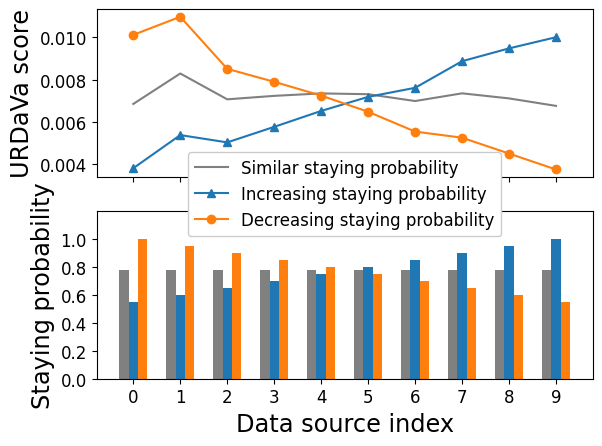

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import os

average_staying_probabilities = sum((1 - 0.05 * i) for i in range(10)) / 10
uniform_staying_probabilities = [average_staying_probabilities for i in range(10)]
decreasing_staying_probabilities = [(1 - 0.05 * i) for i in range(10)]
increasing_staying_probabilities = decreasing_staying_probabilities.copy()
increasing_staying_probabilities.reverse()

NUM_OF_DATA_SOURCES = 10
average_uniform_values = {0: 0.006851602746037633, 1: 0.008291526506894173, 2: 0.007070033572039936, 3: 0.007234083819742884, 4: 0.007350003509617485, 5: 0.007312049909696388, 6: 0.006989278813948052, 7: 0.007353697306664393, 8: 0.007113756680305276, 9: 0.006759693967415155}
average_increasing_values = {0: 0.0038118000072541987, 1: 0.005379321208888613, 2: 0.005032918327324238, 3: 0.005767955327360216, 4: 0.006520816557451673, 5: 0.007186514021942671, 6: 0.007614891215014672, 7: 0.008873540043728052, 8: 0.009480077786445858, 9: 0.010008446526936388}
average_decreasing_values = {0: 0.010118212765423906, 1: 0.010975628534644866, 2: 0.008511382621773042, 3: 0.007898469005672282, 4: 0.007247068738213213, 5: 0.006481896338969629, 6: 0.005544114789372051, 7: 0.005254553091874988, 8: 0.004504117927182122, 9: 0.003751369670199731}


fig, ax = plt.subplots(2, sharex=True)
line, = ax[0].plot(average_uniform_values.values(), color="grey")
line.set_label("Similar staying probability")
increasing_line, = ax[0].plot(average_increasing_values.values(), marker="^", color="C0")
increasing_line.set_label("Increasing staying probability")
decreasing_line, = ax[0].plot(average_decreasing_values.values(), marker="o", color="C1")
decreasing_line.set_label("Decreasing staying probability") 
ax[0].legend(loc="lower center", fontsize="large", bbox_to_anchor=(0.5,-0.4), facecolor='white', framealpha=1)
# ax[0].set_title(rf"Line Graph of URDV Scores for Each Data Source [$n=${NUM_OF_DATA_SOURCES}]")
ax[0].set_xticks(ticks=list(range(NUM_OF_DATA_SOURCES)))
ax[0].set_ylabel("URDaVa score", fontsize='xx-large')
# ax[0].set_ylim(top=0.11, bottom=0.04)
ax[1].set_xlabel("Data source index", fontsize='xx-large')
ax[1].set_ylabel("Staying probability", fontsize='xx-large')
width = 0.2
multiplier = 0
x = np.arange(NUM_OF_DATA_SOURCES)
all_probabilities = [uniform_staying_probabilities, increasing_staying_probabilities, decreasing_staying_probabilities]
for i in range(len(all_probabilities)):
    offset = width * multiplier
    ax[1].bar(x + offset - width, all_probabilities[i], width, color=["grey", "C0", "C1"][i])
    multiplier += 1
ax[1].set_ylim(top=1.2)
ax[1].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

ax[0].tick_params(axis='both', labelsize='large')
ax[1].tick_params(axis='both', labelsize='large')
ax[0].set_zorder(ax[1].get_zorder()+1)

plt.show()
PATH_TO_IMAGES = "./images/data_source_ranking/"
if not os.path.isdir(PATH_TO_IMAGES):
    os.makedirs(PATH_TO_IMAGES)
fig.savefig(os.path.join(PATH_TO_IMAGES, "staying_probability_10_banzhaf.png"), dpi=300, bbox_inches='tight')

In [27]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from urdava.coalition_probability import IndependentCoalitionProbability
from urdava.data_source import generate_random_data_sources, add_classification_noise
from urdava.data_valuation import ValuableModel
from urdava.dataset import load_dataset
from urdava.model_utility import IClassificationModel, model_linear_svm

# Add logs
import logging
import sys
logger = logging.getLogger()
formatter = logging.Formatter('%(asctime)s - %(lineno)s - %(levelname)s - %(message)s')
logger.setLevel(logging.DEBUG)

fhandler = logging.FileHandler(filename='main2.log', mode='w')
fhandler.setFormatter(formatter)
fhandler.setLevel(logging.INFO)
logger.addHandler(fhandler)

consoleHandler = logging.StreamHandler(sys.stdout)
consoleHandler.setFormatter(formatter)
consoleHandler.setLevel(logging.DEBUG)
logger.addHandler(consoleHandler)

logger.info("Program has started.")


X, y = load_dataset('diabetes')

NUM_OF_DATA_SOURCES = 10
support_set = tuple(range(NUM_OF_DATA_SOURCES))

average_staying_probabilities = sum((1 - 0.05 * i) for i in range(10)) / 10
uniform_staying_probabilities = [average_staying_probabilities for i in range(10)]
decreasing_staying_probabilities = [(1 - 0.05 * i) for i in range(10)]
increasing_staying_probabilities = decreasing_staying_probabilities.copy()
increasing_staying_probabilities.reverse()

uniform_staying_probabilities = {i:uniform_staying_probabilities[i] for i in range(NUM_OF_DATA_SOURCES)}
decreasing_staying_probabilities = {i:decreasing_staying_probabilities[i] for i in range(NUM_OF_DATA_SOURCES)}
increasing_staying_probabilities = {i:increasing_staying_probabilities[i] for i in range(NUM_OF_DATA_SOURCES)}

coalition_probability = IndependentCoalitionProbability(uniform_staying_probabilities)
decreasing_coalition_probability = IndependentCoalitionProbability(decreasing_staying_probabilities)
increasing_coalition_probability = IndependentCoalitionProbability(increasing_staying_probabilities)

average_uniform_values = {}
average_increasing_values = {}
average_decreasing_values = {}

model = model_linear_svm

# repeat for N times to ensure even split of data
N = 100
for n_iter in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    data_sources = generate_random_data_sources(X_train, y_train, 
                                                num_of_data_sources=NUM_OF_DATA_SOURCES)

    model_utility_function = IClassificationModel(model, data_sources, X_test, y_test)
    valuable_model = ValuableModel(support_set, model_utility_function)
    values = valuable_model.valuate(data_valuation_function="robust beta", 
                                    coalition_probability=coalition_probability, alpha=16, beta=4)

    for i in values:
        if average_uniform_values.get(i, 0) == 0:
            average_uniform_values[i] = []
        average_uniform_values[i].append(values[i])

    increasing_values = valuable_model.valuate(data_valuation_function="robust beta", 
                                               coalition_probability=increasing_coalition_probability, alpha=16, beta=4)
    for i in increasing_values:
        if average_increasing_values.get(i, 0) == 0:
            average_increasing_values[i] = []
        average_increasing_values[i].append(increasing_values[i])
        
    decreasing_values = valuable_model.valuate(data_valuation_function="robust beta", 
                                               coalition_probability=decreasing_coalition_probability, alpha=16, beta=4)
    for i in decreasing_values:
        if average_decreasing_values.get(i, 0) == 0:
            average_decreasing_values[i] = []
        average_decreasing_values[i].append(decreasing_values[i])
        
    logger.info(f"Iteration {n_iter} has completed.")

# get average
for i in average_uniform_values:
    average_uniform_values[i] = sum(list(sorted(average_uniform_values[i]))[25:75]) / 50
    average_increasing_values[i] = sum(list(sorted(average_increasing_values[i]))[25:75]) / 50
    average_decreasing_values[i] = sum(list(sorted(average_decreasing_values[i]))[25:75]) / 50
    
logger.info(f"=====> Average uniform values: {str(average_uniform_values)}")
logger.info(f"=====> Average increasing values: {str(average_increasing_values)}")
logger.info(f"=====> Average decreasing values: {str(average_decreasing_values)}")

2023-05-05 02:26:15,682 - 26 - INFO - Program has started.
2023-05-05 02:26:15,682 - 26 - INFO - Program has started.
2023-05-05 02:26:15,682 - 26 - INFO - Program has started.
2023-05-05 02:26:15,682 - 26 - INFO - Program has started.
2023-05-05 02:26:32,882 - 86 - INFO - Iteration 0 has completed.
2023-05-05 02:26:32,882 - 86 - INFO - Iteration 0 has completed.
2023-05-05 02:26:32,882 - 86 - INFO - Iteration 0 has completed.
2023-05-05 02:26:32,882 - 86 - INFO - Iteration 0 has completed.
2023-05-05 02:26:46,207 - 86 - INFO - Iteration 1 has completed.
2023-05-05 02:26:46,207 - 86 - INFO - Iteration 1 has completed.
2023-05-05 02:26:46,207 - 86 - INFO - Iteration 1 has completed.
2023-05-05 02:26:46,207 - 86 - INFO - Iteration 1 has completed.
2023-05-05 02:27:00,287 - 86 - INFO - Iteration 2 has completed.
2023-05-05 02:27:00,287 - 86 - INFO - Iteration 2 has completed.
2023-05-05 02:27:00,287 - 86 - INFO - Iteration 2 has completed.
2023-05-05 02:27:00,287 - 86 - INFO - Iteration 2

2023-05-05 02:34:32,074 - 86 - INFO - Iteration 30 has completed.
2023-05-05 02:34:32,074 - 86 - INFO - Iteration 30 has completed.
2023-05-05 02:34:48,726 - 86 - INFO - Iteration 31 has completed.
2023-05-05 02:34:48,726 - 86 - INFO - Iteration 31 has completed.
2023-05-05 02:34:48,726 - 86 - INFO - Iteration 31 has completed.
2023-05-05 02:34:48,726 - 86 - INFO - Iteration 31 has completed.
2023-05-05 02:35:06,091 - 86 - INFO - Iteration 32 has completed.
2023-05-05 02:35:06,091 - 86 - INFO - Iteration 32 has completed.
2023-05-05 02:35:06,091 - 86 - INFO - Iteration 32 has completed.
2023-05-05 02:35:06,091 - 86 - INFO - Iteration 32 has completed.
2023-05-05 02:35:23,253 - 86 - INFO - Iteration 33 has completed.
2023-05-05 02:35:23,253 - 86 - INFO - Iteration 33 has completed.
2023-05-05 02:35:23,253 - 86 - INFO - Iteration 33 has completed.
2023-05-05 02:35:23,253 - 86 - INFO - Iteration 33 has completed.
2023-05-05 02:35:40,167 - 86 - INFO - Iteration 34 has completed.
2023-05-05

2023-05-05 02:42:45,650 - 86 - INFO - Iteration 61 has completed.
2023-05-05 02:43:01,793 - 86 - INFO - Iteration 62 has completed.
2023-05-05 02:43:01,793 - 86 - INFO - Iteration 62 has completed.
2023-05-05 02:43:01,793 - 86 - INFO - Iteration 62 has completed.
2023-05-05 02:43:01,793 - 86 - INFO - Iteration 62 has completed.
2023-05-05 02:43:15,864 - 86 - INFO - Iteration 63 has completed.
2023-05-05 02:43:15,864 - 86 - INFO - Iteration 63 has completed.
2023-05-05 02:43:15,864 - 86 - INFO - Iteration 63 has completed.
2023-05-05 02:43:15,864 - 86 - INFO - Iteration 63 has completed.
2023-05-05 02:43:31,449 - 86 - INFO - Iteration 64 has completed.
2023-05-05 02:43:31,449 - 86 - INFO - Iteration 64 has completed.
2023-05-05 02:43:31,449 - 86 - INFO - Iteration 64 has completed.
2023-05-05 02:43:31,449 - 86 - INFO - Iteration 64 has completed.
2023-05-05 02:43:48,230 - 86 - INFO - Iteration 65 has completed.
2023-05-05 02:43:48,230 - 86 - INFO - Iteration 65 has completed.
2023-05-05

2023-05-05 02:51:07,334 - 86 - INFO - Iteration 93 has completed.
2023-05-05 02:51:07,334 - 86 - INFO - Iteration 93 has completed.
2023-05-05 02:51:07,334 - 86 - INFO - Iteration 93 has completed.
2023-05-05 02:51:07,334 - 86 - INFO - Iteration 93 has completed.
2023-05-05 02:51:20,008 - 86 - INFO - Iteration 94 has completed.
2023-05-05 02:51:20,008 - 86 - INFO - Iteration 94 has completed.
2023-05-05 02:51:20,008 - 86 - INFO - Iteration 94 has completed.
2023-05-05 02:51:20,008 - 86 - INFO - Iteration 94 has completed.
2023-05-05 02:51:36,807 - 86 - INFO - Iteration 95 has completed.
2023-05-05 02:51:36,807 - 86 - INFO - Iteration 95 has completed.
2023-05-05 02:51:36,807 - 86 - INFO - Iteration 95 has completed.
2023-05-05 02:51:36,807 - 86 - INFO - Iteration 95 has completed.
2023-05-05 02:51:53,184 - 86 - INFO - Iteration 96 has completed.
2023-05-05 02:51:53,184 - 86 - INFO - Iteration 96 has completed.
2023-05-05 02:51:53,184 - 86 - INFO - Iteration 96 has completed.
2023-05-05

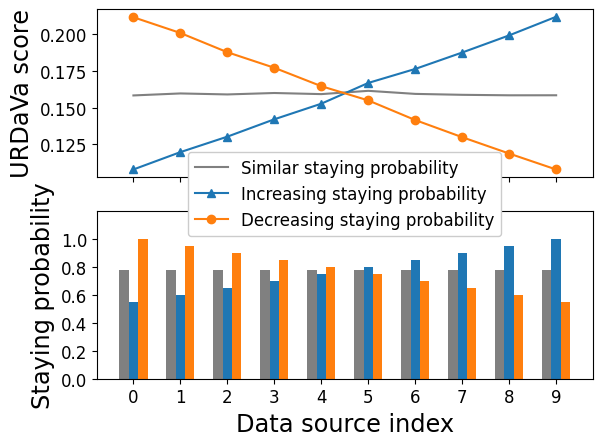

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import os

average_staying_probabilities = sum((1 - 0.05 * i) for i in range(10)) / 10
uniform_staying_probabilities = [average_staying_probabilities for i in range(10)]
decreasing_staying_probabilities = [(1 - 0.05 * i) for i in range(10)]
increasing_staying_probabilities = decreasing_staying_probabilities.copy()
increasing_staying_probabilities.reverse()

NUM_OF_DATA_SOURCES = 10
average_uniform_values = {0: 0.15838587489835235, 1: 0.15974306206807776, 2: 0.1590676019451015, 3: 0.16003900176908561, 4: 0.15928609578193664, 5: 0.16152429096625176, 6: 0.1594379554197136, 7: 0.15880666210333141, 8: 0.15847723537193598, 9: 0.15850083238572185}
average_increasing_values = {0: 0.10798706977321185, 1: 0.11979550798488475, 2: 0.1303260642939437, 3: 0.14214391589503989, 4: 0.1527623471553569, 5: 0.16689956132162506, 6: 0.17642261911895943, 7: 0.18760865834631235, 8: 0.19927407498884064, 9: 0.21194710648509485}
average_decreasing_values = {0: 0.21161762172286355, 1: 0.20089423951701818, 2: 0.18780470637798788, 3: 0.17720612023010227, 4: 0.1646888567462022, 5: 0.15499993440110893, 6: 0.14162578455031644, 7: 0.1299610563362821, 8: 0.11882452546150152, 9: 0.10797338539280994}


fig, ax = plt.subplots(2, sharex=True)
line, = ax[0].plot(average_uniform_values.values(), color="grey")
line.set_label("Similar staying probability")
increasing_line, = ax[0].plot(average_increasing_values.values(), marker="^", color="C0")
increasing_line.set_label("Increasing staying probability")
decreasing_line, = ax[0].plot(average_decreasing_values.values(), marker="o", color="C1")
decreasing_line.set_label("Decreasing staying probability") 
ax[0].legend(loc="lower center", fontsize="large", bbox_to_anchor=(0.5,-0.4), facecolor='white', framealpha=1)
# ax[0].set_title(rf"Line Graph of URDV Scores for Each Data Source [$n=${NUM_OF_DATA_SOURCES}]")
ax[0].set_xticks(ticks=list(range(NUM_OF_DATA_SOURCES)))
ax[0].set_ylabel("URDaVa score", fontsize='xx-large')
# ax[0].set_ylim(top=0.11, bottom=0.04)
ax[1].set_xlabel("Data source index", fontsize='xx-large')
ax[1].set_ylabel("Staying probability", fontsize='xx-large')
width = 0.2
multiplier = 0
x = np.arange(NUM_OF_DATA_SOURCES)
all_probabilities = [uniform_staying_probabilities, increasing_staying_probabilities, decreasing_staying_probabilities]
for i in range(len(all_probabilities)):
    offset = width * multiplier
    ax[1].bar(x + offset - width, all_probabilities[i], width, color=["grey", "C0", "C1"][i])
    multiplier += 1
ax[1].set_ylim(top=1.2)
ax[1].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

ax[0].tick_params(axis='both', labelsize='large')
ax[1].tick_params(axis='both', labelsize='large')
ax[0].set_zorder(ax[1].get_zorder()+1)

plt.show()
PATH_TO_IMAGES = "./images/data_source_ranking/"
if not os.path.isdir(PATH_TO_IMAGES):
    os.makedirs(PATH_TO_IMAGES)
fig.savefig(os.path.join(PATH_TO_IMAGES, "staying_probability_10_beta.png"), dpi=300, bbox_inches='tight')

In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from urdava.coalition_probability import IndependentCoalitionProbability
from urdava.data_source import generate_random_data_sources, add_classification_noise
from urdava.data_valuation import ValuableModel
from urdava.dataset import load_dataset
from urdava.model_utility import ISymmetricClassificationModel, ISymmetricExampleModel, model_knn, model_gaussian_nb, model_logistic_regression, model_ridge_classifier

# Add logs
import logging
import sys
logger = logging.getLogger()
formatter = logging.Formatter('%(asctime)s - %(lineno)s - %(levelname)s - %(message)s')
logger.setLevel(logging.DEBUG)

fhandler = logging.FileHandler(filename='main.log', mode='w')
fhandler.setFormatter(formatter)
fhandler.setLevel(logging.INFO)
logger.addHandler(fhandler)

consoleHandler = logging.StreamHandler(sys.stdout)
consoleHandler.setFormatter(formatter)
consoleHandler.setLevel(logging.DEBUG)
logger.addHandler(consoleHandler)

logger.info("Program has started.")


X, y = load_dataset('credit card')

NUM_OF_DATA_SOURCES = 20
support_set = tuple(range(NUM_OF_DATA_SOURCES))

average_staying_probabilities = sum((1 - 0.05 * i) for i in range(20)) / 20
uniform_staying_probabilities = [average_staying_probabilities for i in range(20)]
decreasing_staying_probabilities = [(1 - 0.05 * i) for i in range(20)]
increasing_staying_probabilities = decreasing_staying_probabilities.copy()
increasing_staying_probabilities.reverse()

uniform_staying_probabilities = {i:uniform_staying_probabilities[i] for i in range(NUM_OF_DATA_SOURCES)}
decreasing_staying_probabilities = {i:decreasing_staying_probabilities[i] for i in range(NUM_OF_DATA_SOURCES)}
increasing_staying_probabilities = {i:increasing_staying_probabilities[i] for i in range(NUM_OF_DATA_SOURCES)}

coalition_probability = IndependentCoalitionProbability(uniform_staying_probabilities)
decreasing_coalition_probability = IndependentCoalitionProbability(decreasing_staying_probabilities)
increasing_coalition_probability = IndependentCoalitionProbability(increasing_staying_probabilities)

average_uniform_values = {}
average_increasing_values = {}
average_decreasing_values = {}

model = model_ridge_classifier

# repeat for N times to ensure even split of data
N = 1
for n_iter in range(N):
    print(len(X))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    X_train = X_train[:150]
    y_train = y_train[:150]
    
    y_train = add_classification_noise(y_train, noise_level = 0.225)
    
    data_sources = generate_random_data_sources(X_train, y_train, 
                                                num_of_data_sources=NUM_OF_DATA_SOURCES)

    #model_utility_function = ISymmetricClassificationModel(model, data_sources, X_test, y_test)
    model_utility_function = ISymmetricExampleModel(data_sources)
    valuable_model = ValuableModel(support_set, model_utility_function)
    values = valuable_model.valuate(data_valuation_function="012-mcmc robust beta", 
                                    coalition_probability=coalition_probability, tolerance=1.00005, alpha=4, beta=16)
    
    for i in values:
        if average_uniform_values.get(i, 0) == 0:
            average_uniform_values[i] = []
        average_uniform_values[i].append(values[i])

    increasing_values = valuable_model.valuate(data_valuation_function="012-mcmc robust beta", 
                                               coalition_probability=increasing_coalition_probability, tolerance=1.00005, alpha=4, beta=16)
    for i in increasing_values:
        if average_increasing_values.get(i, 0) == 0:
            average_increasing_values[i] = []
        average_increasing_values[i].append(increasing_values[i])
        
    decreasing_values = valuable_model.valuate(data_valuation_function="012-mcmc robust beta", 
                                               coalition_probability=decreasing_coalition_probability, tolerance=1.00005, alpha=4, beta=16)
    for i in decreasing_values:
        if average_decreasing_values.get(i, 0) == 0:
            average_decreasing_values[i] = []
        average_decreasing_values[i].append(decreasing_values[i])
        
    logger.info(f"Iteration {n_iter} has completed.")

2023-05-07 19:18:46,444 - 26 - INFO - Program has started.
2023-05-07 19:18:46,444 - 26 - INFO - Program has started.
2023-05-07 19:18:46,444 - 26 - INFO - Program has started.
1000
{0: 0, 1: 0.05, 2: 0.1, 3: 0.15, 4: 0.2, 5: 0.25, 6: 0.3, 7: 0.35, 8: 0.4, 9: 0.45, 10: 0.5, 11: 0.55, 12: 0.6, 13: 0.65, 14: 0.7, 15: 0.75, 16: 0.8, 17: 0.85, 18: 0.9, 19: 0.95, 20: 1.0}
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 50 - Average convergence rate = 0.0
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 100 - Average convergence rate = 0.9811171321108001
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 150 - Average convergence rate = 0.9895640611518836
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 200 - Average convergence rate = 0.989841816979367
---------> Number of values that have not converged: 20
====

====> Monte-Carlo Round 3150 - Average convergence rate = 1.0002749049952668
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 3200 - Average convergence rate = 1.0001493639774715
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 3250 - Average convergence rate = 0.9999275416193981
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 3300 - Average convergence rate = 0.999056737409345
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 3350 - Average convergence rate = 0.9990899156782564
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 3400 - Average convergence rate = 0.9992411063743647
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 3450 - Average convergence rate = 0.9993346150952084
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 3500 - Average convergence rate = 0.9996171182

====> Monte-Carlo Round 6500 - Average convergence rate = 0.9993076860285557
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 6550 - Average convergence rate = 0.9994493284257391
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 6600 - Average convergence rate = 0.999503113863671
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 6650 - Average convergence rate = 0.9997973256478376
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 6700 - Average convergence rate = 0.9998763313299011
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 6750 - Average convergence rate = 1.0000193863865903
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 6800 - Average convergence rate = 0.9996551990303473
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 6850 - Average convergence rate = 1.0000063114

====> Monte-Carlo Round 9600 - Average convergence rate = 0.999673397830178
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 9650 - Average convergence rate = 0.9996809518931269
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 9700 - Average convergence rate = 0.9996777331003189
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 9750 - Average convergence rate = 0.9996279000555939
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 9800 - Average convergence rate = 0.9996175620235441
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 9850 - Average convergence rate = 0.999632015947306
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 9900 - Average convergence rate = 0.9996567359296471
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 9950 - Average convergence rate = 0.99996204364

====> Monte-Carlo Round 12850 - Average convergence rate = 0.999826843594396
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 12900 - Average convergence rate = 0.9998226527909606
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 12950 - Average convergence rate = 0.9998031360426302
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 13000 - Average convergence rate = 0.9997983516367445
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 13050 - Average convergence rate = 0.9998116380289913
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 13100 - Average convergence rate = 0.999832329896339
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 13150 - Average convergence rate = 0.9998242948789757
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 13200 - Average convergence rate = 0.999

====> Monte-Carlo Round 16150 - Average convergence rate = 0.9997240089599512
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 16200 - Average convergence rate = 0.9997136470280055
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 16250 - Average convergence rate = 0.9997129969753222
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 16300 - Average convergence rate = 0.9997291204929128
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 16350 - Average convergence rate = 0.9997369610275637
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 16400 - Average convergence rate = 0.9996963538609519
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 16450 - Average convergence rate = 0.9997034045425208
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 16500 - Average convergence rate = 0.9

====> Monte-Carlo Round 19500 - Average convergence rate = 0.9999008845997309
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 19550 - Average convergence rate = 0.9998853694931572
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 19600 - Average convergence rate = 0.999884552272609
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 19650 - Average convergence rate = 0.9998577275668719
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 19700 - Average convergence rate = 0.9998600835381213
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 19750 - Average convergence rate = 0.9999972734340596
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 19800 - Average convergence rate = 0.9999730644714138
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 19850 - Average convergence rate = 0.99

====> Monte-Carlo Round 22850 - Average convergence rate = 0.9998883913079835
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 22900 - Average convergence rate = 0.9998647335758768
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 22950 - Average convergence rate = 0.9998777103466535
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 23000 - Average convergence rate = 0.9998728965886603
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 23050 - Average convergence rate = 0.9998887610026171
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 23100 - Average convergence rate = 0.9998833034617185
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 23150 - Average convergence rate = 0.9999657424410335
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 23200 - Average convergence rate = 0.9

====> Monte-Carlo Round 26150 - Average convergence rate = 0.999988691389596
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 26200 - Average convergence rate = 0.9999896499092336
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 26250 - Average convergence rate = 0.9999879213683153
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 26300 - Average convergence rate = 0.9999866972340365
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 26350 - Average convergence rate = 1.000069223726988
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 26400 - Average convergence rate = 1.000064285184743
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 26450 - Average convergence rate = 1.000030746098161
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 26500 - Average convergence rate = 1.00001

====> Monte-Carlo Round 29400 - Average convergence rate = 0.9999954411269295
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 29450 - Average convergence rate = 0.9999964414139797
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 29500 - Average convergence rate = 0.9999981126093236
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 29550 - Average convergence rate = 0.9999979727615415
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 29600 - Average convergence rate = 0.9999975516905968
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 29650 - Average convergence rate = 0.9999966321584486
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 29700 - Average convergence rate = 0.9999980181997785
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 29750 - Average convergence rate = 0.999976

====> Monte-Carlo Round 32650 - Average convergence rate = 0.9999579111276862
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 32700 - Average convergence rate = 0.9999569162954268
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 32750 - Average convergence rate = 0.9999582176519624
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 32800 - Average convergence rate = 0.9999619336830238
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 32850 - Average convergence rate = 0.9999584723702319
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 32900 - Average convergence rate = 0.9999646221651075
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 32950 - Average convergence rate = 0.9999825323441611
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 33000 - Average convergence rate = 0.9

====> Monte-Carlo Round 35850 - Average convergence rate = 1.0000887353124535
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 35900 - Average convergence rate = 1.0000812268584427
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 35950 - Average convergence rate = 1.0000853806842
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 36000 - Average convergence rate = 1.000087552406427
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 36050 - Average convergence rate = 1.0000876302965056
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 36100 - Average convergence rate = 1.0000902546595918
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 36150 - Average convergence rate = 1.0000851962858213
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 36200 - Average convergence rate = 1.00007

====> Monte-Carlo Round 39050 - Average convergence rate = 1.000007451239195
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 39100 - Average convergence rate = 1.0000065760441792
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 39150 - Average convergence rate = 1.0000087292858804
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 39200 - Average convergence rate = 1.0000196921736455
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 39250 - Average convergence rate = 1.000019330181672
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 39300 - Average convergence rate = 1.0000145716037416
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 39350 - Average convergence rate = 1.0000230360749582
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 39400 - Average convergence rate = 1.000

====> Monte-Carlo Round 42150 - Average convergence rate = 0.9999891579669645
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 42200 - Average convergence rate = 0.9999903353625225
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 42250 - Average convergence rate = 0.9999827367273355
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 42300 - Average convergence rate = 0.9999843573280197
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 42350 - Average convergence rate = 0.9999824105228413
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 42400 - Average convergence rate = 0.99998629181314
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 42450 - Average convergence rate = 0.9999857634829009
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 42500 - Average convergence rate = 0.999989

====> Monte-Carlo Round 45300 - Average convergence rate = 1.0000261229502034
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 45350 - Average convergence rate = 1.0000307376955269
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 45400 - Average convergence rate = 1.0000234050559065
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 45450 - Average convergence rate = 1.0000323096183596
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 45500 - Average convergence rate = 1.0000287356882225
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 45550 - Average convergence rate = 1.0000028768401585
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 45600 - Average convergence rate = 1.0000055217331658
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 45650 - Average convergence rate = 0.99

====> Monte-Carlo Round 48450 - Average convergence rate = 0.9999598869658233
---------> Number of values that have not converged: 6
====> Monte-Carlo Round 48500 - Average convergence rate = 0.9999613900985341
---------> Number of values that have not converged: 7
====> Monte-Carlo Round 48550 - Average convergence rate = 0.9999600720320476
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 48600 - Average convergence rate = 0.999968336654707
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 48650 - Average convergence rate = 0.9999671927310103
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 48700 - Average convergence rate = 0.9999633709934391
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 48750 - Average convergence rate = 0.9999727411271353
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 48800 - Average convergence rate = 1.00002196

====> Monte-Carlo Round 51600 - Average convergence rate = 1.0000315320324666
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 51650 - Average convergence rate = 1.000031021445377
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 51700 - Average convergence rate = 1.0000279101213931
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 51750 - Average convergence rate = 1.0000149122829856
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 51800 - Average convergence rate = 1.0000106679752128
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 51850 - Average convergence rate = 0.9999885866873583
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 51900 - Average convergence rate = 0.9999809383444159
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 51950 - Average convergence rate = 0.999

====> Monte-Carlo Round 54750 - Average convergence rate = 0.999980522317532
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 54800 - Average convergence rate = 0.9999778318299363
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 54850 - Average convergence rate = 0.9999807399906231
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 54900 - Average convergence rate = 1.0000366707909654
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 54950 - Average convergence rate = 1.0000334676935947
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 55000 - Average convergence rate = 1.0000250312712873
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 55050 - Average convergence rate = 1.000025230844354
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 55100 - Average convergence rate = 1.00000

====> Monte-Carlo Round 57900 - Average convergence rate = 0.9999531696299447
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 57950 - Average convergence rate = 0.9999542476781395
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 58000 - Average convergence rate = 0.9999567543040406
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 58050 - Average convergence rate = 0.9999558911222103
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 58100 - Average convergence rate = 0.9999570599586942
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 58150 - Average convergence rate = 0.9999529983480823
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 58200 - Average convergence rate = 0.9999497705551038
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 58250 - Average convergence rate = 0.99994923

====> Monte-Carlo Round 61000 - Average convergence rate = 1.000004725798848
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 61050 - Average convergence rate = 1.000005973917896
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 61100 - Average convergence rate = 1.000005680540051
---------> Number of values that have not converged: 6
====> Monte-Carlo Round 61150 - Average convergence rate = 1.0000061450601456
---------> Number of values that have not converged: 6
====> Monte-Carlo Round 61200 - Average convergence rate = 1.0000064145516514
---------> Number of values that have not converged: 6
====> Monte-Carlo Round 61250 - Average convergence rate = 1.0000090260185808
---------> Number of values that have not converged: 6
====> Monte-Carlo Round 61300 - Average convergence rate = 1.0000087741062695
---------> Number of values that have not converged: 6
====> Monte-Carlo Round 61350 - Average convergence rate = 0.99997675113

====> Monte-Carlo Round 64100 - Average convergence rate = 1.000019060541136
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 64150 - Average convergence rate = 1.0000163147835728
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 64200 - Average convergence rate = 1.0000218997100914
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 64250 - Average convergence rate = 1.0000219423937318
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 64300 - Average convergence rate = 1.0000179089136116
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 64350 - Average convergence rate = 1.0000136899896
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 64400 - Average convergence rate = 1.0000127918529829
---------> Number of values that have not converged: 7
====> Monte-Carlo Round 64450 - Average convergence rate = 1.000013754516

====> Monte-Carlo Round 67200 - Average convergence rate = 0.9999390138194455
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 67250 - Average convergence rate = 0.9999374637715339
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 67300 - Average convergence rate = 0.9999381710795298
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 67350 - Average convergence rate = 0.9999412908397293
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 67400 - Average convergence rate = 0.9999406945940612
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 67450 - Average convergence rate = 0.9999437994416596
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 67500 - Average convergence rate = 0.9999462726108668
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 67550 - Average convergence rate = 0.9

====> Monte-Carlo Round 70300 - Average convergence rate = 0.9999591961315575
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 70350 - Average convergence rate = 0.9999587117152353
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 70400 - Average convergence rate = 0.9999611311314146
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 70450 - Average convergence rate = 0.9999586817644692
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 70500 - Average convergence rate = 0.9999595250281341
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 70550 - Average convergence rate = 0.9999671376702244
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 70600 - Average convergence rate = 0.9999682493371743
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 70650 - Average convergence rate = 0.9999

====> Monte-Carlo Round 73400 - Average convergence rate = 1.0000718709048289
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 73450 - Average convergence rate = 1.0000719706351828
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 73500 - Average convergence rate = 1.0000685563097385
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 73550 - Average convergence rate = 1.0000635530693367
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 73600 - Average convergence rate = 1.0000669372448205
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 73650 - Average convergence rate = 1.0000616039945704
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 73700 - Average convergence rate = 1.0000607771452983
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 73750 - Average convergence rate = 1.0

====> Monte-Carlo Round 76500 - Average convergence rate = 0.9999905013125865
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 76550 - Average convergence rate = 0.9999891599300522
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 76600 - Average convergence rate = 0.9999872593417466
---------> Number of values that have not converged: 6
====> Monte-Carlo Round 76650 - Average convergence rate = 0.999990108493909
---------> Number of values that have not converged: 6
====> Monte-Carlo Round 76700 - Average convergence rate = 0.9999854387263044
---------> Number of values that have not converged: 6
====> Monte-Carlo Round 76750 - Average convergence rate = 0.9999868561245
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 76800 - Average convergence rate = 0.9999868621784627
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 76850 - Average convergence rate = 0.999986131164

====> Monte-Carlo Round 79600 - Average convergence rate = 1.0000102987163724
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 79650 - Average convergence rate = 1.0000119307137758
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 79700 - Average convergence rate = 1.0000052588064259
---------> Number of values that have not converged: 7
====> Monte-Carlo Round 79750 - Average convergence rate = 1.0000070755039563
---------> Number of values that have not converged: 7
====> Monte-Carlo Round 79800 - Average convergence rate = 1.0000019100196944
---------> Number of values that have not converged: 7
====> Monte-Carlo Round 79850 - Average convergence rate = 1.000004076835768
---------> Number of values that have not converged: 7
====> Monte-Carlo Round 79900 - Average convergence rate = 1.0000052416274616
---------> Number of values that have not converged: 7
====> Monte-Carlo Round 79950 - Average convergence rate = 1.000000196

====> Monte-Carlo Round 82700 - Average convergence rate = 1.000022884701648
---------> Number of values that have not converged: 6
====> Monte-Carlo Round 82750 - Average convergence rate = 1.0000235429599895
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 82800 - Average convergence rate = 1.0000206907500941
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 82850 - Average convergence rate = 1.0000210979218118
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 82900 - Average convergence rate = 1.0000194097761688
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 82950 - Average convergence rate = 1.0000221935054028
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 83000 - Average convergence rate = 1.00002428401025
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 83050 - Average convergence rate = 1.00001864052

====> Monte-Carlo Round 85800 - Average convergence rate = 0.9999682246175585
---------> Number of values that have not converged: 7
====> Monte-Carlo Round 85850 - Average convergence rate = 0.9999704361339024
---------> Number of values that have not converged: 7
====> Monte-Carlo Round 85900 - Average convergence rate = 0.999971834808991
---------> Number of values that have not converged: 6
====> Monte-Carlo Round 85950 - Average convergence rate = 0.9999746628599991
---------> Number of values that have not converged: 6
====> Monte-Carlo Round 86000 - Average convergence rate = 0.9999729750391451
---------> Number of values that have not converged: 6
====> Monte-Carlo Round 86050 - Average convergence rate = 0.9999756675361994
---------> Number of values that have not converged: 6
====> Monte-Carlo Round 86100 - Average convergence rate = 0.9999751810204602
---------> Number of values that have not converged: 6
====> Monte-Carlo Round 86150 - Average convergence rate = 0.999975730

====> Monte-Carlo Round 88900 - Average convergence rate = 0.9999745449485257
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 88950 - Average convergence rate = 0.9999776186983563
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 89000 - Average convergence rate = 0.9999770490328703
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 89050 - Average convergence rate = 0.9999769398048297
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 89100 - Average convergence rate = 0.9999824105126391
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 89150 - Average convergence rate = 0.9999815166267915
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 89200 - Average convergence rate = 0.9999837804964986
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 89250 - Average convergence rate = 0.99998842

====> Monte-Carlo Round 92000 - Average convergence rate = 0.9999938256573564
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 92050 - Average convergence rate = 0.9999942772811587
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 92100 - Average convergence rate = 0.9999975899446921
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 92150 - Average convergence rate = 0.9999946932032227
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 92200 - Average convergence rate = 0.9999945022544162
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 92250 - Average convergence rate = 1.0000016312978683
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 92300 - Average convergence rate = 1.000003419305216
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 92350 - Average convergence rate = 1.000000760

====> Monte-Carlo Round 95100 - Average convergence rate = 1.0000179262594364
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 95150 - Average convergence rate = 1.0000193967047593
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 95200 - Average convergence rate = 0.999992973817674
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 95250 - Average convergence rate = 0.9999979174815407
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 95300 - Average convergence rate = 0.9999989447924982
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 95350 - Average convergence rate = 0.9999962512994308
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 95400 - Average convergence rate = 0.9999996383955297
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 95450 - Average convergence rate = 1.000003285

====> Monte-Carlo Round 98200 - Average convergence rate = 0.9999757787767078
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 98250 - Average convergence rate = 0.999972717144121
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 98300 - Average convergence rate = 0.9999726308335891
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 98350 - Average convergence rate = 0.9999727359936891
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 98400 - Average convergence rate = 0.9999716769810201
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 98450 - Average convergence rate = 0.9999709431437536
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 98500 - Average convergence rate = 0.9999696281324445
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 98550 - Average convergence rate = 0.999969675

====> Monte-Carlo Round 101300 - Average convergence rate = 0.9999780407852515
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 101350 - Average convergence rate = 0.999981727984659
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 101400 - Average convergence rate = 0.9999831150274968
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 101450 - Average convergence rate = 0.9999826922533284
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 101500 - Average convergence rate = 0.9999824090818684
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 101550 - Average convergence rate = 1.0000014850053867
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 101600 - Average convergence rate = 1.0000003388498948
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 101650 - Average convergence rate = 0.9

====> Monte-Carlo Round 104400 - Average convergence rate = 0.9999952630352856
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 104450 - Average convergence rate = 0.9999961509842512
---------> Number of values that have not converged: 6
====> Monte-Carlo Round 104500 - Average convergence rate = 0.9999961836403767
---------> Number of values that have not converged: 6
====> Monte-Carlo Round 104550 - Average convergence rate = 0.999996799744971
---------> Number of values that have not converged: 6
====> Monte-Carlo Round 104600 - Average convergence rate = 0.9999958882916735
---------> Number of values that have not converged: 6
====> Monte-Carlo Round 104650 - Average convergence rate = 0.9999968215704854
---------> Number of values that have not converged: 6
====> Monte-Carlo Round 104700 - Average convergence rate = 1.000000380154677
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 104750 - Average convergence rate = 1.00

====> Monte-Carlo Round 107500 - Average convergence rate = 1.000022143423136
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 107550 - Average convergence rate = 1.0000227745250174
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 107600 - Average convergence rate = 1.0000239583710167
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 107650 - Average convergence rate = 1.0000257720335501
---------> Number of values that have not converged: 6
====> Monte-Carlo Round 107700 - Average convergence rate = 1.0000287663348557
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 107750 - Average convergence rate = 1.0000300919793046
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 107800 - Average convergence rate = 1.0000271802283667
---------> Number of values that have not converged: 7
====> Monte-Carlo Round 107850 - Average convergence rate = 1.0

====> Monte-Carlo Round 110600 - Average convergence rate = 1.0000189797345942
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 110650 - Average convergence rate = 1.0000186312366257
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 110700 - Average convergence rate = 1.0000207999152213
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 110750 - Average convergence rate = 1.0000133974251384
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 110800 - Average convergence rate = 1.000012473298665
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 110850 - Average convergence rate = 1.0000136429979958
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 0 - Average convergence rate = 0.0
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 50 - Average convergence rate = 0.0
---------> Number of v

====> Monte-Carlo Round 2950 - Average convergence rate = 0.999751838277904
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 3000 - Average convergence rate = 0.9997155138206381
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 3050 - Average convergence rate = 0.9996233180283222
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 3100 - Average convergence rate = 0.9994706805274944
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 3150 - Average convergence rate = 0.9995547134093169
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 3200 - Average convergence rate = 0.9995658060014339
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 3250 - Average convergence rate = 0.9995741262611864
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 3300 - Average convergence rate = 0.9997355487

====> Monte-Carlo Round 6100 - Average convergence rate = 1.0007916566510784
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 6150 - Average convergence rate = 1.000785767010117
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 6200 - Average convergence rate = 1.0008080084028768
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 6250 - Average convergence rate = 1.0007942916130048
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 6300 - Average convergence rate = 1.0007795922551648
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 6350 - Average convergence rate = 0.9997883774755479
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 6400 - Average convergence rate = 0.9998049982078466
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 6450 - Average convergence rate = 0.9998117857

====> Monte-Carlo Round 9500 - Average convergence rate = 0.9998119856886347
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 9550 - Average convergence rate = 0.9998100093834857
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 9600 - Average convergence rate = 0.9998090299339044
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 9650 - Average convergence rate = 0.9998098427957045
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 9700 - Average convergence rate = 0.9998104431259668
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 9750 - Average convergence rate = 1.0003633961789844
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 9800 - Average convergence rate = 1.0003523973274315
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 9850 - Average convergence rate = 1.000349237

====> Monte-Carlo Round 12650 - Average convergence rate = 1.0000003760408729
---------> Number of values that have not converged: 6
====> Monte-Carlo Round 12700 - Average convergence rate = 0.9999963820366476
---------> Number of values that have not converged: 6
====> Monte-Carlo Round 12750 - Average convergence rate = 0.9999959666086571
---------> Number of values that have not converged: 6
====> Monte-Carlo Round 12800 - Average convergence rate = 1.0000080764175505
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 12850 - Average convergence rate = 1.0000078618243682
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 12900 - Average convergence rate = 1.0000011564290168
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 12950 - Average convergence rate = 0.9999968709335196
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 13000 - Average convergence rate = 1.00001984

====> Monte-Carlo Round 15850 - Average convergence rate = 0.9999311034133544
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 15900 - Average convergence rate = 0.9999372569028402
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 15950 - Average convergence rate = 0.9999406427388309
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 16000 - Average convergence rate = 0.999946323353526
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 16050 - Average convergence rate = 0.999949365213294
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 16100 - Average convergence rate = 0.9999486852113593
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 16150 - Average convergence rate = 0.9999486791936414
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 16200 - Average convergence rate = 0.999

====> Monte-Carlo Round 19000 - Average convergence rate = 0.9999127359049649
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 19050 - Average convergence rate = 0.9999131966208591
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 19100 - Average convergence rate = 0.9999143273345824
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 19150 - Average convergence rate = 0.9999143273018232
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 19200 - Average convergence rate = 0.9999176075876999
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 19250 - Average convergence rate = 0.9998524073781951
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 19300 - Average convergence rate = 0.9998616429099366
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 19350 - Average convergence rate = 0.9

====> Monte-Carlo Round 22250 - Average convergence rate = 0.9999618641450084
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 22300 - Average convergence rate = 0.9999643480368471
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 22350 - Average convergence rate = 0.9999637408354678
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 22400 - Average convergence rate = 0.9999634427843123
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 22450 - Average convergence rate = 0.9999354648912533
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 22500 - Average convergence rate = 0.9999341553198144
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 22550 - Average convergence rate = 0.999934501328924
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 22600 - Average convergence rate = 0.99

====> Monte-Carlo Round 25550 - Average convergence rate = 0.999981456901265
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 25600 - Average convergence rate = 0.9999810625788399
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 25650 - Average convergence rate = 0.9999811797083238
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 25700 - Average convergence rate = 0.9999809995077064
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 25750 - Average convergence rate = 0.9999851058051051
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 25800 - Average convergence rate = 0.9999841991148417
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 25850 - Average convergence rate = 0.9999835376221249
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 25900 - Average convergence rate = 0.99

====> Monte-Carlo Round 28650 - Average convergence rate = 0.9999038500781887
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 28700 - Average convergence rate = 0.9999034950690655
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 28750 - Average convergence rate = 0.9999045642322033
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 28800 - Average convergence rate = 0.9999047736873973
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 28850 - Average convergence rate = 0.9999049425623516
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 28900 - Average convergence rate = 0.9999043393784708
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 28950 - Average convergence rate = 0.9999050969452006
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 29000 - Average convergence rate = 0.9

====> Monte-Carlo Round 31850 - Average convergence rate = 0.9999619952795742
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 31900 - Average convergence rate = 0.9999621048596149
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 31950 - Average convergence rate = 0.9999623298880256
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 32000 - Average convergence rate = 0.9999646730736037
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 32050 - Average convergence rate = 0.999965028621031
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 32100 - Average convergence rate = 0.9999649680049506
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 32150 - Average convergence rate = 0.9999645340638226
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 32200 - Average convergence rate = 0.99

====> Monte-Carlo Round 35050 - Average convergence rate = 0.9999740023180419
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 35100 - Average convergence rate = 0.9999741016737953
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 35150 - Average convergence rate = 0.9999746255863377
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 35200 - Average convergence rate = 0.9999747075343308
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 35250 - Average convergence rate = 0.9999754366356184
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 35300 - Average convergence rate = 0.9999745424234083
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 35350 - Average convergence rate = 0.9999739911666492
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 35400 - Average convergence rate = 0.99997430

====> Monte-Carlo Round 38250 - Average convergence rate = 0.999977374708601
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 38300 - Average convergence rate = 0.9999780179375503
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 38350 - Average convergence rate = 0.9999799781630836
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 38400 - Average convergence rate = 0.9999801803576741
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 38450 - Average convergence rate = 0.9999802802102427
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 38500 - Average convergence rate = 0.9999800546336161
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 38550 - Average convergence rate = 0.9999799045284712
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 38600 - Average convergence rate = 0.999984261

====> Monte-Carlo Round 41400 - Average convergence rate = 1.000000481009953
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 41450 - Average convergence rate = 1.0000004603258152
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 41500 - Average convergence rate = 1.0000006207313443
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 41550 - Average convergence rate = 1.0000008186670253
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 41600 - Average convergence rate = 1.0000008134456047
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 41650 - Average convergence rate = 1.0000011012739558
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 41700 - Average convergence rate = 1.0000013735917948
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 41750 - Average convergence rate = 1.000000378

====> Monte-Carlo Round 44550 - Average convergence rate = 1.0000042161350924
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 44600 - Average convergence rate = 1.000003873623687
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 44650 - Average convergence rate = 1.000021426584912
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 44700 - Average convergence rate = 1.00002146382722
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 44750 - Average convergence rate = 1.0000218373805414
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 44800 - Average convergence rate = 1.0000189939823154
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 44850 - Average convergence rate = 1.0000190731789613
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 44900 - Average convergence rate = 1.000011343913

====> Monte-Carlo Round 47700 - Average convergence rate = 0.9999972145333078
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 47750 - Average convergence rate = 0.9999973244374365
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 47800 - Average convergence rate = 0.9999994217255475
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 47850 - Average convergence rate = 1.0000001176120104
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 47900 - Average convergence rate = 0.9999994345376744
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 47950 - Average convergence rate = 0.9999996563608755
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 48000 - Average convergence rate = 0.9999997002034702
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 48050 - Average convergence rate = 0.99999976

====> Monte-Carlo Round 50850 - Average convergence rate = 1.000107514764989
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 50900 - Average convergence rate = 1.0001078687396645
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 50950 - Average convergence rate = 1.0001076968441391
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 51000 - Average convergence rate = 1.0001078996417077
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 51050 - Average convergence rate = 1.000108264031621
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 51100 - Average convergence rate = 1.0001101101743464
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 51150 - Average convergence rate = 1.0001100059598427
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 51200 - Average convergence rate = 1.000

====> Monte-Carlo Round 54000 - Average convergence rate = 1.0001248640450775
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 54050 - Average convergence rate = 1.0001241551761573
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 54100 - Average convergence rate = 1.0001241517659571
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 54150 - Average convergence rate = 1.0001240567830623
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 54200 - Average convergence rate = 1.0001242027388586
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 54250 - Average convergence rate = 1.000103332939668
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 54300 - Average convergence rate = 1.00010321575329
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 54350 - Average convergence rate = 1.0001

====> Monte-Carlo Round 57100 - Average convergence rate = 0.9999992562807432
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 57150 - Average convergence rate = 0.9999986237506242
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 57200 - Average convergence rate = 0.9999987001068519
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 57250 - Average convergence rate = 0.9999988336328005
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 57300 - Average convergence rate = 0.9999987900192414
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 57350 - Average convergence rate = 0.9999989475498019
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 57400 - Average convergence rate = 0.9999989536374381
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 57450 - Average convergence rate = 0.99999955

====> Monte-Carlo Round 60200 - Average convergence rate = 0.9999960269926536
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 60250 - Average convergence rate = 0.9999959294936509
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 60300 - Average convergence rate = 0.9999954756728868
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 60350 - Average convergence rate = 0.99999456600993
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 60400 - Average convergence rate = 0.9999943445276133
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 60450 - Average convergence rate = 0.9999940987456698
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 60500 - Average convergence rate = 0.9999940118783476
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 60550 - Average convergence rate = 0.9999937331

====> Monte-Carlo Round 63300 - Average convergence rate = 0.9999973565171919
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 63350 - Average convergence rate = 0.9999974421410466
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 63400 - Average convergence rate = 0.9999976438503687
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 63450 - Average convergence rate = 0.9999974865905509
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 63500 - Average convergence rate = 0.9999974089537064
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 63550 - Average convergence rate = 0.9999974155110424
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 63600 - Average convergence rate = 0.9999977126868025
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 63650 - Average convergence rate = 0.99999757

====> Monte-Carlo Round 66400 - Average convergence rate = 0.9999919315822643
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 66450 - Average convergence rate = 0.9999917757248118
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 66500 - Average convergence rate = 0.9999922026519796
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 66550 - Average convergence rate = 0.9999922065209963
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 66600 - Average convergence rate = 1.0000024306169766
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 66650 - Average convergence rate = 1.000002385229986
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 66700 - Average convergence rate = 1.0000037953477308
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 66750 - Average convergence rate = 1.000003618

====> Monte-Carlo Round 69500 - Average convergence rate = 1.0000034929357886
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 69550 - Average convergence rate = 1.0000033080015676
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 69600 - Average convergence rate = 1.0000033382701656
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 69650 - Average convergence rate = 1.0000033811791127
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 69700 - Average convergence rate = 1.0000034058589882
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 69750 - Average convergence rate = 1.0000035780183154
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 69800 - Average convergence rate = 1.0000035900279394
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 69850 - Average convergence rate = 1.00000268

====> Monte-Carlo Round 72600 - Average convergence rate = 1.0000045923542547
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 72650 - Average convergence rate = 1.000004714909734
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 72700 - Average convergence rate = 1.0000042171115588
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 72750 - Average convergence rate = 1.0000037537404856
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 72800 - Average convergence rate = 1.0000036672465422
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 72850 - Average convergence rate = 1.0000037901711052
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 72900 - Average convergence rate = 1.0000026619466744
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 72950 - Average convergence rate = 1.000002713

====> Monte-Carlo Round 75700 - Average convergence rate = 1.0000613359257915
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 75750 - Average convergence rate = 1.000061208132899
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 75800 - Average convergence rate = 1.0000613577811692
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 75850 - Average convergence rate = 1.0000615513040318
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 75900 - Average convergence rate = 1.0000615406095181
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 75950 - Average convergence rate = 1.0000625691857057
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 76000 - Average convergence rate = 1.0000624334356023
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 76050 - Average convergence rate = 1.00

====> Monte-Carlo Round 78800 - Average convergence rate = 1.0000742833657115
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 78850 - Average convergence rate = 1.0000742629087702
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 78900 - Average convergence rate = 1.0000741675829627
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 78950 - Average convergence rate = 1.0000741310676264
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 79000 - Average convergence rate = 1.0000740020893604
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 79050 - Average convergence rate = 1.0000741330741212
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 79100 - Average convergence rate = 1.0000741848887296
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 79150 - Average convergence rate = 1.0

====> Monte-Carlo Round 81900 - Average convergence rate = 1.0000707247946008
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 81950 - Average convergence rate = 1.0000705048955776
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 82000 - Average convergence rate = 1.000070481426461
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 82050 - Average convergence rate = 1.0000699006473035
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 82100 - Average convergence rate = 1.0000698238744048
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 82150 - Average convergence rate = 1.0000696861349865
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 82200 - Average convergence rate = 1.0000696247210743
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 82250 - Average convergence rate = 1.00

====> Monte-Carlo Round 85000 - Average convergence rate = 1.0000609478832065
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 85050 - Average convergence rate = 1.0000608242892601
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 85100 - Average convergence rate = 1.000060669776139
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 85150 - Average convergence rate = 1.0000600874465952
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 85200 - Average convergence rate = 1.0000600820632386
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 85250 - Average convergence rate = 1.0000600399644601
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 85300 - Average convergence rate = 1.00006006845449
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 85350 - Average convergence rate = 1.0000

====> Monte-Carlo Round 88100 - Average convergence rate = 1.0000597875038726
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 88150 - Average convergence rate = 1.0000597773550726
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 88200 - Average convergence rate = 1.0000596385839349
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 88250 - Average convergence rate = 1.0000593920904413
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 88300 - Average convergence rate = 1.0000612816630303
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 88350 - Average convergence rate = 1.0000606708292237
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 88400 - Average convergence rate = 1.0000605909307836
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 88450 - Average convergence rate = 1.0

====> Monte-Carlo Round 91200 - Average convergence rate = 1.000064087157833
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 91250 - Average convergence rate = 1.0000645933247114
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 91300 - Average convergence rate = 1.0000642676991887
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 91350 - Average convergence rate = 1.0000641615978982
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 91400 - Average convergence rate = 1.0000638890721345
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 91450 - Average convergence rate = 1.000064061496523
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 91500 - Average convergence rate = 1.0000538138666757
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 91550 - Average convergence rate = 1.000

====> Monte-Carlo Round 94300 - Average convergence rate = 1.0000446880168503
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 94350 - Average convergence rate = 1.0000446321197758
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 94400 - Average convergence rate = 1.0000445316645474
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 94450 - Average convergence rate = 1.0000439996813353
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 94500 - Average convergence rate = 1.0000440038918217
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 94550 - Average convergence rate = 1.0000436909361392
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 94600 - Average convergence rate = 1.0000422025995663
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 94650 - Average convergence rate = 1.00004202

====> Monte-Carlo Round 97400 - Average convergence rate = 1.000040179288506
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 97450 - Average convergence rate = 1.0000400857340235
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 97500 - Average convergence rate = 1.0000399088437182
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 97550 - Average convergence rate = 1.0000401190429868
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 97600 - Average convergence rate = 1.0000400850507352
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 97650 - Average convergence rate = 1.000039779051689
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 97700 - Average convergence rate = 1.0000397787694992
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 97750 - Average convergence rate = 1.0000401187

====> Monte-Carlo Round 100550 - Average convergence rate = 1.00005031994408
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 100600 - Average convergence rate = 1.000050341986639
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 100650 - Average convergence rate = 1.0000506975594048
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 100700 - Average convergence rate = 1.0000503551489794
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 100750 - Average convergence rate = 1.0000503684363133
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 100800 - Average convergence rate = 1.0000501206303887
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 100850 - Average convergence rate = 1.0000500555733574
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 100900 - Average convergence rate 

====> Monte-Carlo Round 103600 - Average convergence rate = 1.000053403107189
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 103650 - Average convergence rate = 1.0000534553459817
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 103700 - Average convergence rate = 1.0000536032489624
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 103750 - Average convergence rate = 1.0000551292191104
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 103800 - Average convergence rate = 1.000056006021847
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 103850 - Average convergence rate = 1.0000562905978012
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 103900 - Average convergence rate = 1.0000565679757645
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 103950 - Average convergence rate = 

====> Monte-Carlo Round 106700 - Average convergence rate = 1.0000445152886495
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 106750 - Average convergence rate = 1.0000424610220222
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 106800 - Average convergence rate = 1.0000423704127965
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 106850 - Average convergence rate = 1.0000423916313934
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 106900 - Average convergence rate = 1.0000423557268934
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 106950 - Average convergence rate = 1.0000422222469219
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 107000 - Average convergence rate = 1.0000421893067855
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 107050 - Average convergence rate = 1.

====> Monte-Carlo Round 109800 - Average convergence rate = 1.000027014616923
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 109850 - Average convergence rate = 1.0000266068754908
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 109900 - Average convergence rate = 1.0000264247136956
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 109950 - Average convergence rate = 1.0000263827413765
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 110000 - Average convergence rate = 1.0000263777837222
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 110050 - Average convergence rate = 1.0000263957249698
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 110100 - Average convergence rate = 1.000026170352477
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 110150 - Average convergence rate = 1.00

====> Monte-Carlo Round 112900 - Average convergence rate = 1.0000256798020264
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 112950 - Average convergence rate = 1.0000256077278027
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 113000 - Average convergence rate = 1.000026707087875
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 113050 - Average convergence rate = 1.0000267582326514
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 113100 - Average convergence rate = 1.0000268185724037
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 113150 - Average convergence rate = 1.0000270136219862
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 113200 - Average convergence rate = 1.0000271127903662
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 113250 - Average convergence rate = 1.0

====> Monte-Carlo Round 116000 - Average convergence rate = 1.0000266447182182
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 116050 - Average convergence rate = 1.000026281755351
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 116100 - Average convergence rate = 1.0000262177734522
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 116150 - Average convergence rate = 1.0000263208804676
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 116200 - Average convergence rate = 1.0000262709427274
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 116250 - Average convergence rate = 1.0000264144363291
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 116300 - Average convergence rate = 1.0000262129259851
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 116350 - Average convergence rate = 1.0

====> Monte-Carlo Round 119100 - Average convergence rate = 1.0000181153617214
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 119150 - Average convergence rate = 1.000018079450674
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 119200 - Average convergence rate = 1.000018108161989
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 119250 - Average convergence rate = 1.0000180562973466
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 119300 - Average convergence rate = 1.0000179115744374
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 119350 - Average convergence rate = 1.0000178498504888
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 119400 - Average convergence rate = 1.000017904913379
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 119450 - Average convergence rate = 1.000

====> Monte-Carlo Round 122200 - Average convergence rate = 1.0000128750457187
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 122250 - Average convergence rate = 1.0000130947818864
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 122300 - Average convergence rate = 1.0000129791636958
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 122350 - Average convergence rate = 1.0000136524215035
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 122400 - Average convergence rate = 1.0000135356457478
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 122450 - Average convergence rate = 1.0000134196337251
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 122500 - Average convergence rate = 1.000013349009993
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 122550 - Average convergence rate = 1.0

====> Monte-Carlo Round 125300 - Average convergence rate = 1.0000135112939272
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 125350 - Average convergence rate = 1.0000128293489838
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 125400 - Average convergence rate = 1.0000128093061658
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 125450 - Average convergence rate = 1.0000127925513274
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 125500 - Average convergence rate = 1.000012733457564
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 125550 - Average convergence rate = 1.000012720170045
---------> Number of values that have not converged: 1
====> Monte-Carlo Round 125600 - Average convergence rate = 1.000012588827417
---------> Number of values that have not converged: 1
====> Monte-Carlo Round 125650 - Average convergence rate = 1.000

====> Monte-Carlo Round 128400 - Average convergence rate = 1.000014923700923
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 128450 - Average convergence rate = 1.0000152249494179
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 128500 - Average convergence rate = 1.0000152243918525
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 128550 - Average convergence rate = 1.0000152432703464
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 128600 - Average convergence rate = 1.0000148497229326
---------> Number of values that have not converged: 1
====> Monte-Carlo Round 128650 - Average convergence rate = 1.00001501494342
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 128700 - Average convergence rate = 1.0000149944530623
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 128750 - Average convergence rate = 1.000

====> Monte-Carlo Round 131500 - Average convergence rate = 1.0000207945817432
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 131550 - Average convergence rate = 1.0000207151431046
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 131600 - Average convergence rate = 1.0000205102188222
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 131650 - Average convergence rate = 1.0000207259122662
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 131700 - Average convergence rate = 1.0000203359486355
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 131750 - Average convergence rate = 1.0000202955412163
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 131800 - Average convergence rate = 1.00002026809385
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 131850 - Average convergence rate = 1.00

====> Monte-Carlo Round 134600 - Average convergence rate = 1.0000243503787416
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 134650 - Average convergence rate = 1.0000243537012619
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 134700 - Average convergence rate = 1.000024272516385
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 134750 - Average convergence rate = 1.0000243238928508
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 134800 - Average convergence rate = 1.0000240668134883
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 134850 - Average convergence rate = 1.0000240616873115
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 134900 - Average convergence rate = 1.0000240831872582
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 134950 - Average convergence rate = 1.0

====> Monte-Carlo Round 137700 - Average convergence rate = 1.000023754814611
---------> Number of values that have not converged: 1
====> Monte-Carlo Round 137750 - Average convergence rate = 1.0000239152992711
---------> Number of values that have not converged: 1
====> Monte-Carlo Round 137800 - Average convergence rate = 1.000023931660344
---------> Number of values that have not converged: 1
====> Monte-Carlo Round 137850 - Average convergence rate = 1.0000238926435763
---------> Number of values that have not converged: 1
====> Monte-Carlo Round 137900 - Average convergence rate = 1.0000237833873453
---------> Number of values that have not converged: 1
====> Monte-Carlo Round 137950 - Average convergence rate = 1.0000237120967561
---------> Number of values that have not converged: 1
====> Monte-Carlo Round 138000 - Average convergence rate = 1.0000236991835332
---------> Number of values that have not converged: 1
====> Monte-Carlo Round 138050 - Average convergence rate = 1.00

====> Monte-Carlo Round 140800 - Average convergence rate = 1.000024685456958
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 140850 - Average convergence rate = 1.0000243391501833
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 140900 - Average convergence rate = 1.0000219199144778
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 140950 - Average convergence rate = 1.0000223499290177
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 141000 - Average convergence rate = 1.000022299506355
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 141050 - Average convergence rate = 1.0000219831328523
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 141100 - Average convergence rate = 1.0000219228486078
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 141150 - Average convergence rate = 1.00

====> Monte-Carlo Round 700 - Average convergence rate = 0.9992049788414883
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 750 - Average convergence rate = 0.9973661773091393
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 800 - Average convergence rate = 0.9977047449919336
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 850 - Average convergence rate = 0.9982413419926587
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 900 - Average convergence rate = 0.9986198902457275
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 950 - Average convergence rate = 1.0008573989919203
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 1000 - Average convergence rate = 0.9988827238778729
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 1050 - Average convergence rate = 0.999350537797438

====> Monte-Carlo Round 4200 - Average convergence rate = 0.9990708780071946
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 4250 - Average convergence rate = 0.9991619123628703
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 4300 - Average convergence rate = 0.9990833383543032
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 4350 - Average convergence rate = 0.9991300456122293
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 4400 - Average convergence rate = 0.9991075476307097
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 4450 - Average convergence rate = 0.9991037621694723
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 4500 - Average convergence rate = 0.9991563878041763
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 4550 - Average convergence rate = 0.999349803

====> Monte-Carlo Round 7600 - Average convergence rate = 1.0000812451306786
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 7650 - Average convergence rate = 1.0001626536541395
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 7700 - Average convergence rate = 0.9999104687613036
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 7750 - Average convergence rate = 0.9999138678061652
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 7800 - Average convergence rate = 0.999913232827182
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 7850 - Average convergence rate = 1.0000856138308865
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 7900 - Average convergence rate = 1.0000997550939785
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 7950 - Average convergence rate = 0.9999203498

====> Monte-Carlo Round 10850 - Average convergence rate = 0.9999558956224004
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 10900 - Average convergence rate = 1.0001519081149728
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 10950 - Average convergence rate = 1.0001589431408664
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 11000 - Average convergence rate = 1.0001231748423667
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 11050 - Average convergence rate = 0.9999305303072419
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 11100 - Average convergence rate = 0.9999292569136454
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 11150 - Average convergence rate = 0.9998962617648525
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 11200 - Average convergence rate = 1.0

====> Monte-Carlo Round 14250 - Average convergence rate = 1.0005329160726735
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 14300 - Average convergence rate = 1.000204580745446
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 14350 - Average convergence rate = 1.0002049480231159
---------> Number of values that have not converged: 20
====> Monte-Carlo Round 14400 - Average convergence rate = 1.0001836050746398
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 14450 - Average convergence rate = 1.0001652186053558
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 14500 - Average convergence rate = 1.0001768057229545
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 14550 - Average convergence rate = 1.0001485089119144
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 14600 - Average convergence rate = 1.00

====> Monte-Carlo Round 17650 - Average convergence rate = 1.00016510713069
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 17700 - Average convergence rate = 1.0001670826252218
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 17750 - Average convergence rate = 1.0001655455460638
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 17800 - Average convergence rate = 1.0001653418234162
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 17850 - Average convergence rate = 1.0001651136123055
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 17900 - Average convergence rate = 1.0001629517528827
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 17950 - Average convergence rate = 1.0001284817202705
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 18000 - Average convergence rate = 1.000

====> Monte-Carlo Round 20800 - Average convergence rate = 1.0001839816015357
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 20850 - Average convergence rate = 1.0001884822166285
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 20900 - Average convergence rate = 1.0001649580902896
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 20950 - Average convergence rate = 1.0001673651500627
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 21000 - Average convergence rate = 1.0001655593637948
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 21050 - Average convergence rate = 1.0001692717321602
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 21100 - Average convergence rate = 1.000169180776486
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 21150 - Average convergence rate = 1.00

====> Monte-Carlo Round 23900 - Average convergence rate = 1.000095418092911
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 23950 - Average convergence rate = 1.0000945779676305
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 24000 - Average convergence rate = 1.0000966841454375
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 24050 - Average convergence rate = 1.0000958223840255
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 24100 - Average convergence rate = 1.0001277503848354
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 24150 - Average convergence rate = 1.0001308516040353
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 24200 - Average convergence rate = 1.0001311884471873
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 24250 - Average convergence rate = 1.00

====> Monte-Carlo Round 27050 - Average convergence rate = 1.0001401767084104
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 27100 - Average convergence rate = 1.0001401856447676
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 27150 - Average convergence rate = 1.0001431036973825
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 27200 - Average convergence rate = 1.0001186930440717
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 27250 - Average convergence rate = 1.000118814510493
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 27300 - Average convergence rate = 1.0001248136115586
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 27350 - Average convergence rate = 1.0001245779197914
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 27400 - Average convergence rate = 1.00

====> Monte-Carlo Round 30300 - Average convergence rate = 1.00008144663029
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 30350 - Average convergence rate = 1.0000834151526123
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 30400 - Average convergence rate = 1.000082796308543
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 30450 - Average convergence rate = 1.000078830144606
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 30500 - Average convergence rate = 1.0000852635472328
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 30550 - Average convergence rate = 1.0000605954920492
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 30600 - Average convergence rate = 1.000060869117425
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 30650 - Average convergence rate = 1.000061

====> Monte-Carlo Round 33450 - Average convergence rate = 1.0000188901754585
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 33500 - Average convergence rate = 1.000018453534563
---------> Number of values that have not converged: 13
====> Monte-Carlo Round 33550 - Average convergence rate = 1.0000148099203658
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 33600 - Average convergence rate = 1.0000126757095258
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 33650 - Average convergence rate = 1.0000127632978963
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 33700 - Average convergence rate = 1.0000127196883348
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 33750 - Average convergence rate = 1.0000116076789618
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 33800 - Average convergence rate = 1.00

====> Monte-Carlo Round 36650 - Average convergence rate = 1.0000537233631988
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 36700 - Average convergence rate = 1.0000512717278878
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 36750 - Average convergence rate = 1.000051378778633
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 36800 - Average convergence rate = 1.000058074056048
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 36850 - Average convergence rate = 1.00006177187453
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 36900 - Average convergence rate = 1.000060169701815
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 36950 - Average convergence rate = 1.000062515622164
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 37000 - Average convergence rate = 1.0000634

====> Monte-Carlo Round 39850 - Average convergence rate = 1.0000626215702817
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 39900 - Average convergence rate = 1.0000628541822634
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 39950 - Average convergence rate = 1.0000668291465837
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 40000 - Average convergence rate = 1.0000659602900348
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 40050 - Average convergence rate = 1.0000652783463175
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 40100 - Average convergence rate = 1.000066347825018
---------> Number of values that have not converged: 11
====> Monte-Carlo Round 40150 - Average convergence rate = 1.000099356377571
---------> Number of values that have not converged: 15
====> Monte-Carlo Round 40200 - Average convergence rate = 1.000

====> Monte-Carlo Round 42950 - Average convergence rate = 1.000149251805614
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 43000 - Average convergence rate = 1.000148551733964
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 43050 - Average convergence rate = 1.000149501485216
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 43100 - Average convergence rate = 1.0001480854624585
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 43150 - Average convergence rate = 1.0001475356939626
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 43200 - Average convergence rate = 1.0001465298425052
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 43250 - Average convergence rate = 1.000144911952526
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 43300 - Average convergence rate = 1.00014

====> Monte-Carlo Round 46100 - Average convergence rate = 1.0000625339997253
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 46150 - Average convergence rate = 1.000060631099597
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 46200 - Average convergence rate = 1.0000596395117456
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 46250 - Average convergence rate = 1.0000597623562633
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 46300 - Average convergence rate = 1.0000597595298628
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 46350 - Average convergence rate = 1.0000604577088579
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 46400 - Average convergence rate = 1.0000604564222588
---------> Number of values that have not converged: 10
====> Monte-Carlo Round 46450 - Average convergence rate = 1.000

====> Monte-Carlo Round 49250 - Average convergence rate = 1.0001028881711007
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 49300 - Average convergence rate = 1.0001008477054767
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 49350 - Average convergence rate = 1.0001006192792712
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 49400 - Average convergence rate = 1.000098461862648
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 49450 - Average convergence rate = 1.0000951682684196
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 49500 - Average convergence rate = 1.0000944273135424
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 49550 - Average convergence rate = 1.0000945301257926
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 49600 - Average convergence rate = 1.00

====> Monte-Carlo Round 52400 - Average convergence rate = 1.0000432986097745
---------> Number of values that have not converged: 7
====> Monte-Carlo Round 52450 - Average convergence rate = 1.0000436627285962
---------> Number of values that have not converged: 7
====> Monte-Carlo Round 52500 - Average convergence rate = 1.000043774087175
---------> Number of values that have not converged: 7
====> Monte-Carlo Round 52550 - Average convergence rate = 1.0000422601258694
---------> Number of values that have not converged: 7
====> Monte-Carlo Round 52600 - Average convergence rate = 1.0000423228644877
---------> Number of values that have not converged: 7
====> Monte-Carlo Round 52650 - Average convergence rate = 1.0000426597803298
---------> Number of values that have not converged: 7
====> Monte-Carlo Round 52700 - Average convergence rate = 1.0000415975220571
---------> Number of values that have not converged: 7
====> Monte-Carlo Round 52750 - Average convergence rate = 1.000042211

====> Monte-Carlo Round 55550 - Average convergence rate = 1.0001403822051453
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 55600 - Average convergence rate = 1.0001432235727568
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 55650 - Average convergence rate = 1.000142217804735
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 55700 - Average convergence rate = 1.0001417675000006
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 55750 - Average convergence rate = 1.000139034720626
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 55800 - Average convergence rate = 1.000137065672172
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 55850 - Average convergence rate = 1.0001363325597268
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 55900 - Average convergence rate = 1.0001

====> Monte-Carlo Round 58650 - Average convergence rate = 1.0001016276554155
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 58700 - Average convergence rate = 1.0001014741167453
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 58750 - Average convergence rate = 1.0001006261648953
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 58800 - Average convergence rate = 1.000100313878088
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 58850 - Average convergence rate = 1.0000998252606839
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 58900 - Average convergence rate = 1.00010255450182
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 58950 - Average convergence rate = 1.0001024101195473
---------> Number of values that have not converged: 17
====> Monte-Carlo Round 59000 - Average convergence rate = 1.0001

====> Monte-Carlo Round 61750 - Average convergence rate = 1.00012566042669
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 61800 - Average convergence rate = 1.0001248781137324
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 61850 - Average convergence rate = 1.0001258088859948
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 61900 - Average convergence rate = 1.0001259729960967
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 61950 - Average convergence rate = 1.0001260458802943
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 62000 - Average convergence rate = 1.000125874322367
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 62050 - Average convergence rate = 1.000126652317158
---------> Number of values that have not converged: 19
====> Monte-Carlo Round 62100 - Average convergence rate = 1.00012

====> Monte-Carlo Round 64850 - Average convergence rate = 1.000115442677787
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 64900 - Average convergence rate = 1.0001154300451218
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 64950 - Average convergence rate = 1.000115552272547
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 65000 - Average convergence rate = 1.0001156448817268
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 65050 - Average convergence rate = 1.0001157490684816
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 65100 - Average convergence rate = 1.0001176292406022
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 65150 - Average convergence rate = 1.0001169741576899
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 65200 - Average convergence rate = 1.000

====> Monte-Carlo Round 67950 - Average convergence rate = 1.0000536249114376
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 68000 - Average convergence rate = 1.0000542734520512
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 68050 - Average convergence rate = 1.0000556491678094
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 68100 - Average convergence rate = 1.0000563338866033
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 68150 - Average convergence rate = 1.0000558082747926
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 68200 - Average convergence rate = 1.0000562827949204
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 68250 - Average convergence rate = 1.0000560972371382
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 68300 - Average convergence rate = 1.0

====> Monte-Carlo Round 71050 - Average convergence rate = 1.0000387784688463
---------> Number of values that have not converged: 7
====> Monte-Carlo Round 71100 - Average convergence rate = 1.0000352146298532
---------> Number of values that have not converged: 6
====> Monte-Carlo Round 71150 - Average convergence rate = 1.0000303254500094
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 71200 - Average convergence rate = 1.0000295705126614
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 71250 - Average convergence rate = 1.0000302445845928
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 71300 - Average convergence rate = 1.000029579678721
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 71350 - Average convergence rate = 1.000029593103363
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 71400 - Average convergence rate = 1.0000300773

====> Monte-Carlo Round 74150 - Average convergence rate = 1.0000290949482065
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 74200 - Average convergence rate = 1.0000292524995245
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 74250 - Average convergence rate = 1.0000298842936912
---------> Number of values that have not converged: 6
====> Monte-Carlo Round 74300 - Average convergence rate = 1.0000285281302799
---------> Number of values that have not converged: 6
====> Monte-Carlo Round 74350 - Average convergence rate = 1.0000242763219718
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 74400 - Average convergence rate = 1.0000247786052783
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 74450 - Average convergence rate = 1.0000256502730331
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 74500 - Average convergence rate = 1.00002661

====> Monte-Carlo Round 77250 - Average convergence rate = 1.000078957255369
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 77300 - Average convergence rate = 1.0000788437477752
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 77350 - Average convergence rate = 1.00008094061571
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 77400 - Average convergence rate = 1.0000809872855672
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 77450 - Average convergence rate = 1.000081057538297
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 77500 - Average convergence rate = 1.0000812200151021
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 77550 - Average convergence rate = 1.00008256646622
---------> Number of values that have not converged: 12
====> Monte-Carlo Round 77600 - Average convergence rate = 1.0000826

====> Monte-Carlo Round 80350 - Average convergence rate = 1.0001212443538203
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 80400 - Average convergence rate = 1.0001215656981102
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 80450 - Average convergence rate = 1.0001220213558715
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 80500 - Average convergence rate = 1.0001227956392624
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 80550 - Average convergence rate = 1.0001232370798587
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 80600 - Average convergence rate = 1.0001163384007694
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 80650 - Average convergence rate = 1.000116572788778
---------> Number of values that have not converged: 18
====> Monte-Carlo Round 80700 - Average convergence rate = 1.00

====> Monte-Carlo Round 83450 - Average convergence rate = 1.0000871793602397
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 83500 - Average convergence rate = 1.0000867898869108
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 83550 - Average convergence rate = 1.0000866456021997
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 83600 - Average convergence rate = 1.000086905256306
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 83650 - Average convergence rate = 1.0000865264010597
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 83700 - Average convergence rate = 1.0000867887096538
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 83750 - Average convergence rate = 1.00008656226947
---------> Number of values that have not converged: 14
====> Monte-Carlo Round 83800 - Average convergence rate = 1.0000

====> Monte-Carlo Round 86550 - Average convergence rate = 1.0000797453886616
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 86600 - Average convergence rate = 1.0000800211814351
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 86650 - Average convergence rate = 1.0000804348028347
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 86700 - Average convergence rate = 1.0000802595609257
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 86750 - Average convergence rate = 1.0000806093543142
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 86800 - Average convergence rate = 1.0000814330746832
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 86850 - Average convergence rate = 1.0000812871262788
---------> Number of values that have not converged: 16
====> Monte-Carlo Round 86900 - Average convergence rate = 1.0

====> Monte-Carlo Round 89650 - Average convergence rate = 1.0000351598321033
---------> Number of values that have not converged: 7
====> Monte-Carlo Round 89700 - Average convergence rate = 1.0000360503322707
---------> Number of values that have not converged: 7
====> Monte-Carlo Round 89750 - Average convergence rate = 1.000030880839697
---------> Number of values that have not converged: 7
====> Monte-Carlo Round 89800 - Average convergence rate = 1.000030603989955
---------> Number of values that have not converged: 7
====> Monte-Carlo Round 89850 - Average convergence rate = 1.0000309610648226
---------> Number of values that have not converged: 7
====> Monte-Carlo Round 89900 - Average convergence rate = 1.0000313089834898
---------> Number of values that have not converged: 7
====> Monte-Carlo Round 89950 - Average convergence rate = 1.000032477002767
---------> Number of values that have not converged: 7
====> Monte-Carlo Round 90000 - Average convergence rate = 1.00003272936

====> Monte-Carlo Round 92750 - Average convergence rate = 1.0000291523942533
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 92800 - Average convergence rate = 1.0000289387127295
---------> Number of values that have not converged: 2
====> Monte-Carlo Round 92850 - Average convergence rate = 1.0000342098297175
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 92900 - Average convergence rate = 1.0000329462907107
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 92950 - Average convergence rate = 1.0000328324263106
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 93000 - Average convergence rate = 1.0000350245504293
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 93050 - Average convergence rate = 1.0000345063423082
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 93100 - Average convergence rate = 1.00003330

====> Monte-Carlo Round 95850 - Average convergence rate = 1.0000465790248847
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 95900 - Average convergence rate = 1.000046883673093
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 95950 - Average convergence rate = 1.0000489452579546
---------> Number of values that have not converged: 8
====> Monte-Carlo Round 96000 - Average convergence rate = 1.0000494458455658
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 96050 - Average convergence rate = 1.0000496635887595
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 96100 - Average convergence rate = 1.0000502372130657
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 96150 - Average convergence rate = 1.000049860551916
---------> Number of values that have not converged: 9
====> Monte-Carlo Round 96200 - Average convergence rate = 1.0000498227

====> Monte-Carlo Round 98950 - Average convergence rate = 1.0000302451395848
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 99000 - Average convergence rate = 1.000030602125681
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 99050 - Average convergence rate = 1.0000304602005226
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 99100 - Average convergence rate = 1.0000305351688912
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 99150 - Average convergence rate = 1.0000306199120974
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 99200 - Average convergence rate = 1.0000305837601053
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 99250 - Average convergence rate = 1.0000305979135997
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 99300 - Average convergence rate = 1.000031052

====> Monte-Carlo Round 102050 - Average convergence rate = 1.0000326422700463
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 102100 - Average convergence rate = 1.0000329176442864
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 102150 - Average convergence rate = 1.0000328389590294
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 102200 - Average convergence rate = 1.0000329155175458
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 102250 - Average convergence rate = 1.000032918036234
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 102300 - Average convergence rate = 1.0000327935790894
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 102350 - Average convergence rate = 1.000032965079742
---------> Number of values that have not converged: 5
====> Monte-Carlo Round 102400 - Average convergence rate = 1.00

====> Monte-Carlo Round 105150 - Average convergence rate = 1.0000312698554306
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 105200 - Average convergence rate = 1.0000312809303478
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 105250 - Average convergence rate = 1.0000314059064581
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 105300 - Average convergence rate = 1.0000314381868034
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 105350 - Average convergence rate = 1.000031637393389
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 105400 - Average convergence rate = 1.0000314455121098
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 105450 - Average convergence rate = 1.0000312578672483
---------> Number of values that have not converged: 4
====> Monte-Carlo Round 105500 - Average convergence rate = 1.0

====> Monte-Carlo Round 108250 - Average convergence rate = 1.0000284045899908
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 108300 - Average convergence rate = 1.0000274895252699
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 108350 - Average convergence rate = 1.0000278446116342
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 108400 - Average convergence rate = 1.0000282269938845
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 108450 - Average convergence rate = 1.0000285677564664
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 108500 - Average convergence rate = 1.000028852961827
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 108550 - Average convergence rate = 1.0000287436998587
---------> Number of values that have not converged: 3
====> Monte-Carlo Round 108600 - Average convergence rate = 1.0

In [15]:
average_uniform_values_ = {}
average_increasing_values_ = {}
average_decreasing_values_ = {}

# get average
for i in average_increasing_values:
    average_uniform_values_[i] = sum(list(sorted(average_uniform_values[i]))[:]) / 1
    average_increasing_values_[i] = sum(list(sorted(average_increasing_values[i]))[:]) / 1
    average_decreasing_values_[i] = sum(list(sorted(average_decreasing_values[i]))[:]) / 1

In [16]:
average_uniform_values

{0: [0.025169839782211892],
 1: [0.025453919895425958],
 2: [0.02477605698104663],
 3: [0.02517341715834679],
 4: [0.025691634714543613],
 5: [0.025399199734404743],
 6: [0.025184338479591895],
 7: [0.025736385426432997],
 8: [0.02512914319210058],
 9: [0.025185506054304477],
 10: [0.02547331514666747],
 11: [0.02511821205671503],
 12: [0.025083597828810665],
 13: [0.02550394697918619],
 14: [0.024779324357360466],
 15: [0.024618479570940575],
 16: [0.024135655610529237],
 17: [0.024695974723904668],
 18: [0.0243917220527418],
 19: [0.025336476860702208]}

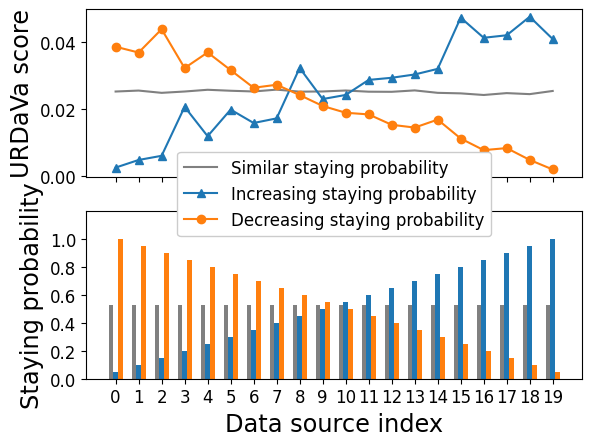

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import os

average_staying_probabilities = sum((1 - 0.05 * i) for i in range(20)) / 20
uniform_staying_probabilities = [average_staying_probabilities for i in range(20)]
decreasing_staying_probabilities = [(1 - 0.05 * i) for i in range(20)]
increasing_staying_probabilities = decreasing_staying_probabilities.copy()
increasing_staying_probabilities.reverse()

NUM_OF_DATA_SOURCES = 20
#average_uniform_values = {0: 0.15838587489835235, 1: 0.15974306206807776, 2: 0.1590676019451015, 3: 0.16003900176908561, 4: 0.15928609578193664, 5: 0.16152429096625176, 6: 0.1594379554197136, 7: 0.15880666210333141, 8: 0.15847723537193598, 9: 0.15850083238572185}
#average_increasing_values = {0: 0.10798706977321185, 1: 0.11979550798488475, 2: 0.1303260642939437, 3: 0.14214391589503989, 4: 0.1527623471553569, 5: 0.16689956132162506, 6: 0.17642261911895943, 7: 0.18760865834631235, 8: 0.19927407498884064, 9: 0.21194710648509485}
#average_decreasing_values = {0: 0.21161762172286355, 1: 0.20089423951701818, 2: 0.18780470637798788, 3: 0.17720612023010227, 4: 0.1646888567462022, 5: 0.15499993440110893, 6: 0.14162578455031644, 7: 0.1299610563362821, 8: 0.11882452546150152, 9: 0.10797338539280994}


fig, ax = plt.subplots(2, sharex=True)
line, = ax[0].plot(average_uniform_values_.values(), color="grey")
line.set_label("Similar staying probability")
increasing_line, = ax[0].plot(average_increasing_values_.values(), marker="^", color="C0")
increasing_line.set_label("Increasing staying probability")
decreasing_line, = ax[0].plot(average_decreasing_values_.values(), marker="o", color="C1")
decreasing_line.set_label("Decreasing staying probability") 
ax[0].legend(loc="lower center", fontsize="large", bbox_to_anchor=(0.5,-0.4), facecolor='white', framealpha=1)
# ax[0].set_title(rf"Line Graph of URDV Scores for Each Data Source [$n=${NUM_OF_DATA_SOURCES}]")
ax[0].set_xticks(ticks=list(range(NUM_OF_DATA_SOURCES)))
ax[0].set_ylabel("URDaVa score", fontsize='xx-large')
#ax[0].set_ylim(top=0.1, bottom=-0.01)
ax[1].set_xlabel("Data source index", fontsize='xx-large')
ax[1].set_ylabel("Staying probability", fontsize='xx-large')
width = 0.2
multiplier = 0
x = np.arange(NUM_OF_DATA_SOURCES)
all_probabilities = [uniform_staying_probabilities, increasing_staying_probabilities, decreasing_staying_probabilities]
for i in range(len(all_probabilities)):
    offset = width * multiplier
    ax[1].bar(x + offset - width, all_probabilities[i], width, color=["grey", "C0", "C1"][i])
    multiplier += 1
ax[1].set_ylim(top=1.2)
ax[1].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

ax[0].tick_params(axis='both', labelsize='large')
ax[1].tick_params(axis='both', labelsize='large')
ax[0].set_zorder(ax[1].get_zorder()+1)

plt.show()
PATH_TO_IMAGES = "./images/data_source_ranking/"
if not os.path.isdir(PATH_TO_IMAGES):
    os.makedirs(PATH_TO_IMAGES)
fig.savefig(os.path.join(PATH_TO_IMAGES, "staying_probability_10_synthetic_ridge_beta_4_16.png"), dpi=300, bbox_inches='tight')

## Effect on Duplicates

Although duplicated data may contribute less to model performance due to the existence of its "twins", it is contributing to model robustness. Therefore, its URDaVa score might be higher than its prior score. In this experiment, we assign different probability to our data source of interest and other data sources to investigate when its URDaVa score would be higher than prior score (i.e. contribution to model robustness is more than contribution to model performance).

### Synthetic Dataset

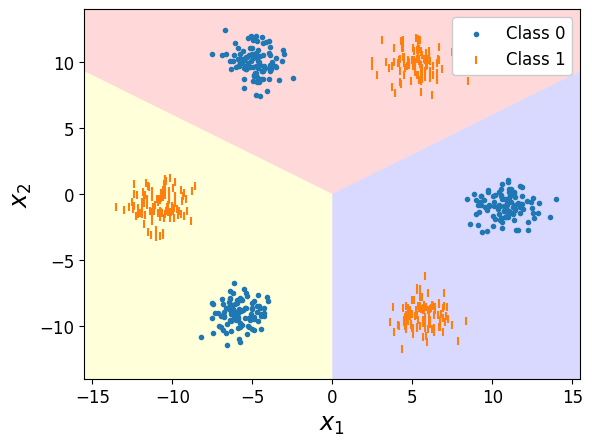

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
from sklearn.datasets import make_blobs

centers = [(-5, 10), (5, 10),
           (5 * 1.67 + 2.5, -5 + 2.5 * 1.67), (5 * 1.67 - 2.5, -5 - 2.5 * 1.67), 
           (-5 * 1.67 + 2.5, -5 - 2.5 * 1.67), (-5 * 1.67 - 2.5, -5 + 2.5 * 1.67)]
n_samples_per_cluster = 100

X_0 = X_1 = np.ndarray((0, 2), dtype='float')
y_0 = y_1 = np.array([])
for i in range(3):
    X_temp_0, y_temp_0 = make_blobs(n_samples=n_samples_per_cluster, centers=centers[2 * i: 2 * i + 1], shuffle=False)
    X_0 = np.concatenate((X_0, X_temp_0))
    y_0 = np.concatenate((y_0, np.full(n_samples_per_cluster, 0)))
    X_temp_1, y_temp_1 = make_blobs(n_samples=n_samples_per_cluster, centers=centers[2 * i + 1: 2 * i + 2], shuffle=False)
    X_1 = np.concatenate((X_1, X_temp_1))
    y_1 = np.concatenate((y_1, np.full(n_samples_per_cluster, 1)))
    if i == 0:
        X_red = np.concatenate((X_temp_0, X_temp_1))
        y_red = np.concatenate((np.full(n_samples_per_cluster, 0), np.full(n_samples_per_cluster, 1)))
    elif i == 1:
        X_yellow = np.concatenate((X_temp_0, X_temp_1))
        y_yellow = np.concatenate((np.full(n_samples_per_cluster, 0), np.full(n_samples_per_cluster, 1)))
    else:
        X_blue = np.concatenate((X_temp_0, X_temp_1))
        y_blue = np.concatenate((np.full(n_samples_per_cluster, 0), np.full(n_samples_per_cluster, 1)))

fig, ax = plt.subplots()

region_red = Polygon(np.array([[0, 0], [-25, 15], [25, 15]]), closed=True)
region_yellow = Polygon(np.array([[0, 0], [-25, 15], [0, -100]]), closed=True)
region_blue = Polygon(np.array([[0, 0], [25, 15], [0, -100]]), closed=True)
patches = [region_red, region_yellow, region_blue]
p = PatchCollection(patches, alpha=0.15)
p.set(facecolor=['red', 'yellow', 'blue'])
ax.add_collection(p)

ax.scatter(X_0[:, 0], X_0[:, 1], marker='.', label='Class 0')
ax.scatter(X_1[:, 0], X_1[:, 1], marker='|', label='Class 1')

ax.set_xlabel(r'$x_1$', fontsize='xx-large')
ax.set_ylabel(r'$x_2$', fontsize='xx-large')
ax.set_xlim(left=-15.5, right=15.5)
ax.set_ylim(bottom=-14, top=14)
ax.legend(facecolor='white', framealpha=1, fontsize='large', loc='upper right')
ax.tick_params(axis='both', labelsize='large')

plt.show()
PATH_TO_IMAGES = "./images/effect_on_duplicates/"
if not os.path.isdir(PATH_TO_IMAGES):
    os.makedirs(PATH_TO_IMAGES)
fig.savefig(os.path.join(PATH_TO_IMAGES, "synthetic_dataset_visualization.png"), dpi=300)

In [18]:
from sklearn.model_selection import train_test_split

X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red, y_red, test_size=0.3, shuffle=True)
X_red_train, X_redd_train, y_red_train, y_redd_train = train_test_split(X_red_train, y_red_train, test_size=0.5, shuffle=True)
X_yellow_train, X_yellow_test, y_yellow_train, y_yellow_test = train_test_split(X_yellow, y_yellow, test_size=0.3, shuffle=True)
X_blue_train, X_blue_test, y_blue_train, y_blue_test = train_test_split(X_blue, y_blue, test_size=0.3, shuffle=True)
X_test = np.concatenate((X_red_test, X_yellow_test, X_blue_test))
y_test = np.concatenate((y_red_test, y_yellow_test, y_blue_test))
RED = (X_red_train, y_red_train)
REDD = (X_redd_train, y_redd_train)
YELLOW = (X_yellow_train, y_yellow_train)
BLUE = (X_blue_train, y_blue_train)

In [19]:
from urdava.data_valuation import ValuableModel
from urdava.model_utility import IClassificationModel, model_knn

data_sources = {0: RED, 1: REDD, 2: YELLOW, 3: BLUE}
model_utility_function = IClassificationModel(model_knn, data_sources, X_test, y_test)

valuable_model = ValuableModel((0, 1, 2, 3), model_utility_function)

In [20]:
from urdava.coalition_probability import IndependentCoalitionProbability

x = [[] for i in range(6)]
y = [[] for i in range(6)]

for i in range(6): # 100%, 80%, 60%, 40%, 20%, 0%:
    x[i] = [1 - 0.05 * j for j in range(21)]
    for j in range(21): # 100%, 95%, ..., 5%, 0%
        coalition_probability = IndependentCoalitionProbability({0: 1 - 0.05 * j, 1: 1 - 0.2 * i, 
                                                                 2: 1 - 0.2 * i, 3: 1 - 0.2 * i})
        y[i].append(valuable_model.valuate(data_valuation_function='robust banzhaf', 
                                           coalition_probability=coalition_probability)[0])

In [21]:
banzhaf_score = valuable_model.valuate(data_valuation_function='banzhaf')[0]

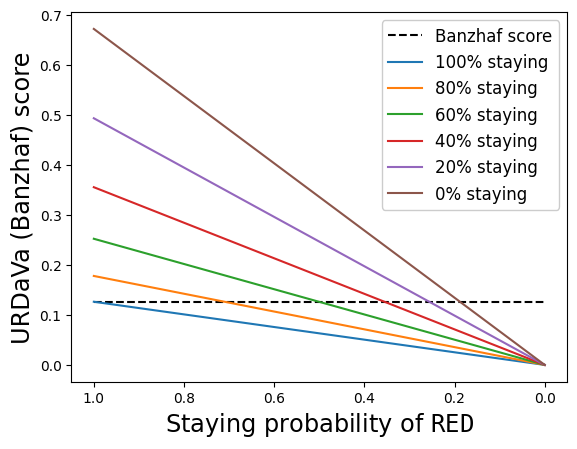

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x[0], [banzhaf_score] * 21, linestyle='dashed', color='black', label='Banzhaf score')
for i in range(6):
    ax.plot(x[i], y[i], color='C' + str(i), label=f'{round((1 - 0.2 * i)*100)}% staying')
    
ax.set_xlabel(r'Staying probability of $\mathtt{RED}$', fontsize='xx-large')
ax.set_ylabel('URDaVa (Banzhaf) score', fontsize='xx-large')
ax.legend(facecolor='white', framealpha=1, fontsize='large', loc='upper right')
plt.gca().invert_xaxis()
PATH_TO_IMAGES = "./images/effect_on_duplicates/"
if not os.path.isdir(PATH_TO_IMAGES):
    os.makedirs(PATH_TO_IMAGES)
fig.savefig(os.path.join(PATH_TO_IMAGES, "synthetic_dataset_result.png"), dpi=300)

### Actual Dataset

In [24]:
from sklearn.model_selection import train_test_split
from urdava.dataset import load_dataset
from urdava.data_source import generate_random_data_sources

X, y = load_dataset('phoneme')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
data_sources = generate_random_data_sources(X_train, y_train)

In [25]:
data_sources[10] = (data_sources[0][0].copy(), data_sources[0][1].copy()) # 10 is a duplicate of 0

In [26]:
from urdava.data_valuation import ValuableModel
from urdava.model_utility import IClassificationModel, model_logistic_regression

model_utility_function = IClassificationModel(model_logistic_regression, data_sources, X_test, y_test)

valuable_model = ValuableModel(tuple([i for i in range(11)]), model_utility_function)

In [ ]:
from urdava.coalition_probability import IndependentCoalitionProbability

x = [[] for i in range(6)]
y = [[] for i in range(6)]

for i in range(6): # 100%, 80%, 60%, 40%, 20%, 0%:
    x[i] = [1 - 0.1 * j for j in range(11)]
    for j in range(11): # 100%, 90%, ..., 10%, 0%
        probabilities = {d:1-0.2*i for d in range(1, 11)}
        probabilities[0] = 1 - 0.1 * j
        coalition_probability = IndependentCoalitionProbability(probabilities)
        y[i].append(valuable_model.valuate(data_valuation_function='robust shapley', 
                                           coalition_probability=coalition_probability)[0])
        print(1)

In [28]:
shapley_score = valuable_model.valuate(data_valuation_function='shapley')[0]

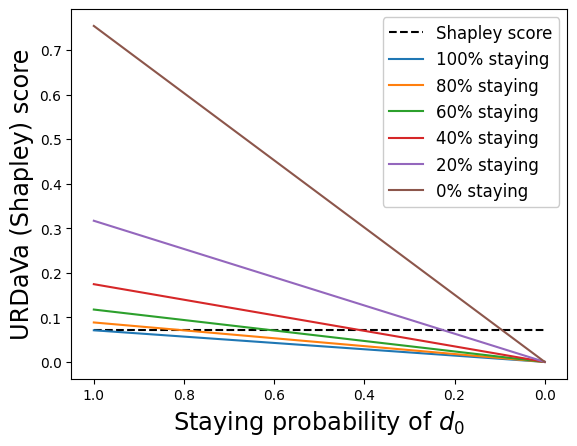

In [29]:
import matplotlib.pyplot as plt
import os

fig, ax = plt.subplots()
ax.plot(x[0], [shapley_score] * 11, linestyle='dashed', color='black', label='Shapley score')
for i in range(6):
    ax.plot(x[i], y[i], color='C' + str(i), label=f'{round((1 - 0.2 * i)*100)}% staying')
    
ax.set_xlabel(r'Staying probability of $d_0$', fontsize='xx-large')
ax.set_ylabel('URDaVa (Shapley) score', fontsize='xx-large')
ax.legend(facecolor='white', framealpha=1, fontsize='large', loc='upper right')
plt.gca().invert_xaxis()
PATH_TO_IMAGES = "./images/effect_on_duplicates/"
if not os.path.isdir(PATH_TO_IMAGES):
    os.makedirs(PATH_TO_IMAGES)
fig.savefig(os.path.join(PATH_TO_IMAGES, "actual_dataset_result.png"), dpi=300)

## Reflection of Long-Term Distribution

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from statistics import mean, stdev
from urdava.coalition_probability import IndependentCoalitionProbability
from urdava.data_source import generate_random_data_sources, add_classification_noise
from urdava.data_valuation import ValuableModel
from urdava.dataset import load_dataset
from urdava.model_utility import IClassificationModel, model_logistic_regression

X, y = load_dataset('phoneme')

NUM_OF_DATA_SOURCES = 10
support_set = tuple(range(NUM_OF_DATA_SOURCES))
staying_probabilities = {i:(1 - 0.05 * i) for i in range(NUM_OF_DATA_SOURCES)}
coalition_probability = IndependentCoalitionProbability(staying_probabilities)
model = model_logistic_regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
data_sources = generate_random_data_sources(X_train, y_train, 
                                                num_of_data_sources=NUM_OF_DATA_SOURCES)

N = 100
data_source_values = {}
for i in data_sources:
    data_source_values[i] = []
    
model_utility_function = IClassificationModel(model, data_sources, X_test, y_test)
valuable_model = ValuableModel(support_set, model_utility_function)

for n_iter in range(N):
    print(f"Iteration #{n_iter}")
    
    grand_coalition = coalition_probability.simulate()
    values = valuable_model.valuate(data_valuation_function="partial shapley", partial_support=grand_coalition)
    for i in values:
        data_source_values[i].append(values[i])
        
X = np.arange(NUM_OF_DATA_SOURCES)
means = []
stdevs = []
for i in data_source_values:
    means.append(mean(data_source_values[i]))
    stdevs.append(stdev(data_source_values[i]))
    
means = np.array(means)
stdevs = np.array(stdevs)

Iteration #0
Iteration #1
Iteration #2
Iteration #3
Iteration #4
Iteration #5
Iteration #6
Iteration #7
Iteration #8
Iteration #9
Iteration #10
Iteration #11
Iteration #12
Iteration #13
Iteration #14
Iteration #15
Iteration #16
Iteration #17
Iteration #18
Iteration #19
Iteration #20
Iteration #21
Iteration #22
Iteration #23
Iteration #24
Iteration #25
Iteration #26
Iteration #27
Iteration #28
Iteration #29
Iteration #30
Iteration #31
Iteration #32
Iteration #33
Iteration #34
Iteration #35
Iteration #36
Iteration #37
Iteration #38
Iteration #39
Iteration #40
Iteration #41
Iteration #42
Iteration #43
Iteration #44
Iteration #45
Iteration #46
Iteration #47
Iteration #48
Iteration #49
Iteration #50
Iteration #51
Iteration #52
Iteration #53
Iteration #54
Iteration #55
Iteration #56
Iteration #57
Iteration #58
Iteration #59
Iteration #60
Iteration #61
Iteration #62
Iteration #63
Iteration #64
Iteration #65
Iteration #66
Iteration #67
Iteration #68
Iteration #69
Iteration #70
Iteration #71
It

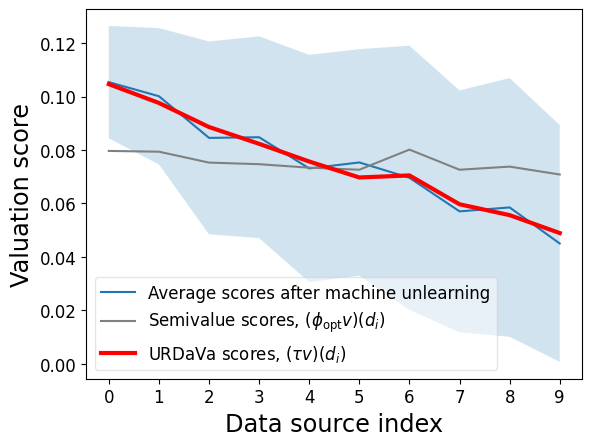

In [94]:
import os

fig, ax = plt.subplots()

average_line, = ax.plot(support_set, means, color="C0")
average_line.set_label("Average scores after machine unlearning")
ax.fill_between(X, means-stdevs, means+stdevs, facecolor="C0", alpha=0.2)

shapley_values = valuable_model.valuate(data_valuation_function="shapley")
shapley_line, = ax.plot(support_set, shapley_values.values(), color="grey")
shapley_line.set_label(r"Semivalue scores, $(\phi_{\mathrm{opt}}v)(d_i)$")

urdv_values = valuable_model.valuate(data_valuation_function="robust shapley", coalition_probability=coalition_probability)
urdv_line, = ax.plot(support_set, urdv_values.values(), color="red", linewidth=3)
urdv_line.set_label(r"URDaVa scores, $(\tau v)(d_i)$")

# ax.set_title(r"Graph of Various Valuation Scores against Data Sources")
ax.set_xticks(ticks=list(range(NUM_OF_DATA_SOURCES)))
ax.set_ylabel("Valuation score", fontsize='xx-large')
ax.set_xlabel("Data source index", fontsize='xx-large')
ax.legend(fontsize="large", facecolor='white', framealpha=0.5, loc='lower left')
ax.tick_params(axis='both', labelsize='large')


plt.show()

PATH_TO_IMAGES = "./images/machine_unlearning_simulation/"
if not os.path.isdir(PATH_TO_IMAGES):
    os.makedirs(PATH_TO_IMAGES)
fig.savefig(os.path.join(PATH_TO_IMAGES, "mus_10_phoneme_logistic_shapley.png"), dpi=300, bbox_inches='tight')

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from statistics import mean, stdev
from urdava.coalition_probability import IndependentCoalitionProbability
from urdava.data_source import generate_random_data_sources, add_classification_noise
from urdava.data_valuation import ValuableModel
from urdava.dataset import load_dataset
from urdava.model_utility import IClassificationModel, model_logistic_regression, model_linear_svm

X, y = load_dataset('credit card')

NUM_OF_DATA_SOURCES = 10
support_set = tuple(range(NUM_OF_DATA_SOURCES))
staying_probabilities = {i:(1 - 0.05 * i) for i in range(NUM_OF_DATA_SOURCES)}
coalition_probability = IndependentCoalitionProbability(staying_probabilities)
model = model_linear_svm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
data_sources = generate_random_data_sources(X_train, y_train, 
                                                num_of_data_sources=NUM_OF_DATA_SOURCES)

N = 100
data_source_values = {}
for i in data_sources:
    data_source_values[i] = []
    
model_utility_function = IClassificationModel(model, data_sources, X_test, y_test)
valuable_model = ValuableModel(support_set, model_utility_function)

for n_iter in range(N):
    print(f"Iteration #{n_iter}")
    
    grand_coalition = coalition_probability.simulate()
    values = valuable_model.valuate(data_valuation_function="partial banzhaf", partial_support=grand_coalition)
    for i in values:
        data_source_values[i].append(values[i])
        
X = np.arange(NUM_OF_DATA_SOURCES)
means = []
stdevs = []
for i in data_source_values:
    means.append(mean(data_source_values[i]))
    stdevs.append(stdev(data_source_values[i]))
    
means = np.array(means)
stdevs = np.array(stdevs)

Iteration #0
Iteration #1
Iteration #2
Iteration #3
Iteration #4
Iteration #5
Iteration #6
Iteration #7
Iteration #8
Iteration #9
Iteration #10
Iteration #11
Iteration #12
Iteration #13
Iteration #14
Iteration #15
Iteration #16
Iteration #17
Iteration #18
Iteration #19
Iteration #20
Iteration #21
Iteration #22
Iteration #23
Iteration #24
Iteration #25
Iteration #26
Iteration #27
Iteration #28
Iteration #29
Iteration #30
Iteration #31
Iteration #32
Iteration #33
Iteration #34
Iteration #35
Iteration #36
Iteration #37
Iteration #38
Iteration #39
Iteration #40
Iteration #41
Iteration #42
Iteration #43
Iteration #44
Iteration #45
Iteration #46
Iteration #47
Iteration #48
Iteration #49
Iteration #50
Iteration #51
Iteration #52
Iteration #53
Iteration #54
Iteration #55
Iteration #56
Iteration #57
Iteration #58
Iteration #59
Iteration #60
Iteration #61
Iteration #62
Iteration #63
Iteration #64
Iteration #65
Iteration #66
Iteration #67
Iteration #68
Iteration #69
Iteration #70
Iteration #71
It

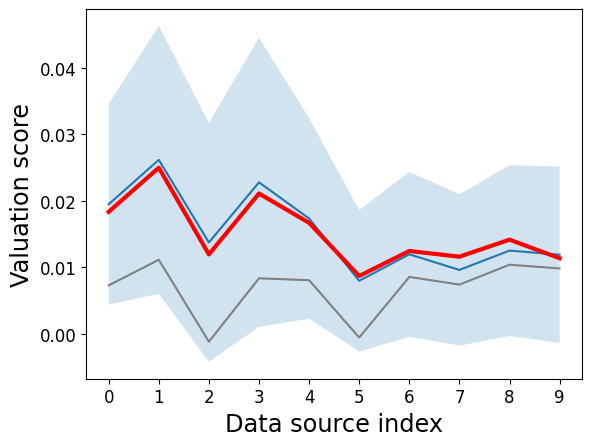

In [75]:
import os

fig, ax = plt.subplots()

average_line, = ax.plot(support_set, means, color="C0")
average_line.set_label("Average scores after machine unlearning")
ax.fill_between(X, means-stdevs, means+stdevs, facecolor="C0", alpha=0.2)

shapley_values = valuable_model.valuate(data_valuation_function="banzhaf")
shapley_line, = ax.plot(support_set, shapley_values.values(), color="grey")
shapley_line.set_label(r"Semivalue scores, $(\phi_{\mathrm{opt}}v)(d_i)$")

urdv_values = valuable_model.valuate(data_valuation_function="robust banzhaf", coalition_probability=coalition_probability)
urdv_line, = ax.plot(support_set, urdv_values.values(), color="red", linewidth=3)
urdv_line.set_label(r"URDaVa scores, $(\tau v)(d_i)$")

# ax.set_title(r"Graph of Various Valuation Scores against Data Sources")
ax.set_xticks(ticks=list(range(NUM_OF_DATA_SOURCES)))
ax.set_ylabel("Valuation score", fontsize='xx-large')
ax.set_xlabel("Data source index", fontsize='xx-large')
# ax.legend(fontsize="large", facecolor='white', framealpha=1, loc='upper right')
ax.tick_params(axis='both', labelsize='large')


plt.show()

PATH_TO_IMAGES = "./images/machine_unlearning_simulation/"
if not os.path.isdir(PATH_TO_IMAGES):
    os.makedirs(PATH_TO_IMAGES)
fig.savefig(os.path.join(PATH_TO_IMAGES, "mus_10_creditcard_svm_banzhaf.png"), dpi=300, bbox_inches='tight')

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from statistics import mean, stdev
from urdava.coalition_probability import RandomCoalitionProbability
from urdava.data_source import generate_random_data_sources, add_classification_noise
from urdava.data_valuation import ValuableModel
from urdava.dataset import load_dataset
from urdava.model_utility import IClassificationModel, model_gaussian_nb

X, y = load_dataset('diabetes')

NUM_OF_DATA_SOURCES = 10
support_set = tuple(range(NUM_OF_DATA_SOURCES))
coalition_probability = RandomCoalitionProbability(support_set)
model = model_gaussian_nb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
data_sources = generate_random_data_sources(X_train, y_train, 
                                                num_of_data_sources=NUM_OF_DATA_SOURCES)

N = 200
data_source_values = {}
for i in data_sources:
    data_source_values[i] = []
    
model_utility_function = IClassificationModel(model, data_sources, X_test, y_test)
valuable_model = ValuableModel(support_set, model_utility_function)

for n_iter in range(N):
    print(f"Iteration #{n_iter}")
    
    grand_coalition = coalition_probability.simulate()
    values = valuable_model.valuate(data_valuation_function="partial beta", partial_support=grand_coalition, alpha=16, beta=4)
    for i in values:
        data_source_values[i].append(values[i])
        
X = np.arange(NUM_OF_DATA_SOURCES)
means = []
stdevs = []
for i in data_source_values:
    means.append(mean(data_source_values[i]))
    stdevs.append(stdev(data_source_values[i]))
    
means = np.array(means)
stdevs = np.array(stdevs)

Iteration #0
Iteration #1
Iteration #2
Iteration #3
Iteration #4
Iteration #5
Iteration #6
Iteration #7
Iteration #8
Iteration #9
Iteration #10
Iteration #11
Iteration #12
Iteration #13
Iteration #14
Iteration #15
Iteration #16
Iteration #17
Iteration #18
Iteration #19
Iteration #20
Iteration #21
Iteration #22
Iteration #23
Iteration #24
Iteration #25
Iteration #26
Iteration #27
Iteration #28
Iteration #29
Iteration #30
Iteration #31
Iteration #32
Iteration #33
Iteration #34
Iteration #35
Iteration #36
Iteration #37
Iteration #38
Iteration #39
Iteration #40
Iteration #41
Iteration #42
Iteration #43
Iteration #44
Iteration #45
Iteration #46
Iteration #47
Iteration #48
Iteration #49
Iteration #50
Iteration #51
Iteration #52
Iteration #53
Iteration #54
Iteration #55
Iteration #56
Iteration #57
Iteration #58
Iteration #59
Iteration #60
Iteration #61
Iteration #62
Iteration #63
Iteration #64
Iteration #65
Iteration #66
Iteration #67
Iteration #68
Iteration #69
Iteration #70
Iteration #71
It

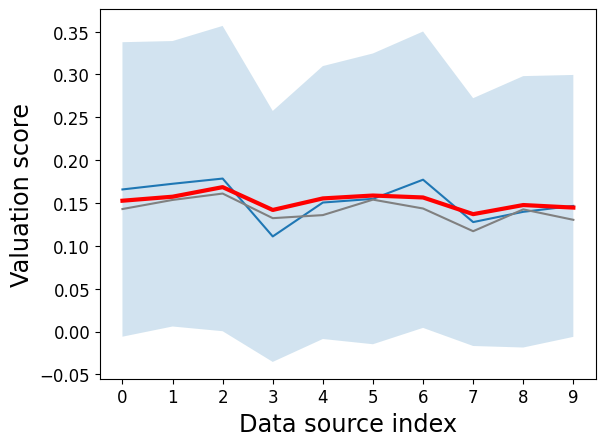

In [72]:
import os

fig, ax = plt.subplots()

average_line, = ax.plot(support_set, means, color="C0")
average_line.set_label("Average scores after machine unlearning")
ax.fill_between(X, means-stdevs, means+stdevs, facecolor="C0", alpha=0.2)

shapley_values = valuable_model.valuate(data_valuation_function="beta", alpha=16, beta=4)
shapley_line, = ax.plot(support_set, shapley_values.values(), color="grey")
shapley_line.set_label(r"Semivalue scores, $(\phi_{\mathrm{opt}}v)(d_i)$")

urdv_values = valuable_model.valuate(data_valuation_function="robust beta", coalition_probability=coalition_probability, alpha=16, beta=4)
urdv_line, = ax.plot(support_set, urdv_values.values(), color="red", linewidth=3)
urdv_line.set_label(r"URDaVa scores, $(\tau v)(d_i)$")

# ax.set_title(r"Graph of Various Valuation Scores against Data Sources")
ax.set_xticks(ticks=list(range(NUM_OF_DATA_SOURCES)))
ax.set_ylabel("Valuation score", fontsize='xx-large')
ax.set_xlabel("Data source index", fontsize='xx-large')
# ax.legend(fontsize="large", facecolor='white', framealpha=1, loc='upper right')
ax.tick_params(axis='both', labelsize='large')


plt.show()

PATH_TO_IMAGES = "./images/machine_unlearning_simulation/"
if not os.path.isdir(PATH_TO_IMAGES):
    os.makedirs(PATH_TO_IMAGES)
fig.savefig(os.path.join(PATH_TO_IMAGES, "mus_10_diabetes_nb_beta_16_4.png"), dpi=300, bbox_inches='tight')

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from statistics import mean, stdev
from urdava.coalition_probability import RandomCoalitionProbability
from urdava.data_source import generate_random_data_sources, add_classification_noise
from urdava.data_valuation import ValuableModel
from urdava.dataset import load_dataset
from urdava.model_utility import IClassificationModel, model_gaussian_nb

X, y = load_dataset('wind')

NUM_OF_DATA_SOURCES = 10
support_set = tuple(range(NUM_OF_DATA_SOURCES))
coalition_probability = RandomCoalitionProbability(support_set)
model = model_gaussian_nb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
data_sources = generate_random_data_sources(X_train, y_train, 
                                                num_of_data_sources=NUM_OF_DATA_SOURCES)

N = 100
data_source_values = {}
for i in data_sources:
    data_source_values[i] = []
    
model_utility_function = IClassificationModel(model, data_sources, X_test, y_test)
valuable_model = ValuableModel(support_set, model_utility_function)

for n_iter in range(N):
    print(f"Iteration #{n_iter}")
    
    grand_coalition = coalition_probability.simulate()
    values = valuable_model.valuate(data_valuation_function="partial beta", partial_support=grand_coalition, alpha=16, beta=1)
    for i in values:
        data_source_values[i].append(values[i])
        
X = np.arange(NUM_OF_DATA_SOURCES)
means = []
stdevs = []
for i in data_source_values:
    means.append(mean(data_source_values[i]))
    stdevs.append(stdev(data_source_values[i]))
    
means = np.array(means)
stdevs = np.array(stdevs)

Iteration #0
Iteration #1
Iteration #2
Iteration #3
Iteration #4
Iteration #5
Iteration #6
Iteration #7
Iteration #8
Iteration #9
Iteration #10
Iteration #11
Iteration #12
Iteration #13
Iteration #14
Iteration #15
Iteration #16
Iteration #17
Iteration #18
Iteration #19
Iteration #20
Iteration #21
Iteration #22
Iteration #23
Iteration #24
Iteration #25
Iteration #26
Iteration #27
Iteration #28
Iteration #29
Iteration #30
Iteration #31
Iteration #32
Iteration #33
Iteration #34
Iteration #35
Iteration #36
Iteration #37
Iteration #38
Iteration #39
Iteration #40
Iteration #41
Iteration #42
Iteration #43
Iteration #44
Iteration #45
Iteration #46
Iteration #47
Iteration #48
Iteration #49
Iteration #50
Iteration #51
Iteration #52
Iteration #53
Iteration #54
Iteration #55
Iteration #56
Iteration #57
Iteration #58
Iteration #59
Iteration #60
Iteration #61
Iteration #62
Iteration #63
Iteration #64
Iteration #65
Iteration #66
Iteration #67
Iteration #68
Iteration #69
Iteration #70
Iteration #71
It

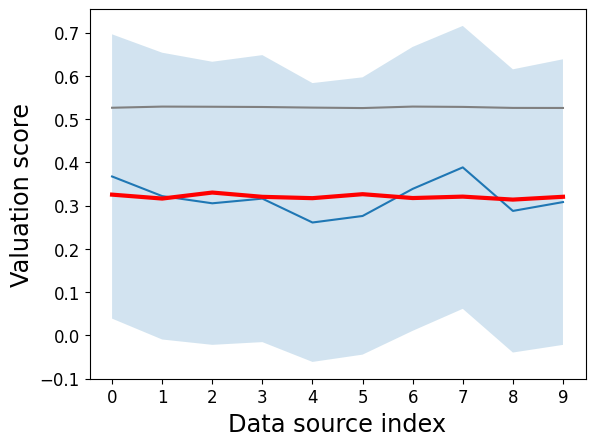

In [41]:
import os

fig, ax = plt.subplots()

average_line, = ax.plot(support_set, means, color="C0")
average_line.set_label("Average scores after machine unlearning")
ax.fill_between(X, means-stdevs, means+stdevs, facecolor="C0", alpha=0.2)

shapley_values = valuable_model.valuate(data_valuation_function="beta", alpha=16, beta=1)
shapley_line, = ax.plot(support_set, shapley_values.values(), color="grey")
shapley_line.set_label(r"Semivalue scores, $(\phi_{\mathrm{opt}}v)(d_i)$")

urdv_values = valuable_model.valuate(data_valuation_function="robust beta", coalition_probability=coalition_probability, alpha=16, beta=1)
urdv_line, = ax.plot(support_set, urdv_values.values(), color="red", linewidth=3)
urdv_line.set_label(r"URDaVa scores, $(\tau v)(d_i)$")

# ax.set_title(r"Graph of Various Valuation Scores against Data Sources")
ax.set_xticks(ticks=list(range(NUM_OF_DATA_SOURCES)))
ax.set_ylabel("Valuation score", fontsize='xx-large')
ax.set_xlabel("Data source index", fontsize='xx-large')
# ax.legend(fontsize="large", facecolor='white', framealpha=0.5, loc='lower right')
ax.tick_params(axis='both', labelsize='large')


plt.show()

PATH_TO_IMAGES = "./images/machine_unlearning_simulation/"
if not os.path.isdir(PATH_TO_IMAGES):
    os.makedirs(PATH_TO_IMAGES)
fig.savefig(os.path.join(PATH_TO_IMAGES, "mus_10_diabetes_nb_beta_4_16.png"), dpi=300, bbox_inches='tight')

## Risk-URDaVa

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from statistics import mean, stdev
from urdava.coalition_probability import IndependentCoalitionProbability
from urdava.data_source import generate_random_data_sources, add_classification_noise
from urdava.data_valuation import ValuableModel
from urdava.dataset import load_dataset
from urdava.model_utility import IClassificationModel, model_logistic_regression

X, y = load_dataset('phoneme')

NUM_OF_DATA_SOURCES = 10
support_set = tuple(range(NUM_OF_DATA_SOURCES))
staying_probabilities = {i:(1 - 0.05 * i) for i in range(NUM_OF_DATA_SOURCES)}
coalition_probability = IndependentCoalitionProbability(staying_probabilities)
model = model_logistic_regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
data_sources = generate_random_data_sources(X_train, y_train, 
                                                num_of_data_sources=NUM_OF_DATA_SOURCES)
    
model_utility_function = IClassificationModel(model, data_sources, X_test, y_test)
valuable_model = ValuableModel(support_set, model_utility_function)

# Shapley values and URDV values
shapley_values = valuable_model.valuate(data_valuation_function="shapley")
urdava_values = valuable_model.valuate(data_valuation_function="robust shapley", coalition_probability=coalition_probability)

# risk averse
risk_averse_urdava_values_100 = valuable_model.valuate(data_valuation_function="risk averse robust shapley", coalition_probability=coalition_probability, lower_tail=1.0)
risk_averse_urdava_values_67 = valuable_model.valuate(data_valuation_function="risk averse robust shapley", coalition_probability=coalition_probability, lower_tail=0.67)
risk_averse_urdava_values_33 = valuable_model.valuate(data_valuation_function="risk averse robust shapley", coalition_probability=coalition_probability, lower_tail=0.33)

# risk seeking
risk_seeking_urdava_values_100 = valuable_model.valuate(data_valuation_function="risk seeking robust shapley", coalition_probability=coalition_probability, upper_tail=1.0)
risk_seeking_urdava_values_67 = valuable_model.valuate(data_valuation_function="risk seeking robust shapley", coalition_probability=coalition_probability, upper_tail=0.67)
risk_seeking_urdava_values_33 = valuable_model.valuate(data_valuation_function="risk seeking robust shapley", coalition_probability=coalition_probability, upper_tail=0.33)





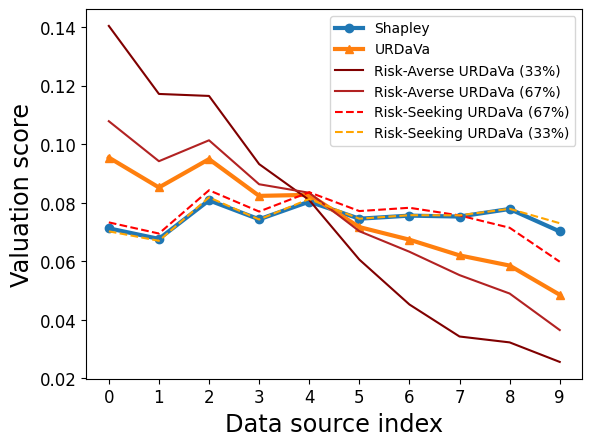

In [30]:
import os

fig, ax = plt.subplots()
X = np.arange(NUM_OF_DATA_SOURCES)

shapley_line, = ax.plot(X, shapley_values.values(), color="C0", linewidth=3, marker='o')
shapley_line.set_label(r"Shapley")

urdv_line, = ax.plot(X, urdava_values.values(), color="C1", linewidth=3, marker='^')
urdv_line.set_label(r"URDaVa")

risk_averse_33_line, = ax.plot(X, risk_averse_urdava_values_33.values(), color="maroon")
risk_averse_33_line.set_label(r"Risk-Averse URDaVa (33%)")

risk_averse_67_line, = ax.plot(X, risk_averse_urdava_values_67.values(), color="firebrick")
risk_averse_67_line.set_label(r"Risk-Averse URDaVa (67%)")

risk_seeking_67_line, = ax.plot(X, risk_seeking_urdava_values_67.values(), color="red", linestyle='--')
risk_seeking_67_line.set_label(r"Risk-Seeking URDaVa (67%)")

risk_seeking_33_line, = ax.plot(X, risk_seeking_urdava_values_33.values(), color="orange", linestyle='--')
risk_seeking_33_line.set_label(r"Risk-Seeking URDaVa (33%)")

ax.set_xticks(ticks=list(range(NUM_OF_DATA_SOURCES)))
ax.set_ylabel("Valuation score", fontsize='xx-large')
ax.set_xlabel("Data source index", fontsize='xx-large')
ax.legend(loc="upper right", fontsize="medium")
ax.tick_params(axis='both', labelsize='large')

plt.show()
PATH_TO_IMAGES = "./images/risk_urdava/"
if not os.path.isdir(PATH_TO_IMAGES):
    os.makedirs(PATH_TO_IMAGES)
fig.savefig(os.path.join(PATH_TO_IMAGES, "ru_10_phoneme_logistic_shapley"), dpi=300, bbox_inches='tight')

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from statistics import mean, stdev
from urdava.coalition_probability import IndependentCoalitionProbability
from urdava.data_source import generate_random_data_sources, add_classification_noise
from urdava.data_valuation import ValuableModel
from urdava.dataset import load_dataset
from urdava.model_utility import IClassificationModel, model_gaussian_nb

X, y = load_dataset('diabetes')

NUM_OF_DATA_SOURCES = 10
support_set = tuple(range(NUM_OF_DATA_SOURCES))
staying_probabilities = {i:(1 - 0.05 * i) for i in range(NUM_OF_DATA_SOURCES)}
coalition_probability = IndependentCoalitionProbability(staying_probabilities)
model = model_gaussian_nb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
data_sources = generate_random_data_sources(X_train, y_train, 
                                                num_of_data_sources=NUM_OF_DATA_SOURCES)
    
model_utility_function = IClassificationModel(model, data_sources, X_test, y_test)
valuable_model = ValuableModel(support_set, model_utility_function)

# Beta values and URDV values
beta_values = valuable_model.valuate(data_valuation_function="beta", alpha=16, beta=4)
urdava_values = valuable_model.valuate(data_valuation_function="robust beta", alpha=16, beta=4, coalition_probability=coalition_probability)

# risk averse
risk_averse_urdava_values_100 = valuable_model.valuate(data_valuation_function="risk averse robust beta", alpha=16, beta=4, coalition_probability=coalition_probability, lower_tail=1.0)
risk_averse_urdava_values_67 = valuable_model.valuate(data_valuation_function="risk averse robust beta", alpha=16, beta=4, coalition_probability=coalition_probability, lower_tail=0.67)
risk_averse_urdava_values_33 = valuable_model.valuate(data_valuation_function="risk averse robust beta", alpha=16, beta=4, coalition_probability=coalition_probability, lower_tail=0.33)

# risk seeking
risk_seeking_urdava_values_100 = valuable_model.valuate(data_valuation_function="risk seeking robust beta", alpha=16, beta=4, coalition_probability=coalition_probability, upper_tail=1.0)
risk_seeking_urdava_values_67 = valuable_model.valuate(data_valuation_function="risk seeking robust beta", alpha=16, beta=4, coalition_probability=coalition_probability, upper_tail=0.67)
risk_seeking_urdava_values_33 = valuable_model.valuate(data_valuation_function="risk seeking robust beta", alpha=16, beta=4, coalition_probability=coalition_probability, upper_tail=0.33)





In [2]:
beta_values

{0: 0.12848221857820988,
 1: 0.16031397257822907,
 2: 0.11978204951666284,
 3: 0.1564862592078846,
 4: 0.13680740741158612,
 5: 0.13680869520508157,
 6: 0.1422321150836109,
 7: 0.13116601950029447,
 8: 0.14111675387790568,
 9: 0.12463578749293047}

In [3]:
urdava_values

{0: 0.19193334272572335,
 1: 0.21378873958103475,
 2: 0.16028491461709812,
 3: 0.18434752800933496,
 4: 0.15404581656088154,
 5: 0.14448550230349572,
 6: 0.13641392736427865,
 7: 0.119054642043837,
 8: 0.11486912358692974,
 9: 0.09402606885131685}

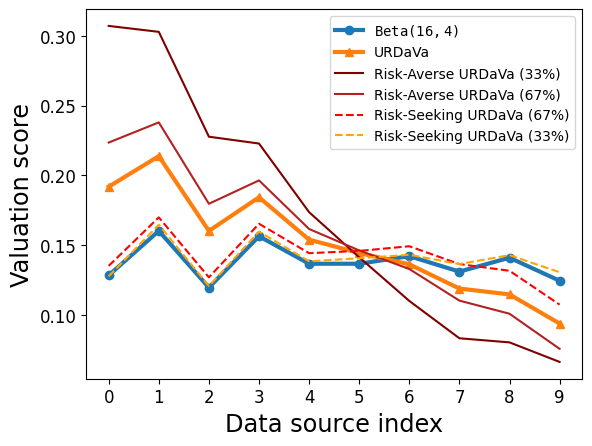

In [4]:
import os

fig, ax = plt.subplots()
X = np.arange(NUM_OF_DATA_SOURCES)

beta_line, = ax.plot(X, beta_values.values(), color="C0", linewidth=3, marker='o')
beta_line.set_label(r"$\mathtt{Beta(16, 4)}$")

urdv_line, = ax.plot(X, urdava_values.values(), color="C1", linewidth=3, marker='^')
urdv_line.set_label(r"URDaVa")

risk_averse_33_line, = ax.plot(X, risk_averse_urdava_values_33.values(), color="maroon")
risk_averse_33_line.set_label(r"Risk-Averse URDaVa (33%)")

risk_averse_67_line, = ax.plot(X, risk_averse_urdava_values_67.values(), color="firebrick")
risk_averse_67_line.set_label(r"Risk-Averse URDaVa (67%)")

risk_seeking_67_line, = ax.plot(X, risk_seeking_urdava_values_67.values(), color="red", linestyle='--')
risk_seeking_67_line.set_label(r"Risk-Seeking URDaVa (67%)")

risk_seeking_33_line, = ax.plot(X, risk_seeking_urdava_values_33.values(), color="orange", linestyle='--')
risk_seeking_33_line.set_label(r"Risk-Seeking URDaVa (33%)")

ax.set_xticks(ticks=list(range(NUM_OF_DATA_SOURCES)))
ax.set_ylabel("Valuation score", fontsize='xx-large')
ax.set_xlabel("Data source index", fontsize='xx-large')
ax.legend(loc="upper right", fontsize="medium")
ax.tick_params(axis='both', labelsize='large')

plt.show()
PATH_TO_IMAGES = "./images/risk_urdava/"
if not os.path.isdir(PATH_TO_IMAGES):
    os.makedirs(PATH_TO_IMAGES)
fig.savefig(os.path.join(PATH_TO_IMAGES, "ru_10_diabetes_nb_beta_16_4"), dpi=300, bbox_inches='tight')